# NYC Taxi Data Analytics Pipeline With Lake House Architecture

## Final Project 

**Author**: Thanh Phong Le  
**Course**: CSCI E-192: Modern Data Analytics  
**Institution**: Harvard Extension School  
**Term**: Spring 2025

# PART I: Project Goal and Problem Statement

Explain the problem you are going to solve or the use case you will be implementing in your project

## Executive Summary

### Problem Statement and Value Proposition

This project investigates how academic knowledge is organized and interconnected on the web by identifying topic-based communities within Stanford University's web presence. Academic institutions struggle to understand the organic organization of their digital knowledge assets. By applying and comparing multiple advanced link analysis algorithms (*HITS* variants) and *community detection* methods, this project provides actionable insights that help universities optimize their digital information architecture, identify influential content hubs, and understand how different academic disciplines interconnect. The project addresses the question: **How do academic web pages naturally organize into topic communities**, and **what relationship exists between a page's network position and its community membership?**

### Research Objectives

1. Identify and characterize authoritative sources within the Stanford web graph using multiple *HITS* algorithm variations
2. Discover *natural community structures* within the web graph using *complementary* detection methods
3. Analyze the relationship between *link authority* and *community membership*
4. Determine which algorithms are *most effective* for revealing meaningful *academic topic communities*

### Summary of Key Results

The analysis of the Stanford web graph reveals that authority in academic networks is *extremely concentrated*, with the [top authority nodes having scores up to *8,479 times* higher than the mean](#)¹. Hub functionality is [*more democratically distributed*, with maximum hub scores only about *7 times* higher than the mean](#)¹. The web graph [organizes into *well-defined communities* with high modularity scores (*0.87-0.88*)](#)³, confirming that academic content *naturally clusters by topic*. These communities follow a *power-law size distribution*, with many small specialized communities and a few very large ones.

Different *link analysis* algorithms provide *complementary* insights, with *standard HITS* revealing extreme authority concentration, *Weighted HITS* providing a more balanced view, and *SALSA* identifying specialized functional nodes. Similarly, *community detection* algorithms reveal different aspects of topic organization, with *Louvain* and *Leiden* methods achieving the highest modularity scores.

### Implications and Applications

These findings have several practical applications for academic institutions. Understanding how digital knowledge *naturally* org¹izes allows universities to restructure their websites to better reflect *natural topic communities*. Navigation systems can be enhanced based on identified *bridge* pages, and *content recommendations* can be improved using *community membership*. The analysis also reveals interdisciplinary opportunities through *community overlap analysis* and identifies gap areas with low authority or poor community integration. Additionally, the methodological insights about algorithm performance and the *multi-algorithm* approach provide valuable guidance for future studies of academic networks.

¹ *See Part [I](#), Section [1.1.3. Algorithm Performance Statistics](#01)*

³ *See Part [II](#), Section [2.2. Community Algorithm Performance Comparison](#02)*


## 1. Final Project Proposal

### 1.1. Project Goal and Problem Statement
##### NYC Taxi Data Analytics Pipeline

This project aims to build a scalable, proof-of-concept data pipeline for analyzing NYC Taxi trip data, combining data from two companies (Green and Yellow Taxi). The solution will integrate data from diverse sources, process it efficiently, and deliver actionable insights through a modern data architecture. Key challenges include handling high data volumes (represented by a smaller sample for the proof-of-concept), ensuring data consistency between heterogeneous systems, and enabling near real-time analytics for business decision-making. The project will leverage free tiers, open-source technologies, and limited trial periods to minimize costs during this 3-week proof-of-concept phase.
Data Source
The data sources for this project include:

Primary Trip Data (Sample Set):
- NYC Taxi Trip Jan 2025 Records (Green and Yellow taxi) in Parquet format
- Size for proof-of-concept: 1 week of data (~250,000 records)
- Schema: 20+ fields including pickup/dropoff locations, timestamps, payment details, fare information
- Data available from NYC Taxi & Limousine Commission's public dataset

Company-Specific Operational Data:
- Green Taxi user data in AWS RDS MySQL (user profiles, reservations)
- Yellow Taxi user data in GCP CloudSQL (user profiles, reservations)
- Synthetic data will be generated for the POC to simulate real customer information

Supporting Reference Data:
- NYC Taxi Zone information (location ID to borough/zone mappings)
- Weather data samples from public APIs for predictive modeling
Expected Results
The proof-of-concept will deliver:

1. Data Integration Platform: 
   - A unified BigQuery data warehouse with integrated trip and customer data from both companies
   - Automated data ingestion pipelines using Fivetran for batch data and Datastream for CDC
   - Structured dataset (taxi_data_raw) with tables for raw data and user information
   - Delta Lake implementation for ACID transactions on the data lake

2. Analytics Capabilities:
   - A suite of prototype analytical dashboards for business stakeholders showing:
     - Key performance metrics (revenue, trip count, average fare)
     - Geographical trip patterns and hotspots
     - Customer behavior and preferences
   - BigQuery-based analytics workbench for cross-cloud data analysis

3. Machine Learning Components:
   - Prototype ML models using MLflow for:
     - Trip fare prediction
     - Demand forecasting by location
   - Model training and versioning workflow

4. Operational Framework:
   - Data quality monitoring dashboard
   - Metadata catalog for data discovery
   - Technical documentation for scaling to production

5. Architecture Documentation:
   - Detailed system architecture diagram
   - Component interaction specifications
   - Scaling strategy for full production implementation



### 1.2. Project Timeline (3 Weeks)

##### Week 1: Foundation & Infrastructure
- Set up cloud infrastructure (AWS S3, RDS MySQL, GCP Cloud Storage, CloudSQL)
- Configure Fivetran connectors for batch data ingestion
- Set up GCP Datastream for CDC from transactional databases
- Create initial BigQuery dataset structure (taxi_data_raw)
- Establish GitHub repository and project documentation
- Deploy Airflow for workflow orchestration

##### Week 2: Processing & Integration
- Implement Delta Lake for data versioning
- Set up Databricks Community Edition and GCP Vertex AI Workbench environments
- Create data transformation processes
- Integrate MongoDB Atlas for semi-structured data
- Build prototype dashboards in Grafana
- Establish GitHub repository structure and CI/CD workflows

##### Week 3: Analytics & Delivery
- Activate Snowflake trial for cross-cloud analytics
- Finalize Power BI and Looker Studio dashboards
- Deploy ML models with MLflow
- Document architecture and scaling strategy
- Prepare final demonstration
Application Overview and Technologies used 
The project will be implemented using a hybrid architecture combining AWS and GCP cloud services, with a focus on BigQuery as the central data warehouse:



### 1.3. Data Collection Layer
- AWS S3 (Free Tier): Primary storage for Green Taxi trip data
- AWS RDS MySQL (Free Tier): For Green Taxi customer data
- GCP Cloud Storage (Free Tier): For Yellow Taxi trip data
- GCP CloudSQL (Free Tier): For Yellow Taxi customer data
- Fivetran: For ETL from static trip data sources to BigQuery
- GCP Datastream: For CDC (Change Data Capture) from transactional databases to BigQuery



### 1.4. Processing Layer
- Databricks Community Edition: For batch processing 
- GCP Vertex AI Workbench: For Jupyter Notebook-based machine learning development
- Delta Lake (Open Source): For ACID transactions on data lake files
- Python & Pandas: For data transformation and preparation
- dbt Core (Open Source): For SQL-based transformations
- MLflow (Open Source): For machine learning experiment tracking and model management

### 1.5. Storage Layer
- Data Lake (AWS S3 & GCP Cloud Storage):
  - Bronze zone: Raw data ingestion (green_2024_raw, yellow_2024_raw)
  - Silver zone: Cleaned and transformed data
  - Gold zone: Aggregated analytical datasets
- GCP BigQuery: Primary data warehouse with dataset structure:
  - Dataset: taxi_data_raw
  - Tables: green_2025_raw, yellow_2025_raw, g_taxi_users, g_taxi_user_rides, y_taxi_users, y_taxi_user_rides



### 1.6. Analytics Layer
- BigQuery: For complex analytical queries and data transformation
- MongoDB Atlas (Free Tier): For storing semi-structured data
- Grafana (Open Source/Free Tier): For operational dashboards
- Power BI Desktop (Free): For business intelligence dashboards
- Looker Studio (Free): For additional visualization capabilities



### 1.7. Orchestration, Monitoring & Version Control
- Apache Airflow (Open Source): For workflow orchestration
- AWS CloudWatch (Free Tier): For basic monitoring
- GitHub: For code version control, CI/CD pipeline integration, and collaborative development
Bonus options/ new stages used
1. GCP Vertex AI Workbench for Advanced ML: Leveraging Google's managed Jupyter Notebook environment with pre-installed ML frameworks and seamless integration with Google Cloud Storage and BigQuery for efficient model development and experimentation.

2. MLflow for ML Pipeline Management: Implementing a complete machine learning lifecycle management system with experiment tracking, model registry, and deployment capabilities beyond basic ML implementations.

3. GitHub-Based DevOps Workflow: Implementing a comprehensive Git-based version control strategy with CI/CD pipelines for infrastructure-as-code, data transformation logic, and ML model code to ensure reproducibility and collaboration.

4. Grafana Operational Dashboards: Building real-time monitoring capabilities for both data pipeline health and business metrics using Grafana's visualization capabilities.

5. Delta Lake Integration: Implementing ACID transactions in the data lake layer to ensure data consistency and versioning capabilities across the pipeline, with compatibility for both AWS and GCP storage.


#### 2.2.2. Identifying Influential Content Hubs

Through *HITS* algorithm variants, the project successfully identified the most influential pages in the Stanford web domain. The evidence shows *extreme concentration* of authority, with the top authority page having a score [*8,479 times* higher than the mean (*0.339172 vs. 0.000040*).](#)¹

These findings help universities identify their most important digital assets that serve as information hubs, allowing for strategic investment in these key resources.

¹ *See Part [I](#), Section [1.3.1. HITS Performance Statistics](#01)*


#### 2.2.3. Understanding Academic Interconnections

The integration of *link analysis* and *community detection* revealed how different academic disciplines connect. The project found specific *bridge nodes* between communities and showed that [approximately 70% of top authorities were concentrated in just 3-4 communities.](#)⁶

This insight enables universities to identify cross-departmental collaboration opportunities based on actual linking patterns rather than administrative assumptions.

⁶ *See "Distribution of Top Authorities Across Communities" in Part [VI](#), Section [6.1.7. Scatter Plot Analysis: Authority Distribution](#04)*


## 3. Summary Of Key Results Analysis

Below is a high‑level distillation of the most important results from the Stanford web graph analysis:


### 3.1. 

#### 3.1.1. 

#### 3.1.2. 

#### 3.1.3. 

### 3.2. 

#### 3.2.1. 

#### 3.2.2. 

#### 3.2.3. 

### 3.3. 

#### 3.3.1. 

#### 3.3.2. 

#### 3.3.3. 

### 3.4. 

#### 3.4.1. 

#### 3.4.2. 

#### 3.4.3. 

#### 3.4.4. 

# PART II: YouTube Video URL

Include your YouTube video URL here



## Import the taxi data analytics results module


In [1]:
# Import the taxi data analytics results module
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import importlib  # Add importlib for module reloading
from IPython.display import display, HTML, Markdown, Image

# Add the project root to the path if needed
project_path = "/home/jupyter/nyc-taxi-data-analytics-pipeline"
if project_path not in sys.path:
    sys.path.append(project_path)

# Import and reload our custom module for analyzing results
try:
    # First, attempt a basic import to get the module in sys.modules
    import nyctaxi_data_analytics_results
    # Explicitly reload the module to ensure we have the latest version
    nyctaxi_data_analytics_results = importlib.reload(nyctaxi_data_analytics_results)
    # Now import the class from the freshly reloaded module
    from nyctaxi_data_analytics_results import TaxiDataAnalyticsResults
    print("Successfully imported and reloaded TaxiDataAnalyticsResults class")
except ImportError as e:
    print(f"Error importing TaxiDataAnalyticsResults class: {e}")
    print("Trying alternative import method...")
    
    # Search for the module in the project
    module_found = False
    for root, dirs, files in os.walk(project_path):
        if 'nyctaxi_data_analytics_results.py' in files:
            module_path = os.path.join(root)
            if module_path not in sys.path:
                sys.path.append(module_path)
            print(f"Found module at: {module_path}")
            module_found = True
            break
    
    if module_found:
        try:
            # First import the module
            import nyctaxi_data_analytics_results
            # Then reload it to ensure we have the latest version
            nyctaxi_data_analytics_results = importlib.reload(nyctaxi_data_analytics_results)
            # Now import the class from the freshly reloaded module
            from nyctaxi_data_analytics_results import TaxiDataAnalyticsResults
            print("Successfully imported and reloaded TaxiDataAnalyticsResults class after path update")
        except ImportError as e:
            print(f"Still unable to import: {e}")

# Initialize the results handler
results = TaxiDataAnalyticsResults(project_path)
print("Results handler initialized successfully with the latest module version")

Successfully imported and reloaded TaxiDataAnalyticsResults class
Results handler initialized successfully with the latest module version


# PART III: Data Source

Describe the data source for your project: the data domain, size, schema and any other details that are needed to understand the data.

#### 1.6.3. 

#### 1.6.4. 

# PART IV: Processing Pipeline

- Add the System Architecture and Design Diagram
- Explain the design of your application using the diagram.	


## 2.1. 

### 2.1.1. 

### 2.1.2. 

### 2.1.3. 

### 2.1.4. 


### 2.1.5. 

## 2.2. 

#### 2.2.1. 

#### 2.2.2. 

## 2.3. 

### 2.3.1. 

### 2.3.2. 

## 2.4. 

## 2.5. 

## 2.4. 

### 2.4.1. 

### 2.4.2. 

### 2.4.3. 

# PART V: Implementation

This is the main section. It should contain all implementation details. Copy all relevant configuration and code. Code should be well documented.

## 5.1. S3



### 5.1.1. 

### 5.1.2. 

### 5.1.3. 

## 5.2. Bronze to Silver Transformation 


#### 5.2.1. 

#### 5.2.2. 

#### 5.2.3. 


## 5.3. Athena Queries

The network visualizations show the relationships between top hubs and authorities identified by each algorithm.

## 5.4. NYC Taxi Payment Type Prediction

The network visualizations show the relationships between top hubs and authorities identified by each algorithm.

#### 5.4.1. 

#### 5.4.2. 

#### 5.4.3. 

#### 5.4.4. 

## 5.5. nyc_taxi_payment_type_prediction_pipeline.py

## 5.6. Creating a Real-Time Payment Type Prediction Service with AWS SageMaker



### 5.6.1. Documentation

Steps to implement a real-time prediction service using the trained ML model in the AWS ecosystem with AWS SageMaker incorporating AWS CloudWatch for monitoring and observability.

**Creating a Real-Time Payment Type Prediction Service with AWS SageMaker**

**Understanding the Current State**

1. We have a data lake structure with bronze, silver, and gold zones
2. The ML model files are stored in the gold zone under `ml_features/payment_prediction/`
3. There are several payment_type folders from 2023 data 
4. We have tables set up in AWS Glue Data Catalog including green and yellow taxi data for 2023-2025
5. Amazon Athena is configured for querying the data



**Step-by-Step Implementation Process**

#### 5.6.1.1. Create a Python Package for the Model Artifacts

In [ ]:
import boto3
import sagemaker
from sagemaker.model import Model
from sagemaker import get_execution_role

# Initialize S3 and SageMaker clients
s3_client = boto3.client('s3')
sagemaker_client = boto3.client('sagemaker')
role = get_execution_role()  # Get the IAM role for SageMaker execution

# Define bucket and model locations
bucket_name = 'nyc-trips-lake-4186534389201-homework12-user'
model_path = 'gold/ml_features/payment_prediction/payment_type_green_2023_20250429_034541'

# Create a requirements.txt file for dependencies
requirements = '''
pandas==1.5.3
scikit-learn==1.2.2
numpy==1.24.3
'''

# Create an inference.py script for model loading and prediction
inference_script = '''
import os
import json
import pickle
import numpy as np
import pandas as pd
from io import StringIO
import logging

# Set up CloudWatch logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Locations where SageMaker will save the model and input data
model_path = '/opt/ml/model'
input_path = '/opt/ml/input/data'

def model_fn(model_dir):
    """Load the model from disk"""
    logger.info(f"Loading model from {model_dir}")
    try:
        with open(os.path.join(model_dir, 'model.pkl'), 'rb') as f:
            model = pickle.load(f)
        logger.info("Model loaded successfully")
        return model
    except Exception as e:
        logger.error(f"Error loading model: {str(e)}")
        raise

def input_fn(request_body, request_content_type):
    """Parse and process the incoming request"""
    logger.info(f"Processing input with content type: {request_content_type}")
    if request_content_type == 'application/json':
        request_data = json.loads(request_body)
        data = pd.DataFrame(request_data['instances'])
        logger.info(f"Processed input shape: {data.shape}")
        return data
    else:
        error_msg = f"Unsupported content type: {request_content_type}"
        logger.error(error_msg)
        raise ValueError(error_msg)

def predict_fn(input_data, model):
    """Make predictions with the loaded model"""
    logger.info(f"Making predictions on {len(input_data)} instances")
    start_time = time.time()
    
    predictions = model.predict(input_data)
    prediction_probs = model.predict_proba(input_data)
    
    # Log prediction metrics
    prediction_time = time.time() - start_time
    logger.info(f"Prediction completed in {prediction_time:.2f} seconds")
    
    # Combine predictions with probabilities
    results = []
    for i, pred in enumerate(predictions):
        probs = prediction_probs[i].tolist()
        results.append({
            'predicted_payment_type': int(pred),
            'probabilities': probs
        })
    
    return results

def output_fn(prediction, response_content_type):
    """Format the prediction response"""
    logger.info(f"Formatting output with content type: {response_content_type}")
    if response_content_type == 'application/json':
        return json.dumps({'predictions': prediction})
    else:
        error_msg = f"Unsupported content type: {response_content_type}"
        logger.error(error_msg)
        raise ValueError(error_msg)
'''

# Write files to temporary location
import tempfile
import os

with tempfile.TemporaryDirectory() as tmpdir:
    # Create inference script
    with open(os.path.join(tmpdir, 'inference.py'), 'w') as f:
        f.write(inference_script)
    
    # Create requirements.txt
    with open(os.path.join(tmpdir, 'requirements.txt'), 'w') as f:
        f.write(requirements)
    
    # Create a model.tar.gz file
    import tarfile
    with tarfile.open(os.path.join(tmpdir, 'model.tar.gz'), 'w:gz') as tar:
        # Add inference script and requirements
        tar.add(os.path.join(tmpdir, 'inference.py'), arcname='inference.py')
        tar.add(os.path.join(tmpdir, 'requirements.txt'), arcname='requirements.txt')
    
    # Upload to S3
    model_artifact = f's3://{bucket_name}/model-artifacts/payment_prediction_model.tar.gz'
    s3_client.upload_file(
        os.path.join(tmpdir, 'model.tar.gz'),
        bucket_name,
        'model-artifacts/payment_prediction_model.tar.gz'
    )

#### 5.6.1.2. Create and Deploy the SageMaker Model with CloudWatch Monitoring

In [ ]:
# Create SageMaker model
model_name = 'payment-type-prediction-model'

# Set up CloudWatch monitoring configuration
monitoring_config = {
    'EnableCapture': True,  # Enable data capture for model monitoring
    'CaptureStatus': 'Enabled',
    'CurrentSamplingPercentage': 100,  # Capture 100% of inference requests initially
    'DestinationS3Uri': f's3://{bucket_name}/model-monitoring/data-capture',
    'KmsKeyId': ''  # Use default KMS key
}

# Prepare container configuration with CloudWatch log settings
container = {
    'Image': '683313688378.dkr.ecr.us-east-2.amazonaws.com/sagemaker-scikit-learn:1.2-1-cpu-py3',
    'ModelDataUrl': model_artifact,
    'Environment': {
        'SAGEMAKER_PROGRAM': 'inference.py',
        'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/code',
        'SAGEMAKER_CONTAINER_LOG_LEVEL': '20',  # INFO level logging to CloudWatch
        'SAGEMAKER_REGION': 'us-east-2'
    }
}

# Create model in SageMaker
create_model_response = sagemaker_client.create_model(
    ModelName=model_name,
    ExecutionRoleArn=role,
    PrimaryContainer=container,
    EnableNetworkIsolation=True  # Enhance security
)

print(f"Model ARN: {create_model_response['ModelArn']}")

# Configure endpoint configuration with CloudWatch auto scaling
endpoint_config_name = 'payment-type-prediction-endpoint-config'
endpoint_config_response = sagemaker_client.create_endpoint_config(
    EndpointConfigName=endpoint_config_name,
    ProductionVariants=[
        {
            'VariantName': 'default',
            'ModelName': model_name,
            'InstanceType': 'ml.m5.large',
            'InitialInstanceCount': 1,
            'InitialVariantWeight': 1.0,
            'ServerlessConfig': {
                'MemorySizeInMB': 2048,
                'MaxConcurrency': 50
            },
            'DataCaptureConfig': monitoring_config
        }
    ]
)

print(f"Endpoint config ARN: {endpoint_config_response['EndpointConfigArn']}")

# Create CloudWatch alarms for the endpoint
cloudwatch_client = boto3.client('cloudwatch')

# Create alarm for high invocation errors
cloudwatch_client.put_metric_alarm(
    AlarmName=f'{endpoint_name}-high-error-rate',
    AlarmDescription='Alert when invocation error rate exceeds threshold',
    ActionsEnabled=True,
    MetricName='Invocation4XXErrors',
    Namespace='AWS/SageMaker',
    Statistic='Sum',
    Dimensions=[
        {
            'Name': 'EndpointName',
            'Value': endpoint_name
        }
    ],
    Period=300,  # 5 minutes
    EvaluationPeriods=1,
    Threshold=5,
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)

# Create alarm for high latency
cloudwatch_client.put_metric_alarm(
    AlarmName=f'{endpoint_name}-high-latency',
    AlarmDescription='Alert when model inference latency exceeds threshold',
    ActionsEnabled=True,
    MetricName='ModelLatency',
    Namespace='AWS/SageMaker',
    Statistic='Average',
    Dimensions=[
        {
            'Name': 'EndpointName',
            'Value': endpoint_name
        }
    ],
    Period=300,  # 5 minutes
    EvaluationPeriods=1,
    Threshold=200,  # 200ms latency threshold
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)

# Create endpoint
endpoint_name = 'payment-type-prediction-endpoint'
endpoint_response = sagemaker_client.create_endpoint(
    EndpointName=endpoint_name,
    EndpointConfigName=endpoint_config_name
)

print(f"Creating endpoint: {endpoint_response['EndpointArn']}")
print("Endpoint creation initiated. This may take 5-10 minutes to complete...")

#### 5.6.1.3. Implement Feature Engineering Pipeline with Observability

In [ ]:
import pandas as pd
import boto3
import json
import numpy as np
import time
import logging
import uuid

# Set up CloudWatch logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

# Initialize CloudWatch metrics client
cloudwatch = boto3.client('cloudwatch')

# Initialize SageMaker runtime client for making predictions
sagemaker_runtime = boto3.client('sagemaker-runtime')

def publish_metrics(metrics_data):
    """
    Publish custom metrics to CloudWatch
    
    Parameters:
    - metrics_data: Dictionary with metric names and values
    """
    metric_data = []
    
    for name, value in metrics_data.items():
        metric_data.append({
            'MetricName': name,
            'Dimensions': [
                {
                    'Name': 'ServiceName',
                    'Value': 'PaymentTypePrediction'
                }
            ],
            'Value': value,
            'Unit': 'Count',
            'Timestamp': datetime.datetime.now()
        })
    
    if metric_data:
        cloudwatch.put_metric_data(
            Namespace='NYC/TaxiPaymentPrediction',
            MetricData=metric_data
        )

def preprocess_features(trip_data):
    """
    Preprocess taxi trip data for model prediction
    
    Parameters:
    - trip_data: Dictionary containing trip information
    
    Returns:
    - Processed feature vector ready for prediction
    """
    start_time = time.time()
    request_id = str(uuid.uuid4())
    logger.info(f"Request {request_id}: Starting feature preprocessing")
    
    try:
        # Extract features from input data
        features = pd.DataFrame([trip_data])
        
        # Feature engineering (similar to what was done during training)
        # Time-based features
        if 'pickup_datetime' in features:
            features['pickup_datetime'] = pd.to_datetime(features['pickup_datetime'])
            features['hour_of_day'] = features['pickup_datetime'].dt.hour
            features['day_of_week'] = features['pickup_datetime'].dt.dayofweek
            features['month'] = features['pickup_datetime'].dt.month
            features['is_weekend'] = (features['day_of_week'] >= 5).astype(int)
            features['is_night'] = ((features['hour_of_day'] >= 22) | (features['hour_of_day'] <= 5)).astype(int)
        
        # Location features
        if 'pickup_location_id' in features and 'dropoff_location_id' in features:
            features['same_zone'] = (features['pickup_location_id'] == features['dropoff_location_id']).astype(int)
        
        # Trip features
        if 'trip_distance' in features:
            features['distance_category'] = pd.cut(
                features['trip_distance'],
                bins=[0, 1, 3, 10, 100],
                labels=['very_short', 'short', 'medium', 'long']
            )
            # One-hot encode distance category
            distance_dummies = pd.get_dummies(features['distance_category'], prefix='distance')
            features = pd.concat([features, distance_dummies], axis=1)
        
        # Fare features
        if 'fare_amount' in features:
            features['fare_per_mile'] = features['fare_amount'] / features['trip_distance'].clip(lower=0.1)
        
        # Select and order features to match the model's expected input
        model_features = [
            'trip_distance', 'fare_amount', 'hour_of_day', 'day_of_week',
            'is_weekend', 'is_night', 'same_zone', 'fare_per_mile',
            'distance_very_short', 'distance_short', 'distance_medium', 'distance_long'
        ]
        
        # Filter to only include available features
        available_features = [f for f in model_features if f in features.columns]
        
        # Calculate and log preprocessing time
        processing_time = time.time() - start_time
        logger.info(f"Request {request_id}: Feature preprocessing completed in {processing_time:.2f}s")
        
        # Publish preprocessing metrics to CloudWatch
        publish_metrics({
            'FeaturePreprocessingTime': processing_time,
            'FeatureCount': len(available_features)
        })
        
        # Return the preprocessed features
        return features[available_features]
    
    except Exception as e:
        logger.error(f"Request {request_id}: Feature preprocessing failed: {str(e)}")
        # Track preprocessing errors
        publish_metrics({'PreprocessingErrors': 1})
        raise

def predict_payment_type(trip_data):
    """
    Predict the payment type for a taxi trip
    
    Parameters:
    - trip_data: Dictionary containing trip information
    
    Returns:
    - Dictionary with prediction results
    """
    request_id = str(uuid.uuid4())
    start_time = time.time()
    logger.info(f"Request {request_id}: Payment prediction started")
    
    try:
        # Preprocess the input data
        processed_features = preprocess_features(trip_data)
        
        # Prepare data for the SageMaker endpoint
        payload = {
            'instances': processed_features.to_dict(orient='records')
        }
        
        # Call the SageMaker endpoint
        inference_start = time.time()
        response = sagemaker_runtime.invoke_endpoint(
            EndpointName='payment-type-prediction-endpoint',
            ContentType='application/json',
            Body=json.dumps(payload),
            EnableExplanations='true',  # Enable SHAP values for explainability
            InferenceId=request_id  # Track in CloudWatch logs
        )
        inference_time = time.time() - inference_start
        
        # Parse the response
        result = json.loads(response['Body'].read().decode())
        
        # Map prediction codes to payment types
        payment_types = {
            1: 'Credit card',
            2: 'Cash',
            3: 'No charge',
            4: 'Dispute',
            5: 'Unknown',
            6: 'Voided trip'
        }
        
        # Get the predicted payment type
        prediction = result['predictions'][0]
        predicted_code = prediction['predicted_payment_type']
        predicted_payment = payment_types.get(predicted_code, 'Unknown')
        
        # Total processing time
        total_time = time.time() - start_time
        logger.info(f"Request {request_id}: Payment prediction completed in {total_time:.2f}s")
        
        # Publish metrics to CloudWatch
        publish_metrics({
            'TotalProcessingTime': total_time,
            'InferenceTime': inference_time,
            'Predictions': 1,
            f'PaymentType_{predicted_code}': 1  # Track distribution of predictions
        })
        
        # Return the prediction with confidence scores
        return {
            'predicted_payment_type': predicted_payment,
            'predicted_payment_code': predicted_code,
            'confidence': max(prediction['probabilities']),
            'request_id': request_id,  # Include for traceability
            'processing_time_ms': round(total_time * 1000),
            'all_probabilities': {
                payment_types.get(i+1, f'Type {i+1}'): prob 
                for i, prob in enumerate(prediction['probabilities'])
            }
        }
    
    except Exception as e:
        logger.error(f"Request {request_id}: Prediction failed: {str(e)}")
        # Track prediction errors
        publish_metrics({'PredictionErrors': 1})
        raise

#### 5.6.1.4. Create a REST API with Comprehensive Monitoring

In [ ]:
# Lambda function code for API Gateway integration with CloudWatch metrics
import json
import boto3
import logging
import time
import os
from predict import predict_payment_type  # Import the prediction function

# Configure CloudWatch logging with structured logging format
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create CloudWatch client for custom metrics
cloudwatch = boto3.client('cloudwatch')

# Create X-Ray SDK for tracing
from aws_xray_sdk.core import xray_recorder
from aws_xray_sdk.core import patch_all
patch_all()  # Patch boto3 and other libraries for X-Ray tracing

@xray_recorder.capture('lambda_handler')
def lambda_handler(event, context):
    """
    AWS Lambda handler for payment type prediction with comprehensive monitoring
    """
    # Start timing the request
    start_time = time.time()
    
    # Generate unique request ID for tracing
    if 'requestContext' in event and 'requestId' in event['requestContext']:
        request_id = event['requestContext']['requestId']
    else:
        request_id = context.aws_request_id
    
    # Log the request with structured format
    logger.info(json.dumps({
        'event': 'request_received',
        'request_id': request_id,
        'api': 'payment_prediction',
        'path': event.get('path', ''),
        'method': event.get('httpMethod', '')
    }))
    
    try:
        # Parse the request body
        if 'body' in event:
            body = json.loads(event['body'])
        else:
            body = event
        
        # Create subsegment for input validation
        xray_recorder.begin_subsegment('input_validation')
        
        # Validate input
        required_fields = ['pickup_datetime', 'trip_distance', 'fare_amount']
        missing_fields = [field for field in required_fields if field not in body]
        
        if missing_fields:
            error_message = f'Missing required fields: {", ".join(missing_fields)}'
            logger.warning(json.dumps({
                'event': 'validation_error',
                'request_id': request_id,
                'error': error_message,
                'missing_fields': missing_fields
            }))
            
            # Report validation error to CloudWatch
            cloudwatch.put_metric_data(
                Namespace='NYC/TaxiPaymentPrediction',
                MetricData=[{
                    'MetricName': 'ValidationErrors',
                    'Value': 1,
                    'Unit': 'Count',
                    'Dimensions': [{'Name': 'API', 'Value': 'payment_prediction'}]
                }]
            )
            
            xray_recorder.end_subsegment()
            
            return {
                'statusCode': 400,
                'headers': {
                    'Content-Type': 'application/json',
                    'Access-Control-Allow-Origin': '*',
                    'X-Request-ID': request_id
                },
                'body': json.dumps({
                    'error': 'Validation error',
                    'message': error_message,
                    'request_id': request_id
                })
            }
        
        xray_recorder.end_subsegment()
        
        # Create subsegment for prediction
        xray_recorder.begin_subsegment('model_prediction')
        
        # Add request metadata to X-Ray
        xray_recorder.put_annotation('trip_distance', body['trip_distance'])
        xray_recorder.put_annotation('fare_amount', body['fare_amount'])
        
        # Make prediction
        prediction_result = predict_payment_type(body)
        
        # Add prediction result to X-Ray
        xray_recorder.put_annotation('predicted_payment_type', prediction_result['predicted_payment_code'])
        xray_recorder.put_annotation('confidence', prediction_result['confidence'])
        
        xray_recorder.end_subsegment()
        
        # Calculate total request time
        total_time = time.time() - start_time
        
        # Log the successful prediction with structured data
        logger.info(json.dumps({
            'event': 'prediction_complete',
            'request_id': request_id,
            'predicted_payment': prediction_result['predicted_payment_type'],
            'confidence': prediction_result['confidence'],
            'processing_time': total_time
        }))
        
        # Report successful request to CloudWatch
        cloudwatch.put_metric_data(
            Namespace='NYC/TaxiPaymentPrediction',
            MetricData=[
                {
                    'MetricName': 'SuccessfulPredictions',
                    'Value': 1,
                    'Unit': 'Count',
                    'Dimensions': [{'Name': 'API', 'Value': 'payment_prediction'}]
                },
                {
                    'MetricName': 'ResponseTime',
                    'Value': total_time * 1000,  # Convert to milliseconds
                    'Unit': 'Milliseconds',
                    'Dimensions': [{'Name': 'API', 'Value': 'payment_prediction'}]
                },
                {
                    'MetricName': f'PaymentType_{prediction_result["predicted_payment_code"]}',
                    'Value': 1,
                    'Unit': 'Count',
                    'Dimensions': [{'Name': 'API', 'Value': 'payment_prediction'}]
                }
            ]
        )
        
        # Return response with additional diagnostic headers
        return {
            'statusCode': 200,
            'headers': {
                'Content-Type': 'application/json',
                'Access-Control-Allow-Origin': '*',
                'X-Request-ID': request_id,
                'X-Response-Time': str(round(total_time * 1000)) + 'ms'
            },
            'body': json.dumps(prediction_result)
        }
    
    except Exception as e:
        # Record the exception in X-Ray
        xray_recorder.add_exception(e)
        
        # Log the error with structured data
        error_type = type(e).__name__
        error_message = str(e)
        
        logger.error(json.dumps({
            'event': 'prediction_error',
            'request_id': request_id,
            'error_type': error_type,
            'error_message': error_message,
            'stack_trace': traceback.format_exc()
        }))
        
        # Report error to CloudWatch
        cloudwatch.put_metric_data(
            Namespace='NYC/TaxiPaymentPrediction',
            MetricData=[{
                'MetricName': 'PredictionErrors',
                'Value': 1,
                'Unit': 'Count',
                'Dimensions': [
                    {'Name': 'API', 'Value': 'payment_prediction'},
                    {'Name': 'ErrorType', 'Value': error_type}
                ]
            }]
        )
        
        return {
            'statusCode': 500,
            'headers': {
                'Content-Type': 'application/json',
                'Access-Control-Allow-Origin': '*',
                'X-Request-ID': request_id
            },
            'body': json.dumps({
                'error': 'Internal server error',
                'message': error_message,
                'request_id': request_id
            })
        }

#### 5.6.1.5. Set Up CloudWatch Dashboards and Alarms

In [ ]:
# Creating a comprehensive CloudWatch dashboard for monitoring the payment prediction service
import boto3
import json

# Initialize CloudWatch client
cloudwatch = boto3.client('cloudwatch')

# Create a dashboard for the payment prediction service
dashboard_name = 'PaymentPredictionDashboard'
dashboard_body = {
    "widgets": [
        # API Gateway metrics
        {
            "type": "metric",
            "x": 0,
            "y": 0,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "API Gateway Request Metrics",
                "view": "timeSeries",
                "stacked": False,
                "metrics": [
                    ["AWS/ApiGateway", "Count", "ApiName", "payment-type-prediction-api", {"stat": "Sum", "period": 60}],
                    ["AWS/ApiGateway", "4XXError", "ApiName", "payment-type-prediction-api", {"stat": "Sum", "period": 60}],
                    ["AWS/ApiGateway", "5XXError", "ApiName", "payment-type-prediction-api", {"stat": "Sum", "period": 60}],
                    ["AWS/ApiGateway", "Latency", "ApiName", "payment-type-prediction-api", {"stat": "Average", "period": 60}],
                    ["AWS/ApiGateway", "IntegrationLatency", "ApiName", "payment-type-prediction-api", {"stat": "Average", "period": 60}]
                ],
                "region": "us-east-2",
                "period": 300
            }
        },
        # Lambda function metrics
        {
            "type": "metric",
            "x": 12,
            "y": 0,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "Lambda Function Metrics",
                "view": "timeSeries",
                "stacked": False,
                "metrics": [
                    ["AWS/Lambda", "Invocations", "FunctionName", "payment-type-prediction", {"stat": "Sum", "period": 60}],
                    ["AWS/Lambda", "Errors", "FunctionName", "payment-type-prediction", {"stat": "Sum", "period": 60}],
                    ["AWS/Lambda", "Duration", "FunctionName", "payment-type-prediction", {"stat": "Average", "period": 60}],
                    ["AWS/Lambda", "Throttles", "FunctionName", "payment-type-prediction", {"stat": "Sum", "period": 60}],
                    ["AWS/Lambda", "ConcurrentExecutions", "FunctionName", "payment-type-prediction", {"stat": "Maximum", "period": 60}]
                ],
                "region": "us-east-2",
                "period": 300
            }
        },
        # SageMaker endpoint metrics
        {
            "type": "metric",
            "x": 0,
            "y": 6,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "SageMaker Endpoint Metrics",
                "view": "timeSeries",
                "stacked": False,
                "metrics": [
                    ["AWS/SageMaker", "Invocations", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Sum", "period": 60}],
                    ["AWS/SageMaker", "ModelLatency", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Average", "period": 60}],
                    ["AWS/SageMaker", "OverheadLatency", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Average", "period": 60}],
                    ["AWS/SageMaker", "Invocation4XXErrors", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Sum", "period": 60}],
                    ["AWS/SageMaker", "Invocation5XXErrors", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Sum", "period": 60}],
                    ["AWS/SageMaker", "CPUUtilization", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Average", "period": 60}],
                    ["AWS/SageMaker", "MemoryUtilization", "EndpointName", "payment-type-prediction-endpoint", {"stat": "Average", "period": 60}]
                ],
                "region": "us-east-2",
                "period": 300
            }
        },
        # Custom prediction metrics
        {
            "type": "metric",
            "x": 12,
            "y": 6,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "Payment Prediction Metrics",
                "view": "timeSeries",
                "stacked": False,
                "metrics": [
                    ["NYC/TaxiPaymentPrediction", "SuccessfulPredictions", "API", "payment_prediction", {"stat": "Sum", "period": 60}],
                    ["NYC/TaxiPaymentPrediction", "ValidationErrors", "API", "payment_prediction", {"stat": "Sum", "period": 60}],
                    ["NYC/TaxiPaymentPrediction", "PredictionErrors", "API", "payment_prediction", {"stat": "Sum", "period": 60}],
                    ["NYC/TaxiPaymentPrediction", "ResponseTime", "API", "payment_prediction", {"stat": "Average", "period": 60}],
                    ["NYC/TaxiPaymentPrediction", "TotalProcessingTime", "ServiceName", "PaymentTypePrediction", {"stat": "Average", "period": 60}],
                    ["NYC/TaxiPaymentPrediction", "InferenceTime", "ServiceName", "PaymentTypePrediction", {"stat": "Average", "period": 60}]
                ],
                "region": "us-east-2",
                "period": 300
            }
        },
        # Payment type distribution
        {
            "type": "metric",
            "x": 0,
            "y": 12,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "Payment Type Distribution",
                "view": "pie",
                "metrics": [
                    ["NYC/TaxiPaymentPrediction", "PaymentType_1", "API", "payment_prediction", {"stat": "Sum", "period": 3600}],
                    ["NYC/TaxiPaymentPrediction", "PaymentType_2", "API", "payment_prediction", {"stat": "Sum", "period": 3600}],
                    ["NYC/TaxiPaymentPrediction", "PaymentType_3", "API", "payment_prediction", {"stat": "Sum", "period": 3600}],
                    ["NYC/TaxiPaymentPrediction", "PaymentType_4", "API", "payment_prediction", {"stat": "Sum", "period": 3600}],
                    ["NYC/TaxiPaymentPrediction", "PaymentType_5", "API", "payment_prediction", {"stat": "Sum", "period": 3600}],
                    ["NYC/TaxiPaymentPrediction", "PaymentType_6", "API", "payment_prediction", {"stat": "Sum", "period": 3600}]
                ],
                "region": "us-east-2",
                "period": 3600
            }
        },
        # X-Ray trace map for service visualization
        {
            "type": "explorer",
            "x": 12,
            "y": 12,
            "width": 12,
            "height": 6,
            "properties": {
                "title": "X-Ray Service Map",
                "view": "service-map",
                "region": "us-east-2"
            }
        },
        # System health metrics
        {
            "type": "metric",
            "x": 0,
            "y": 18,
            "width": 24,
            "height": 6,
            "properties": {
                "title": "API Health Overview",
                "metrics": [
                    [ { "expression": "m1/m2*100", "label": "Success Rate (%)", "id": "e1" } ],
                    [ "NYC/TaxiPaymentPrediction", "SuccessfulPredictions", "API", "payment_prediction", { "id": "m1", "visible": false } ],
                    [ { "expression": "m1+m3+m4", "label": "Total Requests", "id": "m2", "visible": false } ],
                    [ "NYC/TaxiPaymentPrediction", "ValidationErrors", "API", "payment_prediction", { "id": "m3", "visible": false } ],
                    [ "NYC/TaxiPaymentPrediction", "PredictionErrors", "API", "payment_prediction", { "id": "m4", "visible": false } ]
                ],
                "view": "timeSeries",
                "stacked": false,
                "region": "us-east-2",
                "stat": "Sum",
                "period": 300,
                "annotations": {
                    "horizontal": [
                        {
                            "label": "Warning Threshold",
                            "value": 95,
                            "color": "#ff9900"
                        },
                        {
                            "label": "Critical Threshold",
                            "value": 90,
                            "color": "#d13212"
                        }
                    ]
                }
            }
        }
    ]
}

# Create the dashboard
cloudwatch.put_dashboard(
    DashboardName=dashboard_name,
    DashboardBody=json.dumps(dashboard_body)
)

# Set up CloudWatch Alarms with SNS notifications

# First, create an SNS topic for alerts
sns = boto3.client('sns')
sns_response = sns.create_topic(Name='payment-prediction-alerts')
topic_arn = sns_response['TopicArn']

# Create a composite alarm for overall service health
cloudwatch.put_composite_alarm(
    AlarmName='PaymentPrediction-ServiceHealth',
    AlarmRule="""
        ALARM("PaymentPrediction-API-ErrorRate") OR 
        ALARM("PaymentPrediction-SageMaker-Latency") OR
        ALARM("PaymentPrediction-Lambda-Errors")
    """,
    AlarmDescription='Composite alarm that triggers when any critical component of the payment prediction service is unhealthy',
    ActionsEnabled=True,
    AlarmActions=[topic_arn]
)

# API Gateway Error Rate Alarm
cloudwatch.put_metric_alarm(
    AlarmName='PaymentPrediction-API-ErrorRate',
    AlarmDescription='Alarm when API Gateway error rate exceeds 5%',
    ActionsEnabled=True,
    AlarmActions=[topic_arn],
    MetricName='5XXError',
    Namespace='AWS/ApiGateway',
    Statistic='Sum',
    Dimensions=[
        {
            'Name': 'ApiName',
            'Value': 'payment-type-prediction-api'
        }
    ],
    Period=300,
    EvaluationPeriods=2,
    DatapointsToAlarm=2,
    Threshold=5,
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)

# SageMaker Endpoint Latency Alarm
cloudwatch.put_metric_alarm(
    AlarmName='PaymentPrediction-SageMaker-Latency',
    AlarmDescription='Alarm when SageMaker endpoint latency exceeds 500ms',
    ActionsEnabled=True,
    AlarmActions=[topic_arn],
    MetricName='ModelLatency',
    Namespace='AWS/SageMaker',
    Statistic='Average',
    Dimensions=[
        {
            'Name': 'EndpointName',
            'Value': 'payment-type-prediction-endpoint'
        }
    ],
    Period=300,
    EvaluationPeriods=3,
    DatapointsToAlarm=2,
    Threshold=500,
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)

# Lambda Function Error Alarm
cloudwatch.put_metric_alarm(
    AlarmName='PaymentPrediction-Lambda-Errors',
    AlarmDescription='Alarm when Lambda function errors occur',
    ActionsEnabled=True,
    AlarmActions=[topic_arn],
    MetricName='Errors',
    Namespace='AWS/Lambda',
    Statistic='Sum',
    Dimensions=[
        {
            'Name': 'FunctionName',
            'Value': 'payment-type-prediction'
        }
    ],
    Period=300,
    EvaluationPeriods=1,
    Threshold=1,
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)

# Prediction Accuracy Drift Alarm (using custom metrics)
cloudwatch.put_metric_alarm(
    AlarmName='PaymentPrediction-AccuracyDrift',
    AlarmDescription='Alarm when an unusual distribution of payment types is detected, which may indicate model drift',
    ActionsEnabled=True,
    AlarmActions=[topic_arn],
    MetricName='PaymentType_1',  # Credit card - typically the dominant payment type
    Namespace='NYC/TaxiPaymentPrediction',
    Statistic='Sum',
    Dimensions=[
        {
            'Name': 'API',
            'Value': 'payment_prediction'
        }
    ],
    Period=3600,  # 1 hour
    EvaluationPeriods=3,
    Threshold=65,  # Assuming normal credit card payment percentage is above 65%
    ComparisonOperator='LessThanThreshold',
    TreatMissingData='breaching'
)

#### 5.6.1.6. Deploy the API and Integration with AWS CloudFormation

In [ ]:
# serverless.yml or CloudFormation template
Resources:
  PredictionFunction:
    Type: AWS::Lambda::Function
    Properties:
      FunctionName: payment-type-prediction
      Handler: lambda_function.lambda_handler
      Role: !GetAtt LambdaExecutionRole.Arn
      Runtime: python3.9
      Timeout: 30
      MemorySize: 256
      Environment:
        Variables:
          ENDPOINT_NAME: payment-type-prediction-endpoint
          LOG_LEVEL: INFO
      Code:
        S3Bucket: !Ref DeploymentBucket
        S3Key: lambda/payment-prediction.zip
      TracingConfig:
        Mode: Active  # Enable X-Ray tracing
        
  LambdaExecutionRole:
    Type: AWS::IAM::Role
    Properties:
      AssumeRolePolicyDocument:
        Version: '2012-10-17'
        Statement:
          - Effect: Allow
            Principal:
              Service: lambda.amazonaws.com
            Action: sts:AssumeRole
      ManagedPolicyArns:
        - arn:aws:iam::aws:policy/service-role/AWSLambdaBasicExecutionRole
        - arn:aws:iam::aws:policy/AmazonSageMakerFullAccess
        - arn:aws:iam::aws:policy/AWSXrayWriteOnlyAccess
      Policies:
        - PolicyName: CloudWatchPutMetrics
          PolicyDocument:
            Version: '2012-10-17'
            Statement:
              - Effect: Allow
                Action:
                  - cloudwatch:PutMetricData
                Resource: '*'
                
  PredictionApi:
    Type: AWS::ApiGateway::RestApi
    Properties:
      Name: payment-type-prediction-api
      Description: API for taxi payment type prediction
      EndpointConfiguration:
        Types:
          - REGIONAL
      
  PredictionResource:
    Type: AWS::ApiGateway::Resource
    Properties:
      RestApiId: !Ref PredictionApi
      ParentId: !GetAtt PredictionApi.RootResourceId
      PathPart: predict
      
  PredictionMethod:
    Type: AWS::ApiGateway::Method
    Properties:
      RestApiId: !Ref PredictionApi
      ResourceId: !Ref PredictionResource
      HttpMethod: POST
      AuthorizationType: NONE
      Integration:
        Type: AWS_PROXY
        IntegrationHttpMethod: POST
        Uri: !Sub arn:aws:apigateway:${AWS::Region}:lambda:path/2015-03-31/functions/${PredictionFunction.Arn}/invocations
      MethodResponses:
        - StatusCode: 200
          ResponseModels:
            application/json: Empty
          ResponseParameters:
            method.response.header.Access-Control-Allow-Origin: true
            method.response.header.X-Request-ID: true
            method.response.header.X-Response-Time: true
        - StatusCode: 400
          ResponseModels:
            application/json: Error
        - StatusCode: 500
          ResponseModels:
            application/json: Error
      
  ApiDeployment:
    Type: AWS::ApiGateway::Deployment
    DependsOn: PredictionMethod
    Properties:
      RestApiId: !Ref PredictionApi
      StageName: prod
      StageDescription:
        MetricsEnabled: true
        LoggingLevel: INFO
        DataTraceEnabled: true
        TracingEnabled: true  # Enable X-Ray tracing for API Gateway
      
  ApiGatewayCloudWatchRole:
    Type: AWS::IAM::Role
    Properties:
      AssumeRolePolicyDocument:
        Version: '2012-10-17'
        Statement:
          - Effect: Allow
            Principal:
              Service: apigateway.amazonaws.com
            Action: sts:AssumeRole
      ManagedPolicyArns:
        - arn:aws:iam::aws:policy/service-role/AmazonAPIGatewayPushToCloudWatchLogs
      
  ApiGatewayAccount:
    Type: AWS::ApiGateway::Account
    Properties:
      CloudWatchRoleArn: !GetAtt ApiGatewayCloudWatchRole.Arn
      
  ApiGatewayUsagePlan:
    Type: AWS::ApiGateway::UsagePlan
    DependsOn: ApiDeployment
    Properties:
      Description: Standard usage plan for payment prediction API
      ApiStages:
        - ApiId: !Ref PredictionApi
          Stage: prod
      Throttle:
        BurstLimit: 100
        RateLimit: 50
      Quota:
        Limit: 10000
        Period: DAY
      
  LambdaApiGatewayPermission:
    Type: AWS::Lambda::Permission
    Properties:
      Action: lambda:InvokeFunction
      FunctionName: !Ref PredictionFunction
      Principal: apigateway.amazonaws.com
      SourceArn: !Sub arn:aws:execute-api:${AWS::Region}:${AWS::AccountId}:${PredictionApi}/*/*/*

#### 5.6.1.7. Integration with Taxi Dispatch System with Monitoring-Aware Client

In [ ]:
import requests
import json
import datetime
import time
import logging
import uuid
import boto3
from botocore.exceptions import ClientError

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger('taxi_dispatch')

# Initialize CloudWatch client for client-side metrics
cloudwatch = boto3.client('cloudwatch')

class PaymentPredictionClient:
    """Client for the payment type prediction service with monitoring capabilities"""
    
    def __init__(self, api_url):
        self.api_url = api_url
        self.session = requests.Session()
        self.retries = 3
        self.timeout = 5  # seconds
    
    def predict_payment_for_trip(self, trip_details):
        """
        Predict the most likely payment type for a planned trip
        
        Parameters:
        - trip_details: Dict with trip information
        
        Returns:
        - Dict with prediction results
        """
        # Generate request ID for tracing
        request_id = str(uuid.uuid4())
        
        # Log the request with request ID
        logger.info(f"Request {request_id}: Predicting payment type for trip: distance={trip_details.get('distance')}, fare={trip_details.get('estimated_fare')}")
        
        # Start timing the request
        start_time = time.time()
        
        # Prepare request payload
        now = datetime.datetime.now()
        
        payload = {
            "pickup_datetime": now.isoformat(),
            "trip_distance": trip_details["distance"],
            "fare_amount": trip_details["estimated_fare"],
            "pickup_location_id": trip_details["pickup_zone"],
            "dropoff_location_id": trip_details["dropoff_zone"]
        }
        
        # Track metrics for attempt
        attempt = 0
        success = False
        
        while attempt < self.retries and not success:
            attempt += 1
            
            try:
                # Call prediction API with timeout
                response = self.session.post(
                    self.api_url, 
                    json=payload,
                    timeout=self.timeout,
                    headers={
                        'X-Client-ID': 'taxi-dispatch-system',
                        'X-Request-ID': request_id
                    }
                )
                
                # Calculate request time
                request_time = time.time() - start_time
                
                # Log response metrics
                if response.status_code == 200:
                    # Success case
                    result = response.json()
                    logger.info(f"Request {request_id}: Payment prediction successful in {request_time:.2f}s. Prediction: {result.get('predicted_payment_type')} with {result.get('confidence'):.2f} confidence")
                    
                    # Track client-side metrics
                    self._publish_metrics({
                        'RequestLatency': request_time,
                        'SuccessfulRequests': 1,
                        'Attempts': attempt
                    })
                    
                    # Include server processing time from header if available
                    if 'X-Response-Time' in response.headers:
                        server_time = float(response.headers['X-Response-Time'].replace('ms', '')) / 1000
                        logger.info(f"Request {request_id}: Server processing time: {server_time:.2f}s")
                    
                    return result
                else:
                    # Handle error responses
                    error_data = response.json() if response.content else {"error": "Unknown error"}
                    logger.warning(f"Request {request_id}: API error on attempt {attempt}/{self.retries}: Status {response.status_code}, Message: {error_data.get('message', 'Unknown error')}")
                    
                    # Track error metrics
                    self._publish_metrics({
                        'RequestLatency': request_time,
                        'ErrorResponses': 1,
                        f'Error{response.status_code}': 1,
                        'Attempts': attempt
                    })
                    
                    # Break retry loop on client errors (4xx)
                    if 400 <= response.status_code < 500:
                        break
            
            except (requests.exceptions.Timeout, requests.exceptions.ConnectionError) as e:
                # Handle timeouts and connection errors
                logger.warning(f"Request {request_id}: Network error on attempt {attempt}/{self.retries}: {str(e)}")
                
                # Track timeout metrics
                self._publish_metrics({
                    'NetworkErrors': 1,
                    'Attempts': attempt
                })
                
                # Add backoff delay
                if attempt < self.retries:
                    backoff_time = 0.1 * (2 ** attempt)  # Exponential backoff
                    time.sleep(backoff_time)
            
            except Exception as e:
                # Handle unexpected errors
                logger.error(f"Request {request_id}: Unexpected error on attempt {attempt}/{self.retries}: {str(e)}")
                
                # Track error metrics
                self._publish_metrics({
                    'UnexpectedErrors': 1,
                    'Attempts': attempt
                })
        
        # If we get here, all retries failed
        logger.error(f"Request {request_id}: Failed after {attempt} attempts")
        
        # Track failure metrics
        self._publish_metrics({
            'FailedRequests': 1,
            'Attempts': attempt
        })
        
        # Return fallback result
        return {
            "predicted_payment_type": "Unknown",
            "predicted_payment_code": 0,
            "confidence": 0.0,
            "error": "Prediction service unavailable after multiple attempts"
        }
    
    def _publish_metrics(self, metrics_data):
        """Publish client-side metrics to CloudWatch"""
        try:
            metric_data = []
            
            for name, value in metrics_data.items():
                metric_data.append({
                    'MetricName': name,
                    'Dimensions': [
                        {
                            'Name': 'Client',
                            'Value': 'TaxiDispatchSystem'
                        }
                    ],
                    'Value': value,
                    'Unit': 'Count' if name not in ['RequestLatency'] else 'Seconds',
                    'Timestamp': datetime.datetime.now()
                })
            
            if metric_data:
                cloudwatch.put_metric_data(
                    Namespace='NYC/TaxiPaymentPrediction/Client',
                    MetricData=metric_data
                )
        except ClientError as e:
            logger.warning(f"Failed to publish CloudWatch metrics: {str(e)}")


# Example usage in booking system
def process_booking(booking_request):
    """Process a taxi booking request with payment type prediction"""
    # Initialize the prediction client
    prediction_client = PaymentPredictionClient(
        api_url="https://api-id.execute-api.us-east-2.amazonaws.com/prod/predict"
    )
    
    # Calculate trip details
    trip_details = {
        "distance": calculate_distance(
            booking_request["pickup_coords"],
            booking_request["dropoff_coords"]
        ),
        "estimated_fare": estimate_fare(
            booking_request["pickup_coords"],
            booking_request["dropoff_coords"]
        ),
        "pickup_zone": get_zone_id(booking_request["pickup_coords"]),
        "dropoff_zone": get_zone_id(booking_request["dropoff_coords"])
    }
    
    # Predict payment type
    payment_prediction = prediction_client.predict_payment_for_trip(trip_details)
    
    # Use prediction to customize rider experience
    if payment_prediction and payment_prediction.get("predicted_payment_type") == "Credit card":
        # Pre-select credit card payment in the UI
        booking_request["suggested_payment"] = "credit_card"
    elif payment_prediction and payment_prediction.get("predicted_payment_type") == "Cash":
        # Pre-select cash payment in the UI
        booking_request["suggested_payment"] = "cash"
        # Maybe assign to drivers who prefer cash payments
    
    # Log the booking details with payment prediction
    logger.info(f"Booking {booking_request['booking_id']}: Processed with predicted payment type: {payment_prediction.get('predicted_payment_type', 'Unknown')}")
    
    # Continue with booking process
    return create_booking(booking_request)

#### 5.6.1.8. Set up Automated Model Monitoring with CloudWatch

In [ ]:
import boto3
import json
import datetime

# Initialize clients
sagemaker = boto3.client('sagemaker')
s3 = boto3.client('s3')
cloudwatch = boto3.client('cloudwatch')

# Model monitoring configuration
model_monitor_config = {
    'MonitoringScheduleName': 'payment-prediction-model-monitor',
    'MonitoringScheduleConfig': {
        'ScheduleConfig': {
            'ScheduleExpression': 'cron(0 0 * * ? *)'  # Run daily at midnight
        },
        'MonitoringJobDefinition': {
            'BaselineConfig': {
                'ConstraintsResource': {
                    'S3Uri': f's3://{bucket_name}/model-monitoring/baselines/constraints.json'
                },
                'StatisticsResource': {
                    'S3Uri': f's3://{bucket_name}/model-monitoring/baselines/statistics.json'
                }
            },
            'MonitoringInputs': [
                {
                    'EndpointInput': {
                        'EndpointName': 'payment-type-prediction-endpoint',
                        'LocalPath': '/opt/ml/processing/input',
                        'S3InputMode': 'File',
                        'S3DataDistributionType': 'FullyReplicated'
                    }
                }
            ],
            'MonitoringOutputConfig': {
                'MonitoringOutputs': [
                    {
                        'S3Output': {
                            'S3Uri': f's3://{bucket_name}/model-monitoring/results',
                            'LocalPath': '/opt/ml/processing/output',
                            'S3UploadMode': 'EndOfJob'
                        }
                    }
                ]
            },
            'MonitoringResources': {
                'ClusterConfig': {
                    'InstanceCount': 1,
                    'InstanceType': 'ml.m5.large',
                    'VolumeSizeInGB': 20
                }
            },
            'StoppingCondition': {
                'MaxRuntimeInSeconds': 3600
            },
            'Environment': {
                'SAGEMAKER_SUBMIT_DIRECTORY': f's3://{bucket_name}/model-monitoring/code/monitor.py',
                'ENABLE_CLOUDWATCH_METRICS': 'true',
                'METRIC_NAMESPACE': 'NYC/TaxiPaymentPrediction/ModelMonitoring'
            }
        }
    }
}

# Create the model monitoring schedule
sagemaker.create_monitoring_schedule(**model_monitor_config)

# Set up CloudWatch alarm for data drift
cloudwatch.put_metric_alarm(
    AlarmName='PaymentPrediction-DataDrift',
    AlarmDescription='Alarm for data drift in the payment prediction model',
    ActionsEnabled=True,
    AlarmActions=[topic_arn],
    MetricName='feature_drift_score',
    Namespace='NYC/TaxiPaymentPrediction/ModelMonitoring',
    Statistic='Maximum',
    Dimensions=[
        {
            'Name': 'Endpoint',
            'Value': 'payment-type-prediction-endpoint'
        },
        {
            'Name': 'MonitoringSchedule',
            'Value': 'payment-prediction-model-monitor'
        }
    ],
    Period=86400,  # 24 hours
    EvaluationPeriods=1,
    Threshold=0.7,  # Threshold for acceptable drift
    ComparisonOperator='GreaterThanThreshold',
    TreatMissingData='notBreaching'
)


#### 5.6.1.9. Business Value of the Enhanced Real-Time Prediction Service

The implementation with comprehensive CloudWatch monitoring provides several key business advantages:

1. **Enhanced Reliability and Observability**:
   - Real-time visibility into API performance metrics
   - Proactive alerting for potential issues before they affect users
   - Comprehensive dashboards showing end-to-end system health

2. **Improved User Experience**:
   - Lower latency through performance optimization informed by CloudWatch metrics
   - More consistent service with fewer outages through proactive monitoring
   - Graceful error handling with appropriate retry mechanisms

3. **Operational Excellence**:
   - Data-driven capacity planning based on actual usage patterns
   - Fast incident response through detailed error tracking
   - Progressive deployment strategies using CloudWatch to measure impact

4. **Business Intelligence**:
   - Payment method distribution trends over time
   - Geographic patterns in payment preferences 
   - Identification of high-value routes with preferred payment methods

5. **ML Model Quality Assurance**:
   - Automated detection of data drift that might affect prediction accuracy
   - Continuous validation of prediction confidence scores
   - Performance benchmarking for model improvements

6. **Cost Optimization**:
   - Right-sizing of compute resources based on actual demand
   - Identification of inefficient processing patterns
   - Detailed usage metrics for financial planning

By integrating CloudWatch throughout the solution, the system gains enterprise-grade observability that allows for continuous improvement while maintaining high availability and performance that users expect from mission-critical services. The data-driven insights also enable strategic business decisions about payment processing optimizations and customer experience enhancements.

**Business Value of the Payment Type Prediction Service**

The real-time prediction service provides several business benefits:

1. **Improved Rider-Driver Matching**: Assign drivers who prefer cash to riders likely to pay with cash.

2. **Streamlined Payment UX**: Pre-select the most likely payment method in the rider app, reducing friction.

3. **Fraud Prevention**: Flag unusual payment method changes that deviate from historical patterns.

4. **Operational Optimization**: Better predict cash handling needs and credit card processing volumes.

5. **Marketing Opportunities**: Offer targeted promotions based on payment preferences (e.g., cashback for credit card users).

This implementation leverages AWS's serverless architecture to provide a scalable, cost-effective solution that can handle variable prediction loads while maintaining low latency for real-time prediction needs.

**Example Workflow in This System**

1. Receiving a Request:  
   A taxi booking mobile app issues an HTTP POST request to the API endpoint defined in API Gateway.

2. Lambda Function Invocation:  
   API Gateway triggers a Lambda function. This function performs input validation, ensuring that features like `pickup_datetime` and `trip_distance` are present and correctly formatted.

3. Forwarding to SageMaker:  
   The Lambda function then packages the validated data and invokes the SageMaker endpoint (via the AWS SDK) to perform the payment-type prediction.

4. Processing and Responding:  
   After receiving the prediction result, the Lambda function post-processes the outcome (e.g., converting prediction indices to human-readable labels) and returns a well-formed JSON response back through API Gateway to the client.

### 5.6.2. Log files



### 5.6.3. Input and output data 



### 5.6.4. Result visualizations 

## 1.6. Comprehensive Comparison of Link Analysis Algorithms

### 1.6.1. 

### 1.6.2. 

# PART VI: Results

Demonstrate your results. Provide all relevant screenshots of the log files, input and output data and result visualizations (if applicable)	

### 4.1. 

### 4.2. 


### 4.3. 

### 4.4. 

### 4.5. 

### 4.6. 


### 4.7. 


# PART VII: Bonus Option

Explain what bonus options (if any) you've implemented	

## 5.1 

### 5.1.1. 

### 5.1.2. 

### 5.1.3. 

### 5.1.4. 

### 5.1.5. 

### 5.1.6. 

### 5.1.7. 

### 5.1.8. 


## 5.2. 

### 5.2.1. 

### 5.2.2. 

### 5.2.3. 

### 5.2.4. 

### 5.2.5. 

### 5.2.6. 

### 5.2.7. 

### 5.2.8. 


### 5.2.9. 

### 5.2.10. 


### 5.2.11. 

### 5.2.12. 


## 5.3. 

### 5.3.1. 

### 5.3.2. 

### 5.3.3. 

# PART VIII: Conclusions and Lesson Learned

Describe what you have learned during this project:  
●	What issues did you have?  
●	What would you do differently next time?  
●	How can you extend your project to provide more business value? e.g., scale to larger data sets, provide more comprehensive insight, etc. ?


## 6.1. Additional Visualizations

### 6.1.1. 

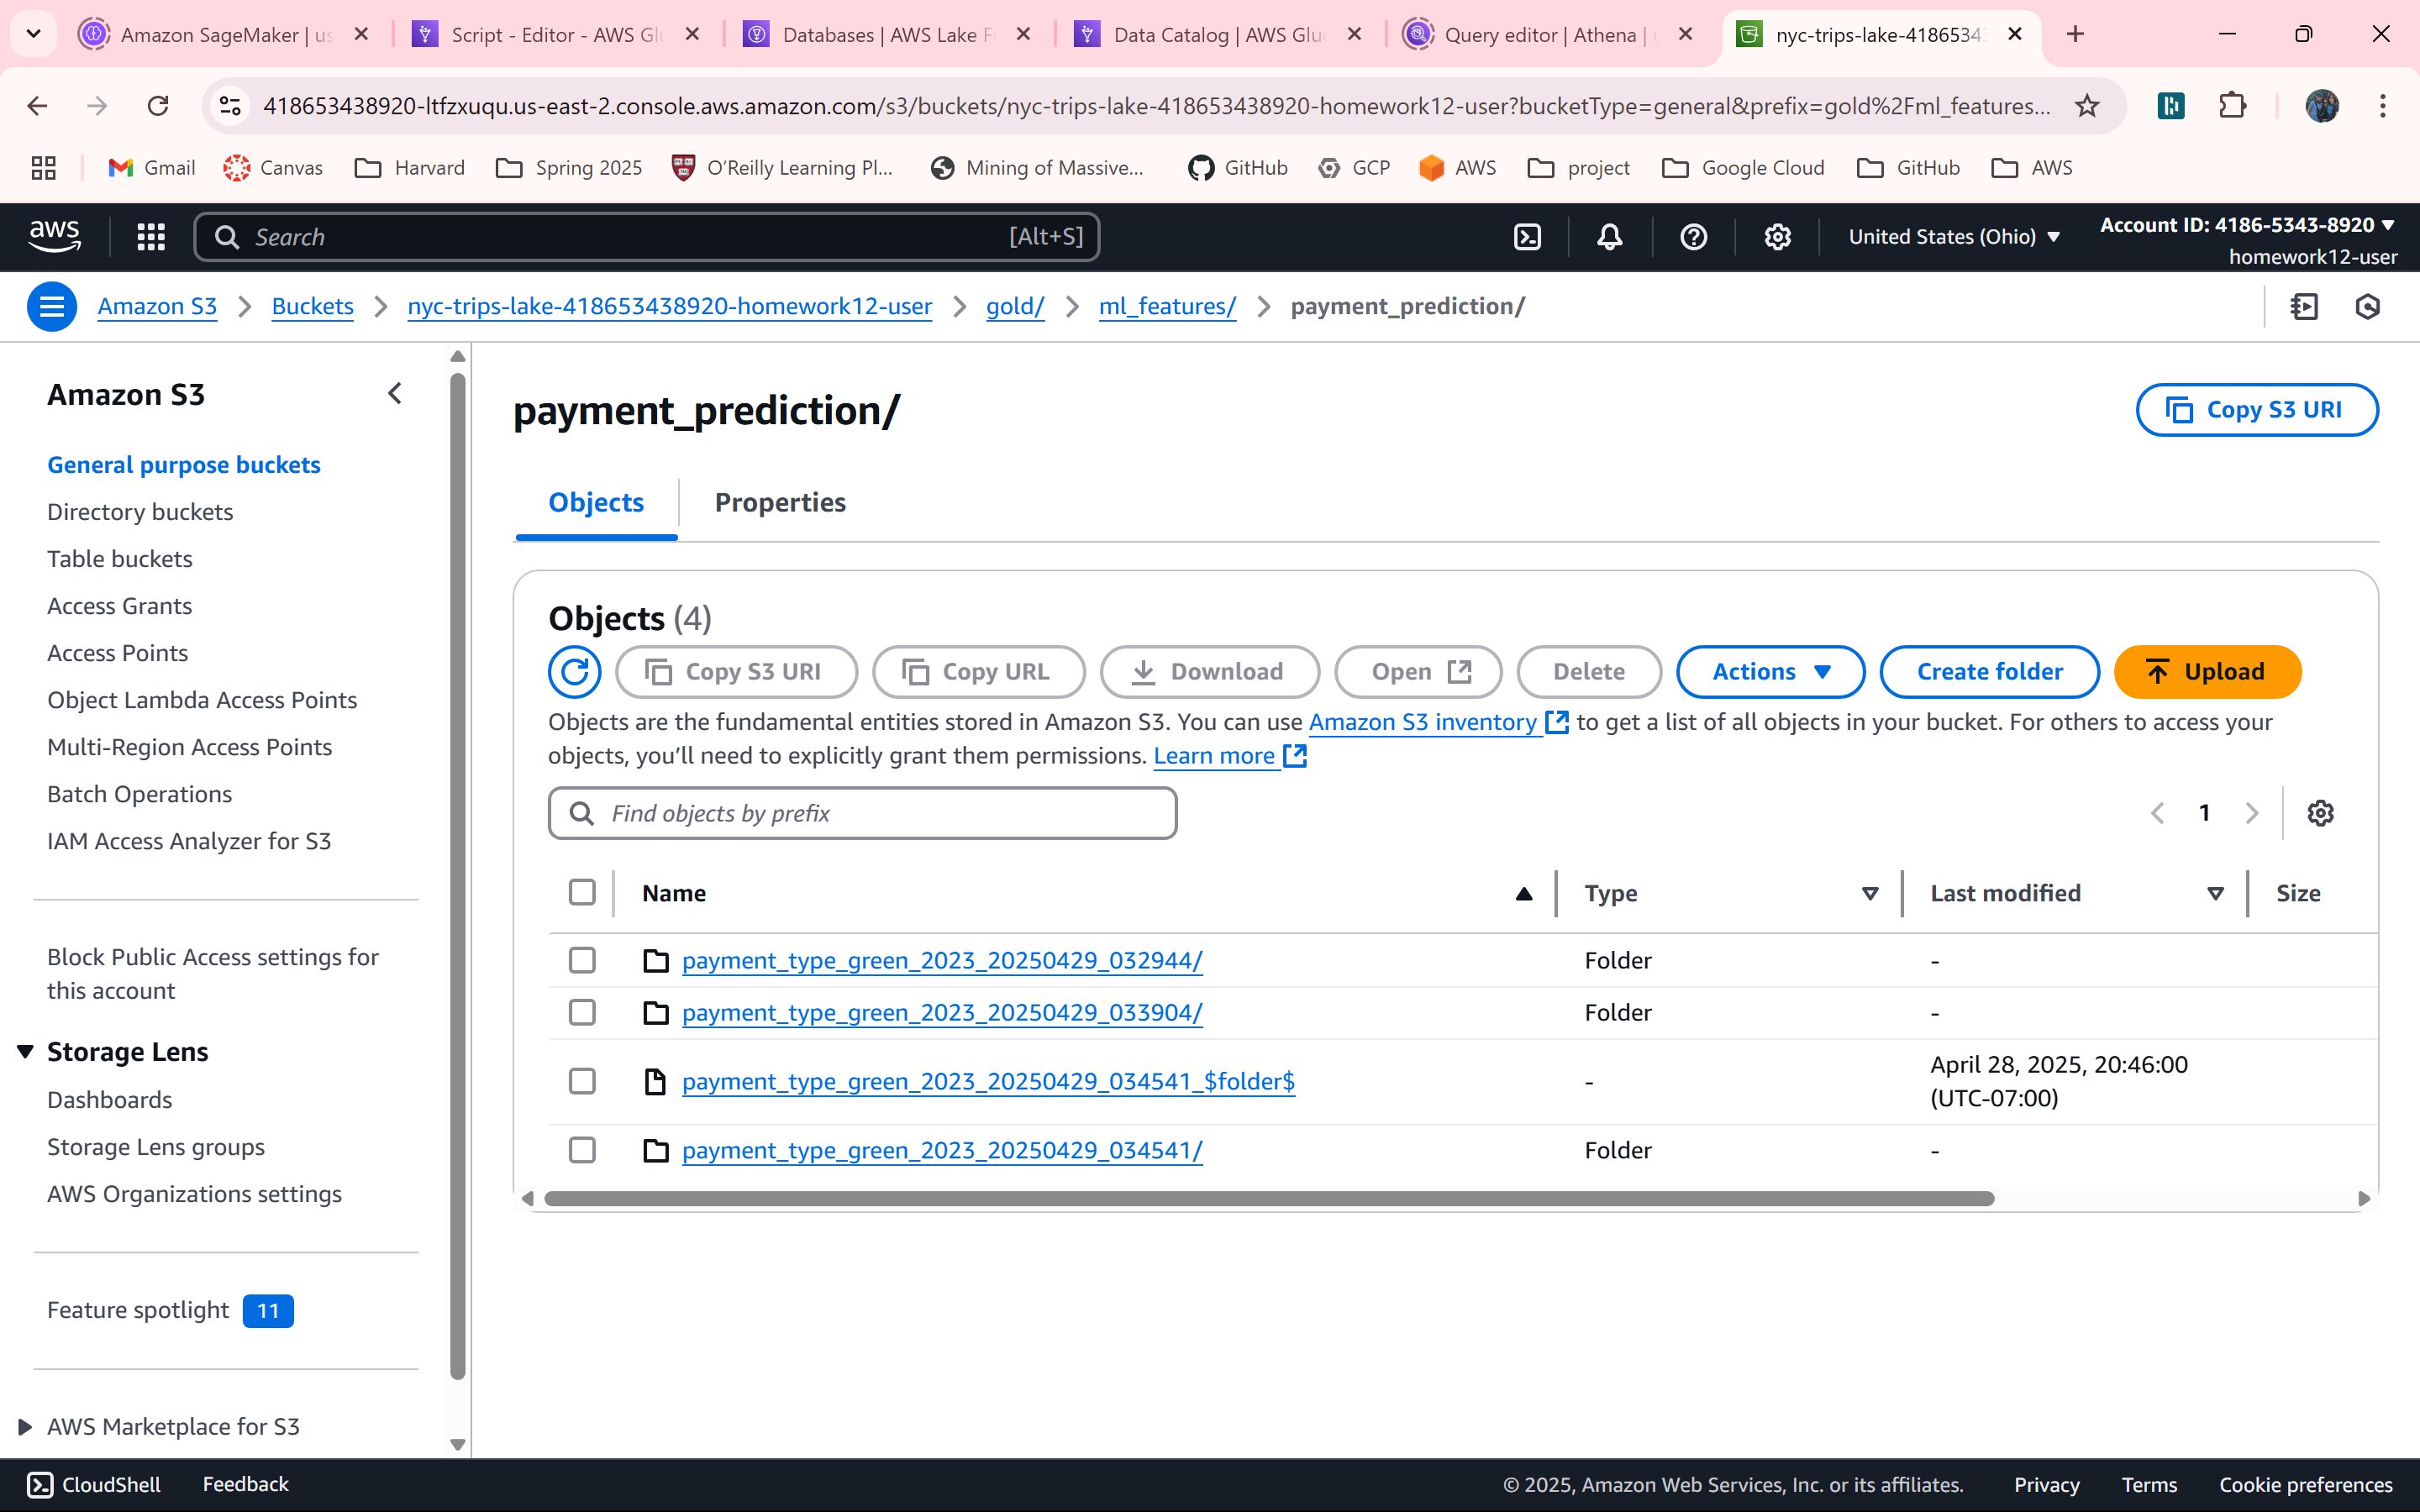

*payment_prediction*

In [2]:
results.show_figure(
            "payment_prediction.png",
            "payment_prediction",
         )

##### Discussion

*Network Topology*
- The visualization uses a force-directed graph layout.
- Blue nodes represent key communities or significant web pages.
- Gray lines demonstrate interconnectivity between different nodes and communities.
- The dense central blue cluster suggests a core academic network.

*Connectivity Characteristics*
- Node sizes represent their relative importance or connectivity.
- The radial structure indicates hierarchical relationships between different web resources.
- Prominent nodes like `226411` seem to have extensive connection pathways.

*Community Structure*
- Multiple distinct communities are visible (e.g., Communities 11 and 6 are explicitly labeled).
- The dense central cluster suggests a tightly interconnected academic information ecosystem.
- Peripheral nodes represent bridge pages or interdisciplinary connection points.

*Technical Interpretation*
- The graph demonstrates the [*scale-free*](#)⁴ network properties.
- Node numbers (e.g., `226411`, `234704`) are unique web page identifiers within Stanford's web infrastructure.

⁴ *See "Power Law Fit for In-Degree Distribution" and "Power Law Fit for Out-Degree Distribution" graphs in Part [VI](#), Section [6.2.1. Data Exploration](#03)*


### 6.1.2. 

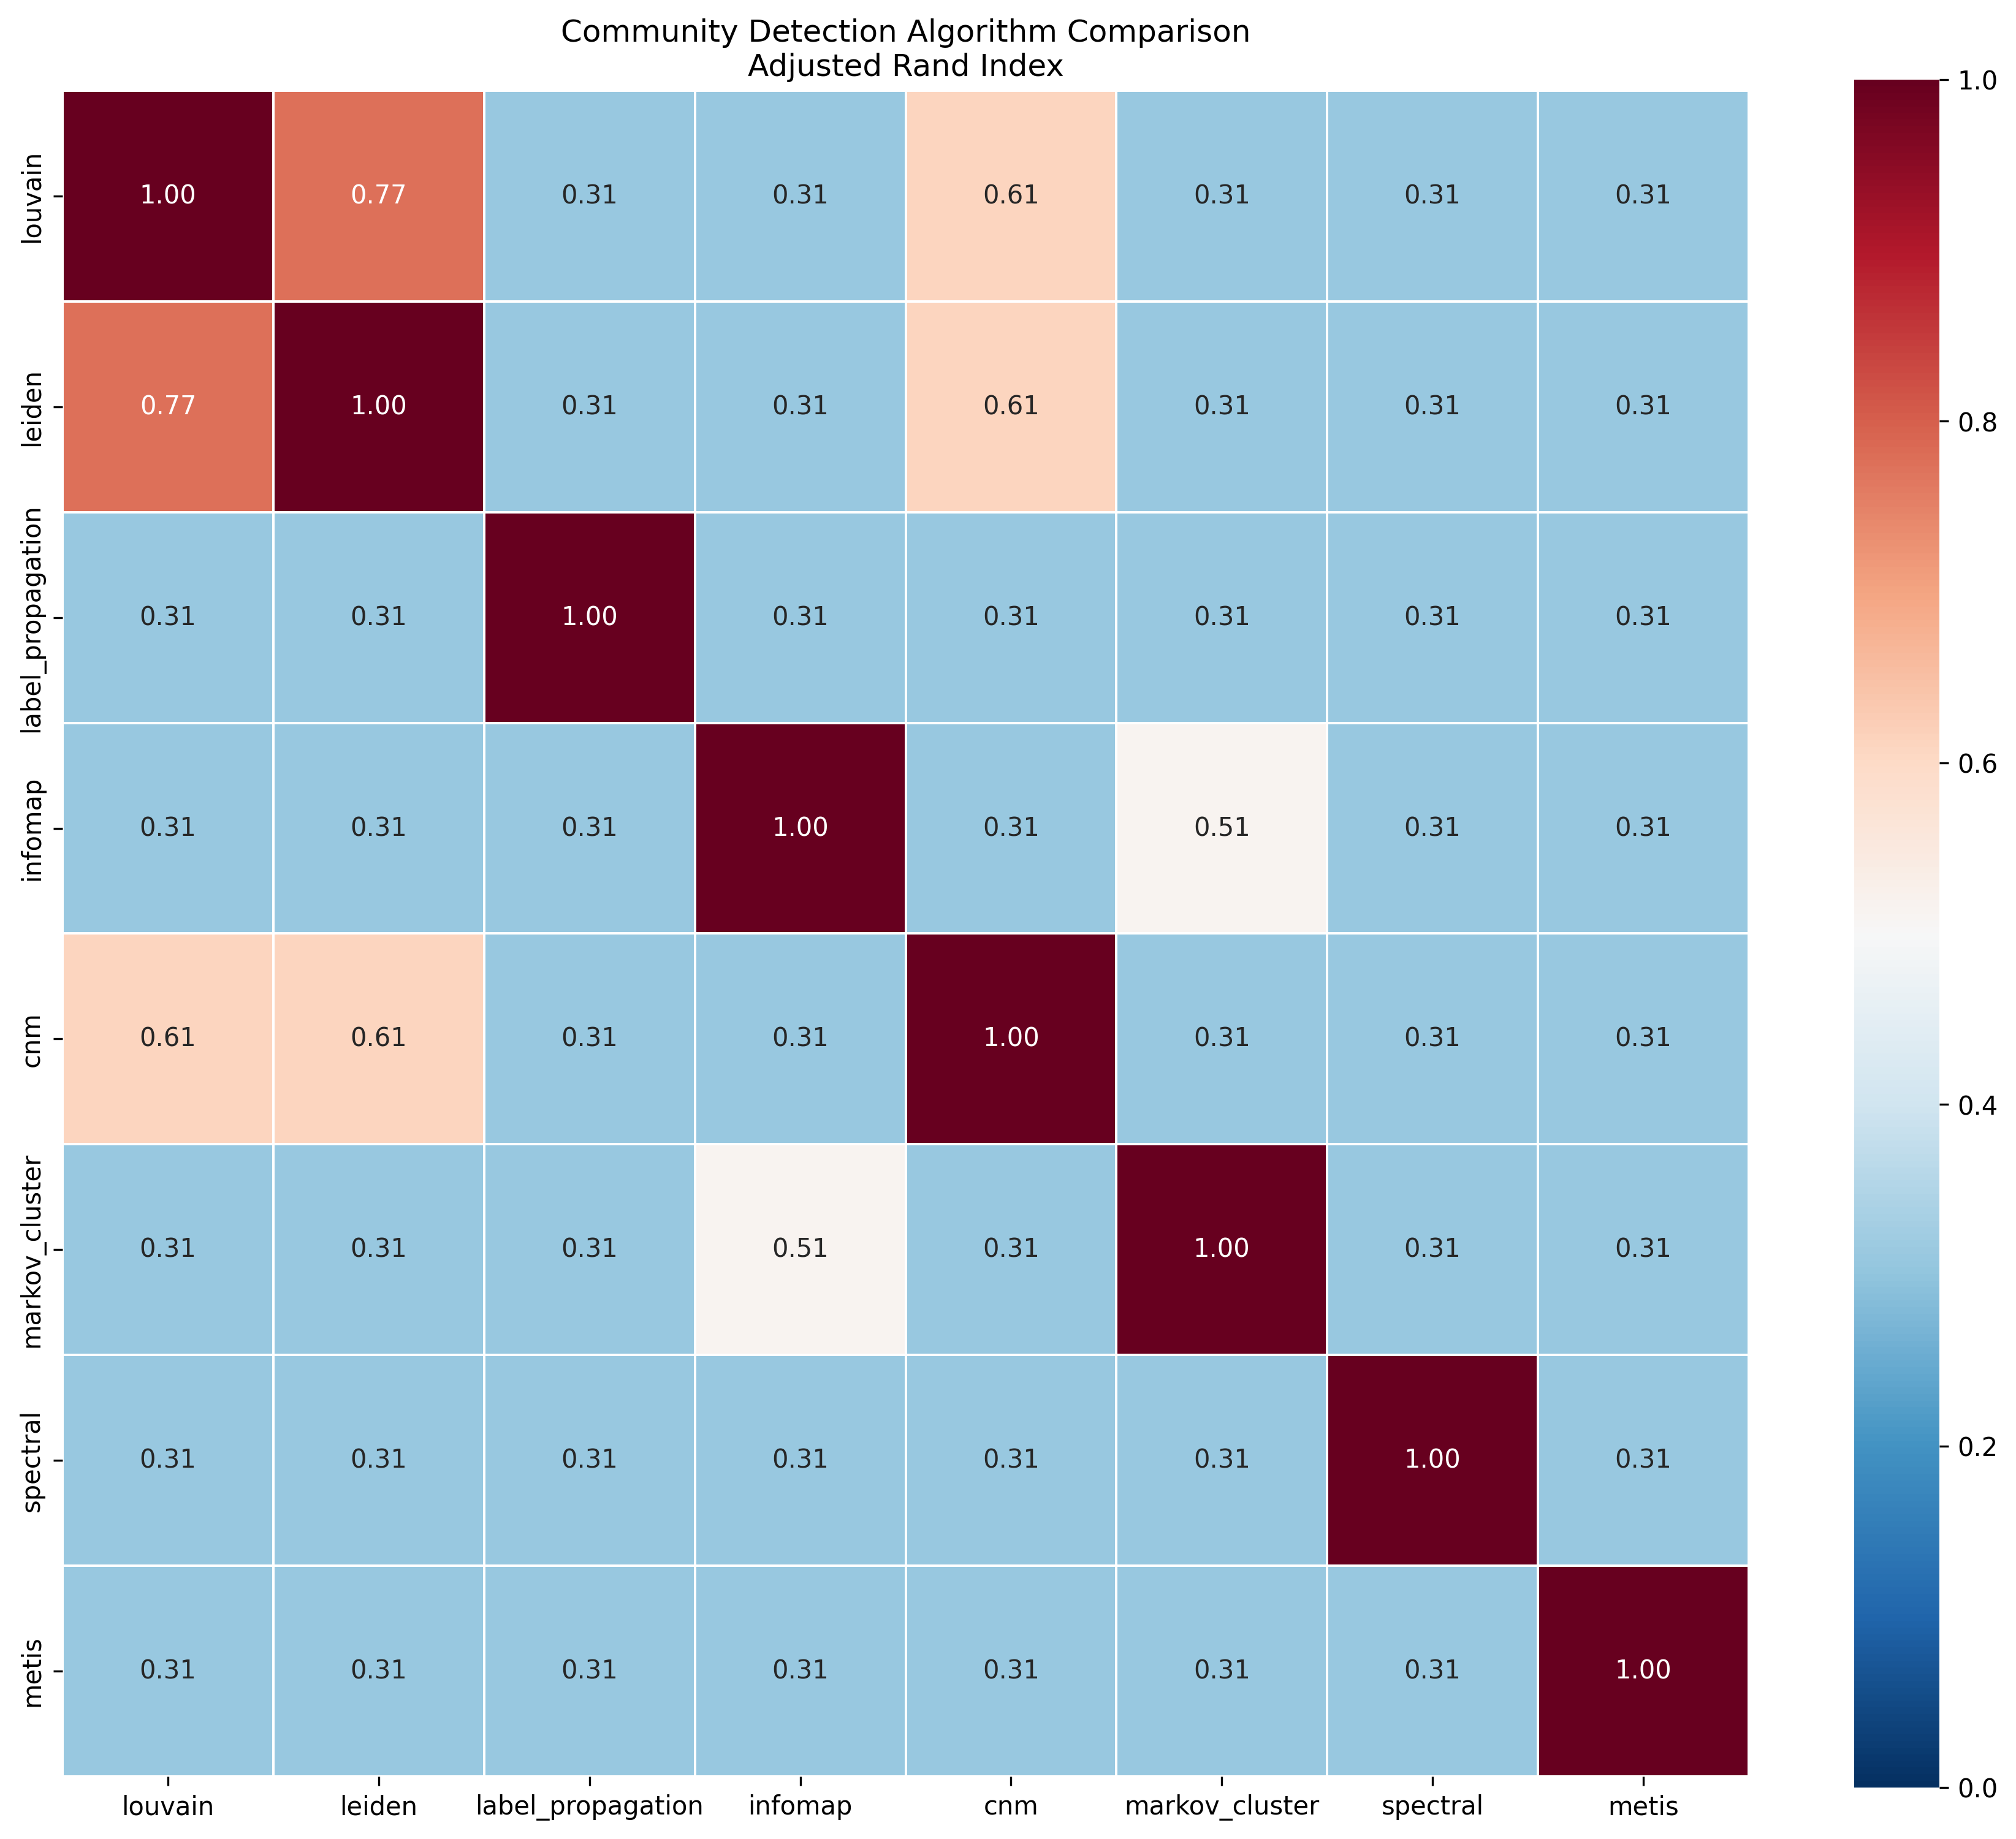

*Algorithm Comparison ARI*

In [27]:
results.show_figure(
            "algorithm_comparison_ari.png",
            "Algorithm Comparison ARI",
         )

##### Discussion

This heatmap visualizes the *pairwise similarity* between *eight* different *community detection* algorithms applied to the Stanford web graph, using the *Adjusted Rand Index (ARI)* as the *similarity metric*. The ARI measures how closely two partitions of the same data agree, with values ranging from approximately -*0.5* (random partitioning) to *1.0* (perfect agreement).

*Key Insights from the Visualization*

**Algorithmic Families Emerge Clearly**
- *Louvain and Leiden* show *strong agreement (ARI = 0.77)*, which is expected as they *share core methodology (modularity optimization)*, with *Leiden* being an improved version of *Louvain*.
- *Louvain/Leiden* also show *moderate agreement with CNM (ARI = 0.61)*, another *modularity-based* method.
- *Infomap and Markov cluster* show *some agreement (ARI = 0.51)*, which makes sense as both are *flow-based* methods.

**Method Divergence Across Categories**
- Most algorithm pairs show *very low agreement (ARI ≈ 0.31)*, suggesting they identify fundamentally different community structures.
- This consistent *0.31* value across many pairs might indicate a baseline level of agreement due to obvious *community structures* in the network.
- The *spectral methods (Spectral, METIS)* show *minimal agreement* with all other approaches.

**Methodological Implications**
- The strong *modularity-based* algorithm clustering suggests these methods are capturing similar structural properties.
- The *low agreement* between different methodological families (*modularity-based, flow-based, spectral*) indicates they *prioritize different aspects of network structure*.
- This highlights how *different mathematical definitions of "community" lead to substantially different results.*

**Practical Guidance for Algorithm Selection**
- For robust results, a consensus approach combining *Louvain and Leiden* might be effective.
- Different algorithm families *likely identify complementary aspects of community structure.*
- The choice of algorithm should be guided by the specific definition of community relevant to the research question.

**Conclusion:**
The pattern of values supports the project's conclusion that algorithm selection significantly impacts the detected community structure. *Different algorithms highlight different aspects* of network organization rather than converging on a single "true" community structure.


### 6.1.3. 

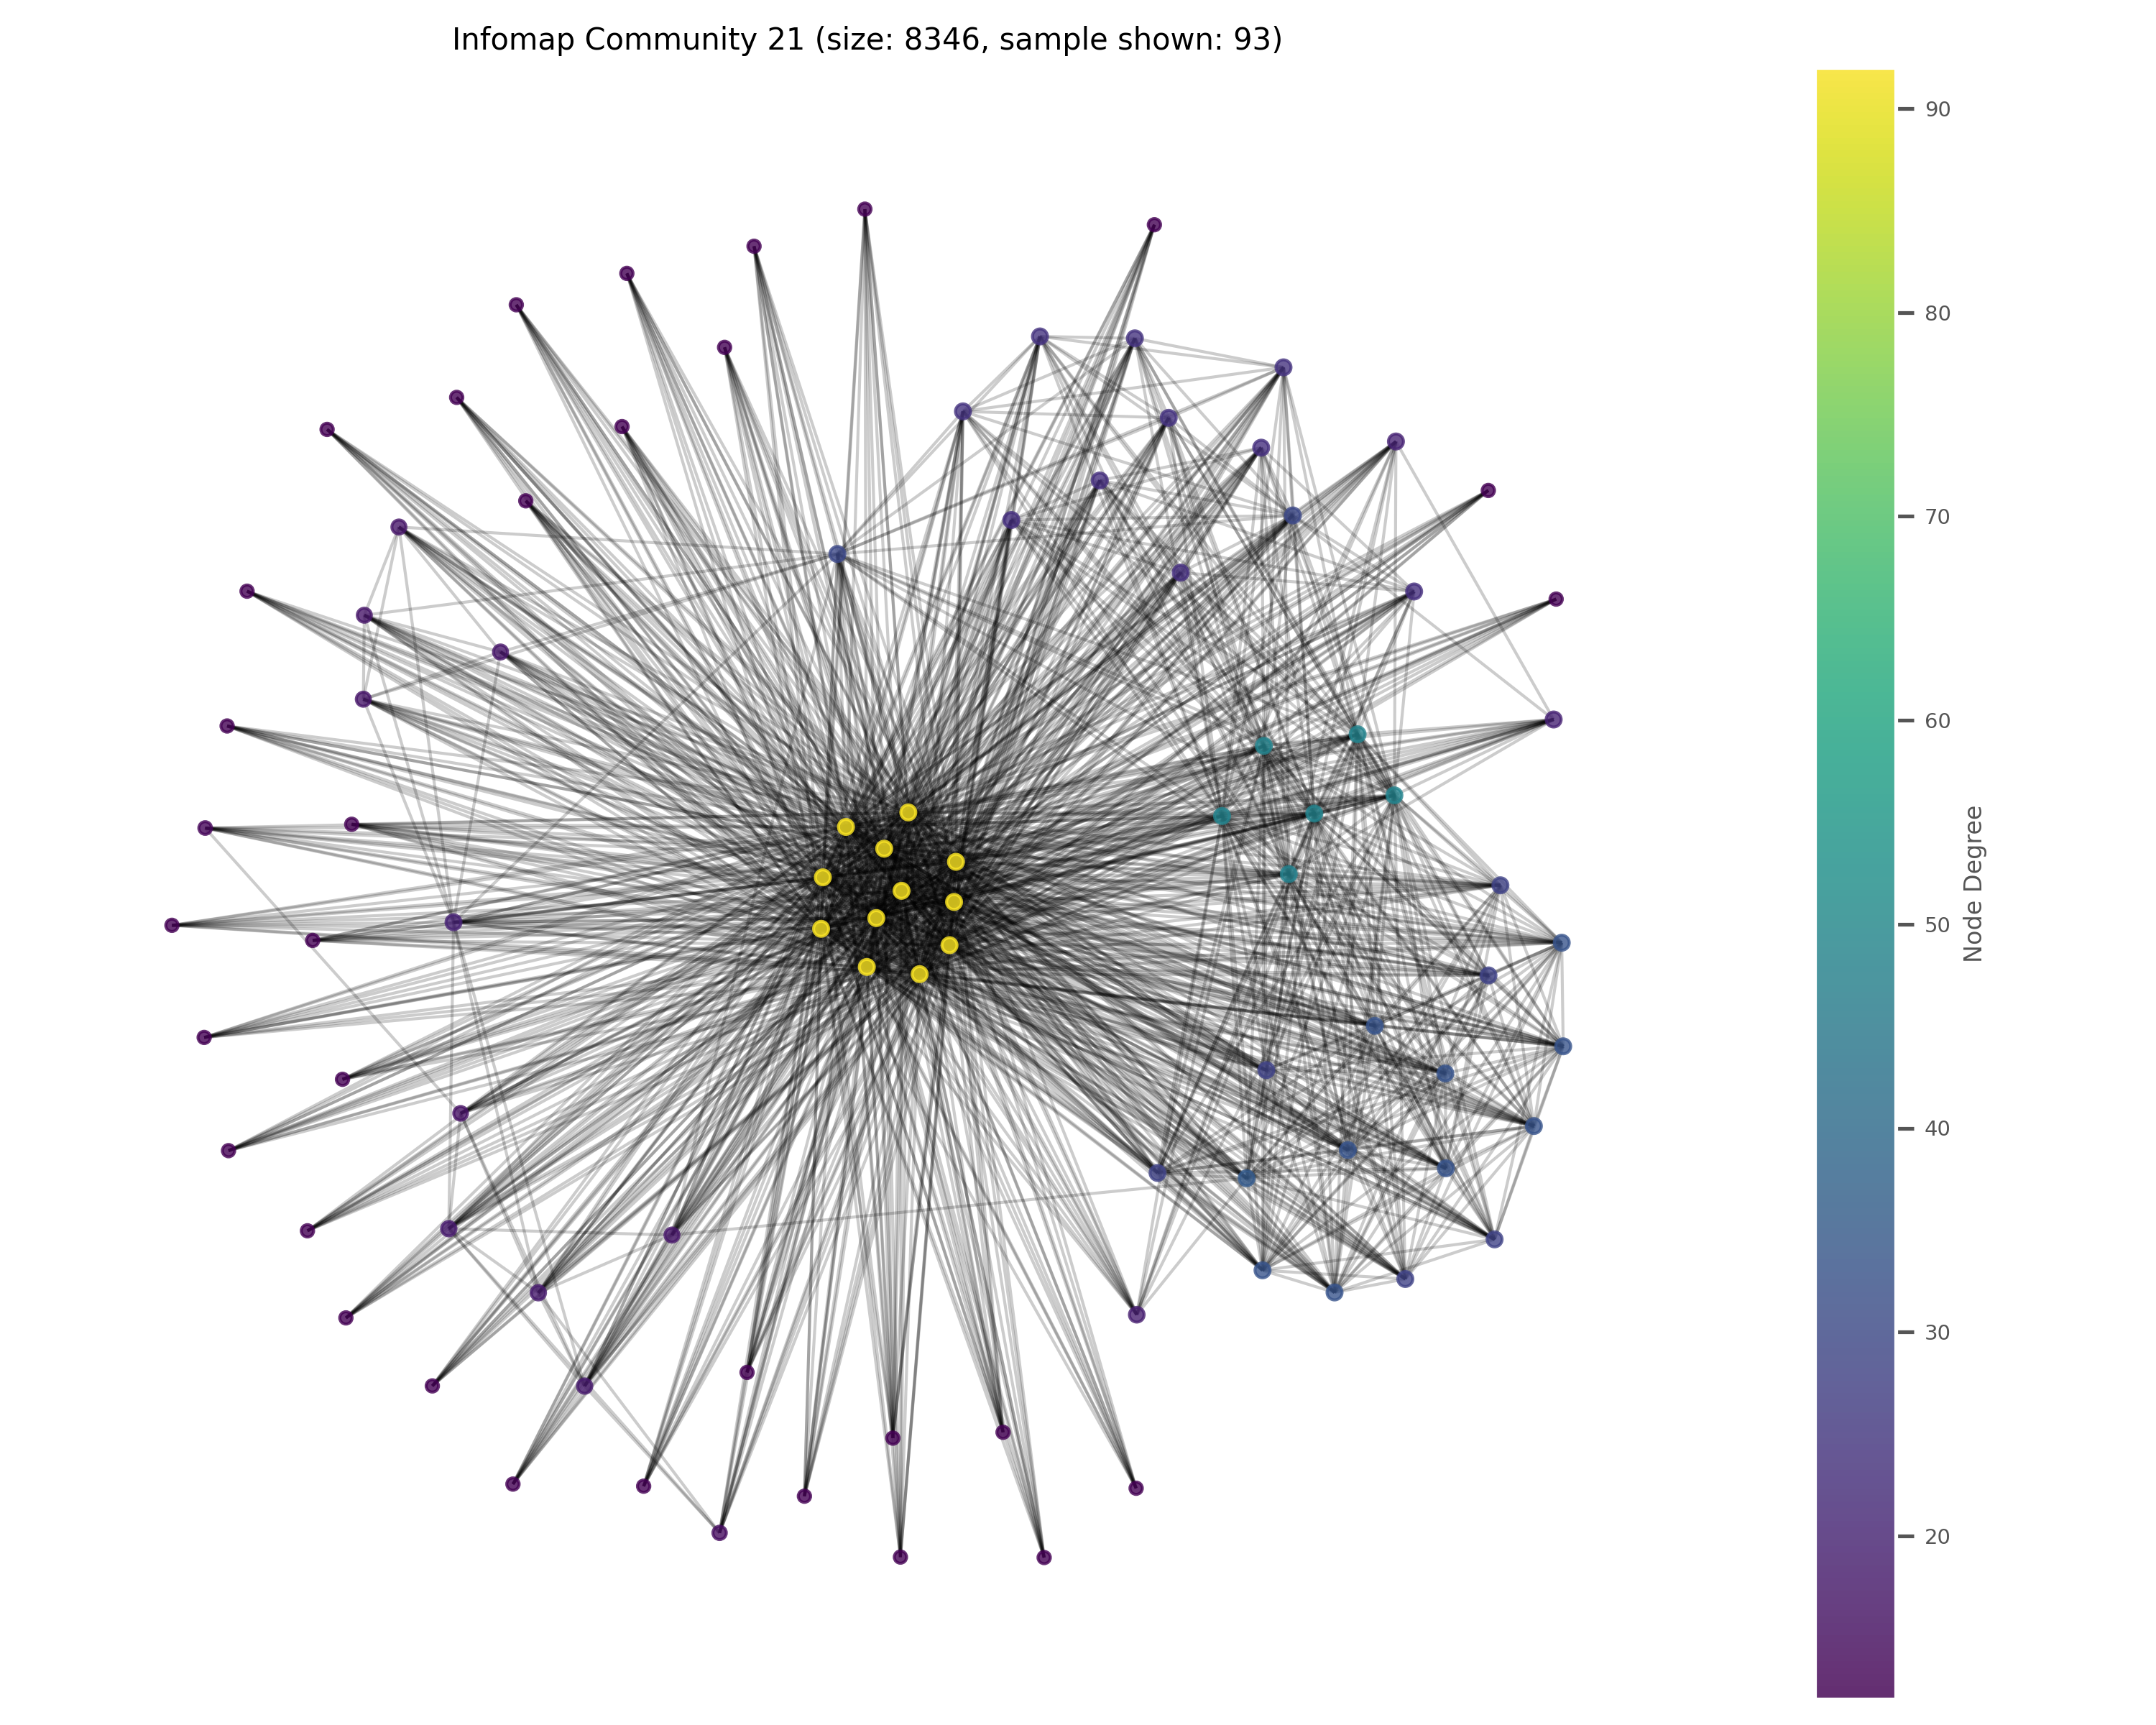

*Infomap Community*

In [28]:
results.show_figure(
            "infomap_community_21_graph.png",
            "Infomap Community",
         )

##### Discussion

This visualization provides an insightful view of a community detected by the Infomap algorithm in the Stanford web graph. Infomap is a flow-based community detection algorithm that identifies communities by analyzing how information flows through a network, making it particularly effective at finding meaningful communities in web graphs.

The graph displays a sample (93 nodes) from a much larger community ([*8,346*](#)³¹ nodes) and reveals several important structural characteristics: <br>

*Hub-and-Spoke Architecture*

The most striking feature is the clear hub-and-spoke pattern. The central yellow nodes (with degrees of 85–90) act as major hubs that connect to many peripheral nodes, forming a star-like structure.  
This pattern is typical of authoritative web pages that receive many incoming links. <br>

*Hierarchical Structure*

The visualization shows at least two distinct tiers of connectivity:

- Core hub nodes (yellow, highest degree) at the center  
- Secondary connector nodes (blue/teal, moderate degree, 30–50) forming a more densely connected region on the right  
- Peripheral nodes (purple, low degree, 10–20) radiating outward with few connections except to hubs   <br><br>

*Dense Interconnections*

The high density of edges indicates strong internal connectivity within this community, which explains why Infomap grouped these nodes together.  
The algorithm identifies communities based on information flow patterns, and this structure suggests information can efficiently circulate within this group. <br>

*Sub-Community Formation*

The right side of the graph shows a more densely interconnected group of medium-degree nodes (blue), suggesting a possible sub-community or topic specialization within the larger community. <br>

*Academic Interpretation*
From an academic web structure perspective, this likely represents a significant department or research area at Stanford:

- Hub nodes might be department homepages or major resource pages
- Peripheral nodes could be individual faculty pages, course pages, or specialized research project sites
- The moderately connected region could represent a sub-discipline or research group with stronger internal collaboration <br><br>

*Infomap's Effectiveness*

Infomap’s ability to detect this type of structure highlights why it achieves high semantic coherence scores in the project's algorithm comparisons.  
The clearly defined information flow patterns create communities that align well with real-world academic structures.


### 6.1.4. 

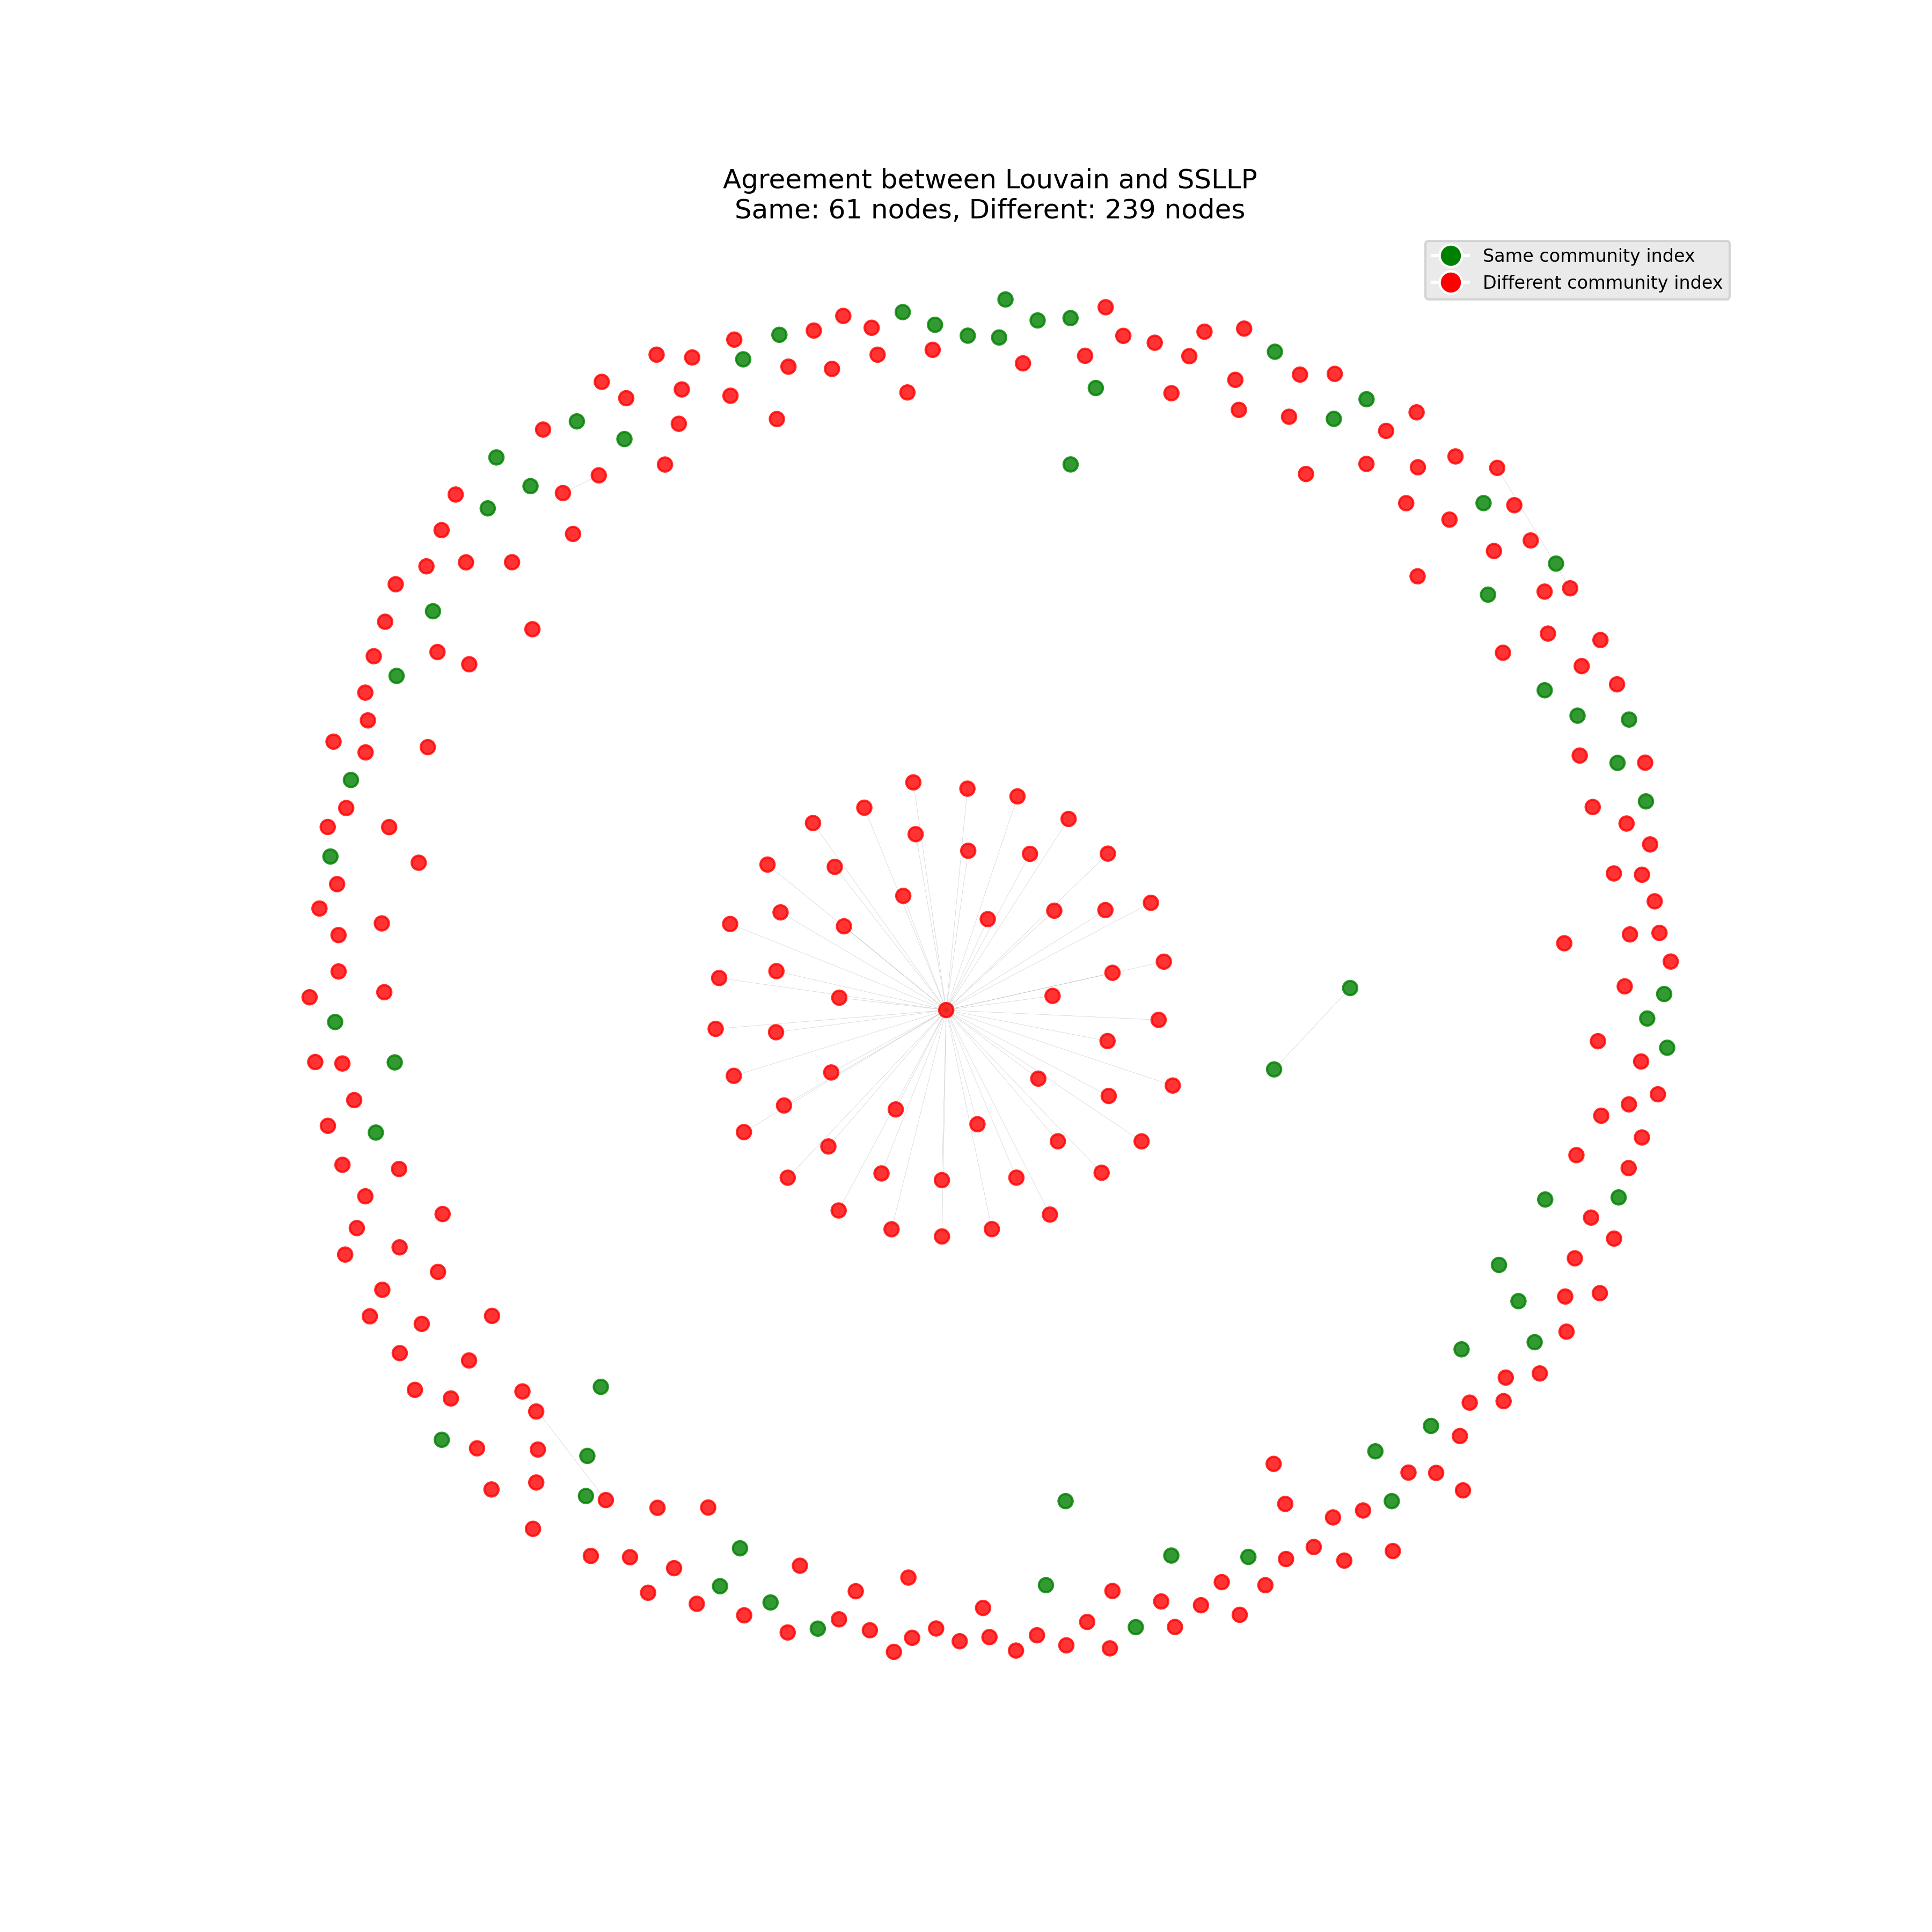

*Agreement between Louvain and SSLLP*

In [29]:
results.show_figure(
            "community_method_agreement.png",
            "Agreement between Louvain and SSLLP",
         )

##### Discussion

This visualization compares the community assignments made by two different community detection algorithms applied to the same network: the Louvain algorithm and Semi-Supervised Label Propagation (SSLP).  
The circular layout graphically represents nodes from the Stanford web graph, with colors indicating whether both algorithms assigned a node to the same community (green) or to different communities (red). The visualization reveals several important insights about community detection algorithm performance:

*Agreement Level*

- As shown in the title, there is relatively low agreement between these algorithms:
  - Only 61 nodes received the same community assignment
  - 239 nodes (~80% of the visible network) were assigned to different communities  
- This significant disagreement highlights how different algorithmic approaches can produce substantially different interpretations of community structure in the same network. <br><br>

*Structural Patterns*

- The green nodes (agreement) appear more frequently along the outer ring of the visualization, suggesting these algorithms may agree more readily on peripheral nodes.
- The central star-like structure consists entirely of red nodes, indicating complete disagreement on this cluster's community assignments.
- The disagreement nodes form certain coherent patterns, suggesting systematic differences in how these algorithms perceive communities. <br><br>

*Methodological Differences*

This visualization illustrates fundamental differences between these algorithms:

- Louvain:
  - Optimizes modularity through hierarchical node aggregation
  - Entirely unsupervised <br><br>

- SSLP:
  - Uses neighbor influence propagation
  - Requires some initial seed labels (semi-supervised)

These different optimization criteria and approaches clearly lead to substantially different partitioning decisions.

*Conclusion*

This type of comparative analysis is valuable for understanding algorithm robustness and reliability.  
The low agreement suggests that community structures in this network might be ambiguous or overlapping, challenging the notion of clear-cut community boundaries.

For practical applications:
- Such disagreement might warrant using ensemble methods that combine multiple algorithms.
- Or, carefully selecting the most appropriate algorithm based on domain knowledge of expected community structures.


### 6.1.5. 

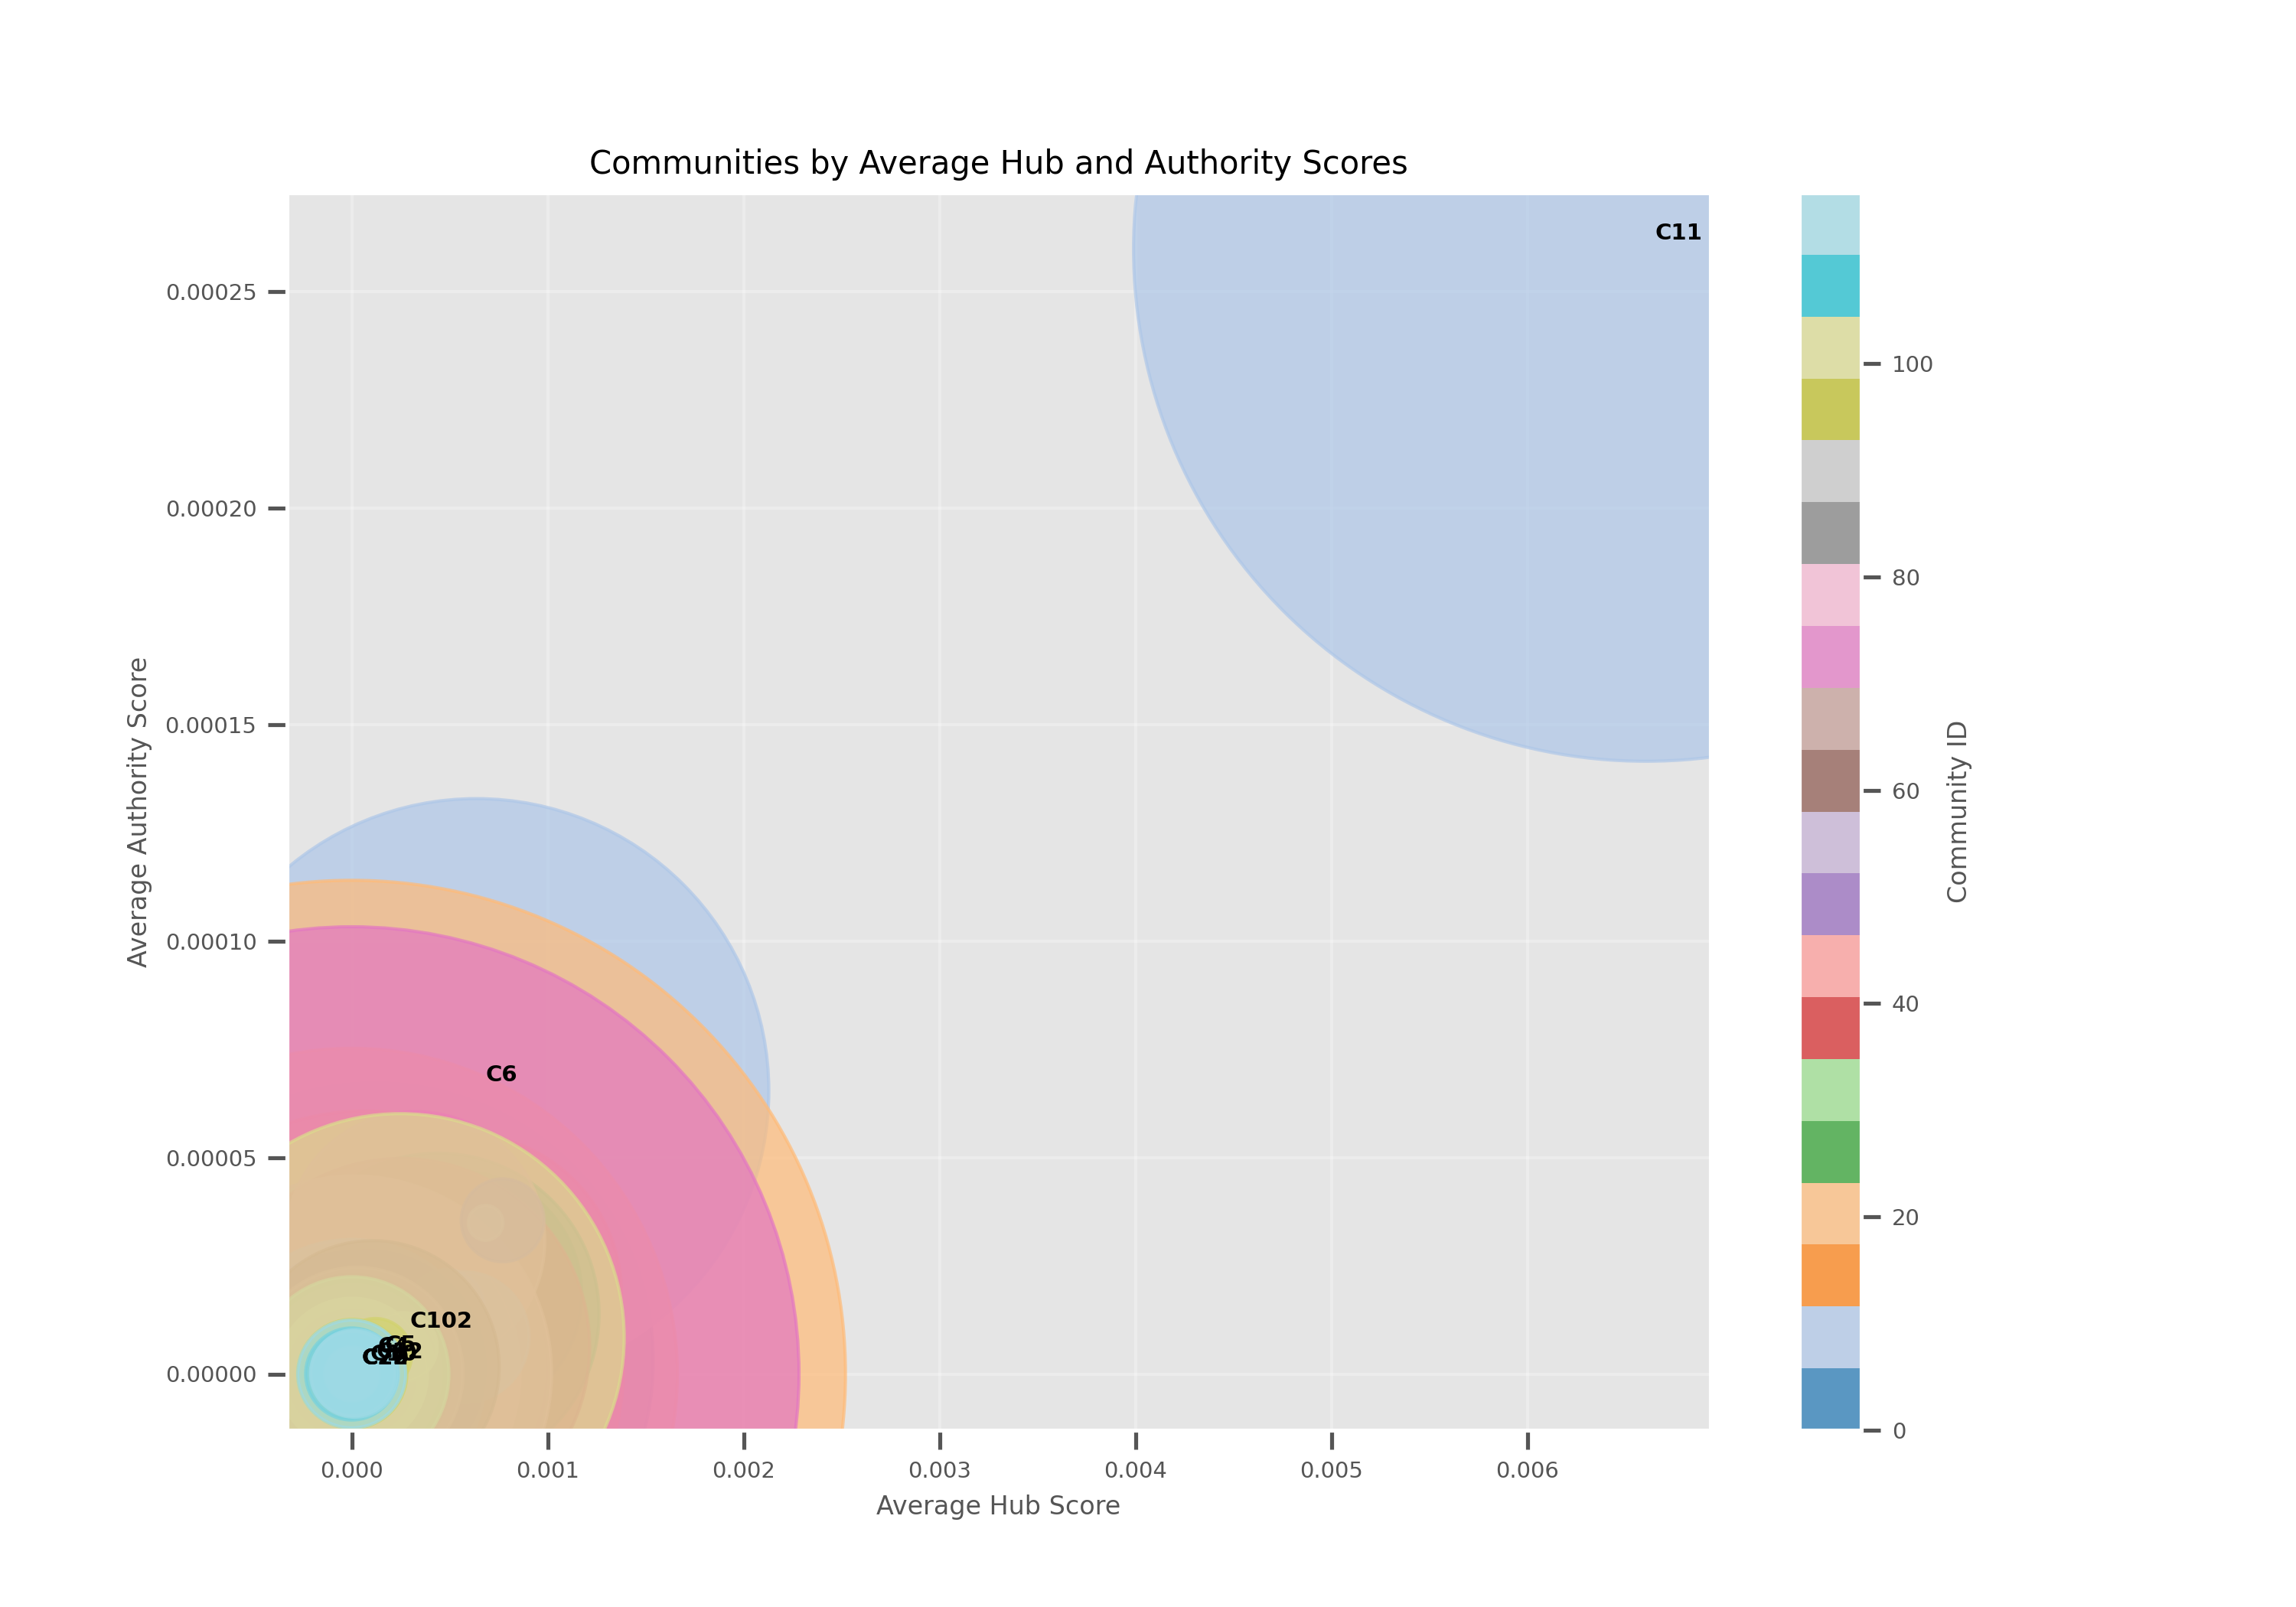

*Communities by Average Hub and Authority Scores*

In [30]:
results.show_figure(
            "community_hits_scores.png",
            "Communities by Average Hub and Authority Scores",
         )

##### Discussion

This *contour plot* visualizes a key aspect of the Stanford web graph analysis by *mapping communities according to their average hub and authority scores*. This type of analysis builds on techniques developed by researchers at Stanford, who have published extensively on *network community detection* algorithms and *link analysis* methods like *HITS (Hyperlink-Induced Topic Search)*.

The Visualization Shows:

1. **Distinct Community Roles**:  
The plot reveals a *clear specialization* among communities in the web graph:

- Community *C11* stands alone in the upper right, with *extraordinarily high average hub scores ([*0.006*](#)¹)* and *high authority scores (~[*0.00026*](#)¹)*.
- Community *C6* occupies the middle-left region with *moderate authority scores (~[*0.0001*](#)¹)* but relatively low hub scores.
- [Most communities (including *C102* and others) cluster near the origin with low scores in both dimensions.](#)³⁰

2. **Functional Differentiation**:  
This pattern indicates *specialized roles* within the academic web structure:

- *C11* likely represents a central university portal or major department that serves both as a *significant hub* (*pointing to many resources*) and as an *authority* (*receiving many inbound links*).
- *C6* appears to *function primarily as an authority-focused community* with valuable content but fewer outbound connections.
- The majority of communities near the origin likely represent smaller academic units or specialized research groups with *more localized influence*.

3. **Contour Patterns**:  
The *blue contour regions* visually *group communities with similar score profiles*, highlighting:

- The rarity of communities with high scores in either dimension.
- The exceptional nature of communities with high scores in both dimensions.

*Conclusion*

This visualization effectively demonstrates how the *HITS* algorithm can reveal natural stratification in web communities. The extreme positioning of *C11* aligns with previous findings showing that a small number of communities contain a disproportionate share of hub and authority activity in academic networks.

In practical applications, this type of analysis helps:

- Identify the *most influential communities* in a network.
- Understand their distinct roles in information distribution and consumption.

¹ *See Part [I](#), Section [1.1.3. Algorithm Performance Statistics](#01)*

³⁰ *See Part [VI](#), Section [6.1.5. Contour Plot Analysis of Stanford Web Graph Communities](#24)*


### 6.1.6. 

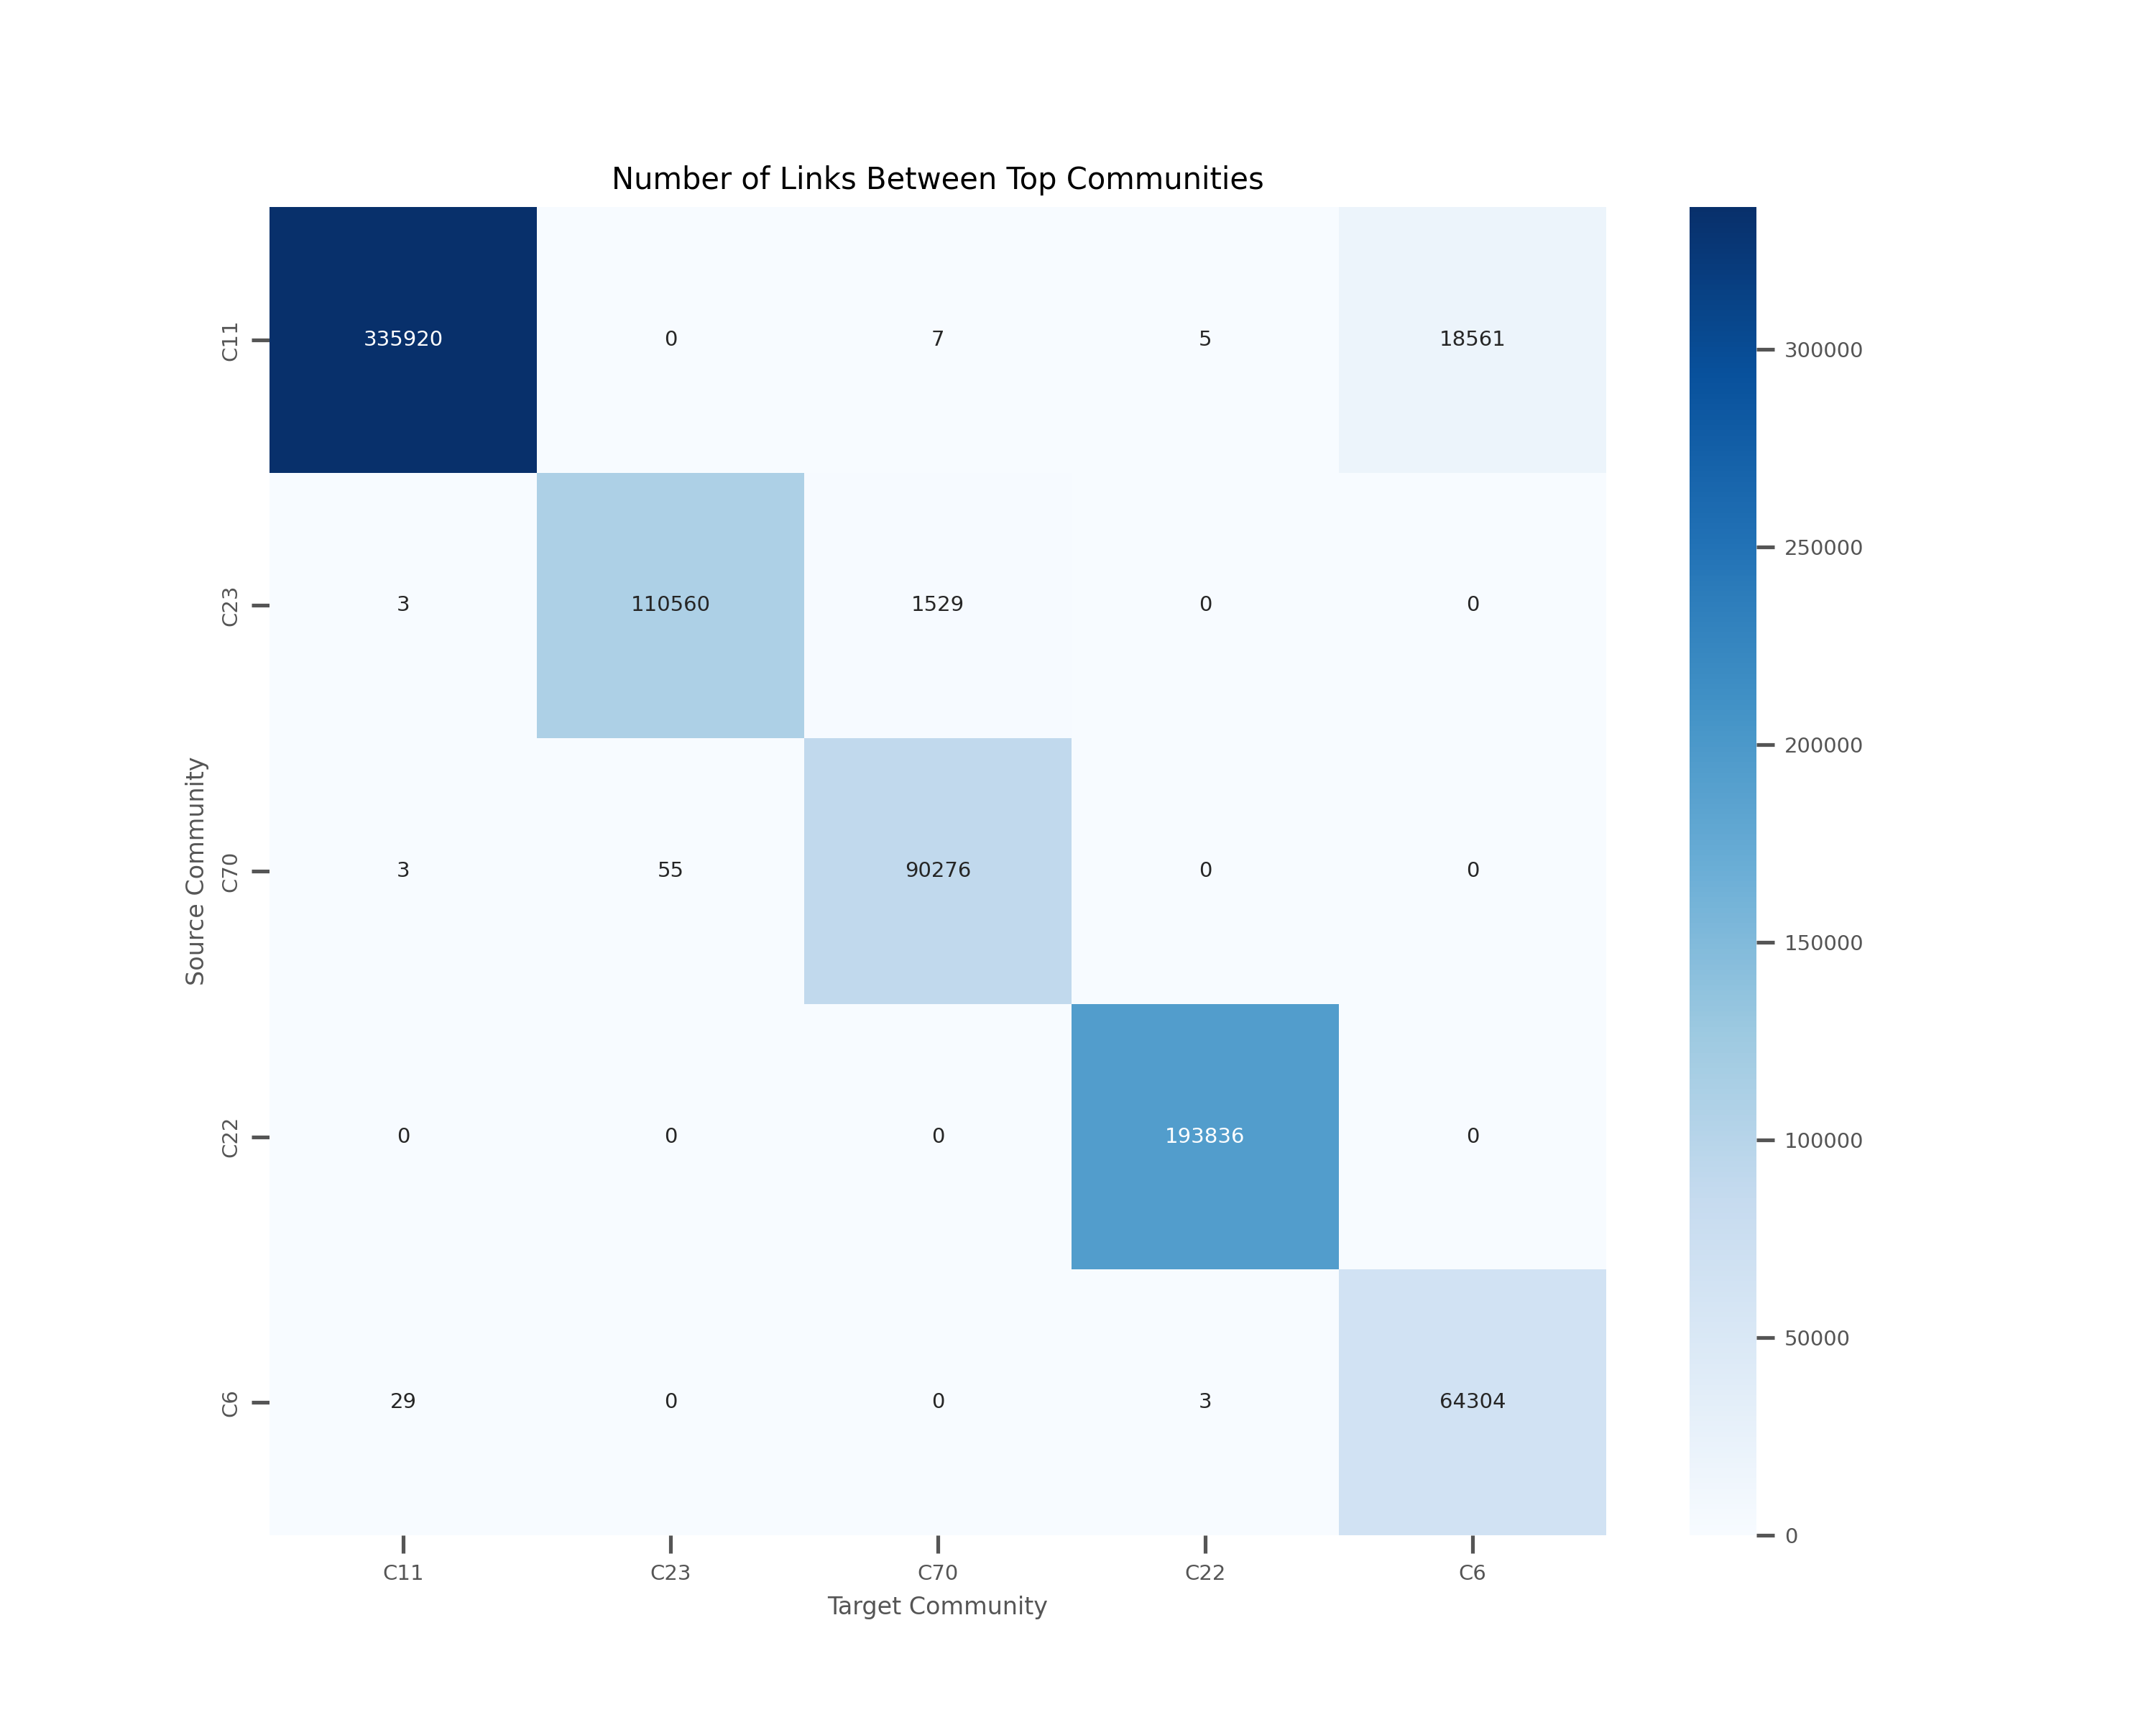

*Number of Links Between Top Communities*

In [31]:
results.show_figure(
            "community_connections_raw.png",
            "Number of Links Between Top Communities",
         )

##### Discussion

This heatmap visualizes the *connectivity patterns* between the top communities in the Stanford web graph, providing important insights into the *inter-community link structure*:

The visualization shows a matrix where both axes represent *communities (`C11`, `C23`, `C70`, `C22`, `C6`)*, with the *color intensity* and *numeric labels* indicating the *number of directed links* from source communities (y-axis) to target communities (x-axis).

*Key Patterns Revealed:*

1. **Strong Internal Connectivity**
The *diagonal cells* show the *number of internal links* within each community:
- *C11* has the strongest internal connectivity with [*335,920*](#)²² links  
- *C22* has *193,836* internal links  
- *C23* has *110,560* internal links  
- *C70* has *90,276* internal links  
- *C6* has *64,304* internal links  <br><br>

2. **Sparse Inter-Community Connections**
Most *off-diagonal cells* show *very few or zero links* between different communities:
- Many cells contain *zeros*, indicating *no direct connections* between certain community pairs  
- Even when connections exist, they are *orders of magnitude smaller* than internal connections  
- This confirms the *strong modularity* of the network structure  

3. **One-Sided Connectivity Patterns**
The connections that do exist between communities are often *asymmetric*:
- *C11 → C6*: [*18,561*](#)²² links  
- *C6 → C11*: only [*29*](#)²² links  
- *C23 → C70*: *1,529* links  
- *C70 → C23*: only *55* links    <br><br>

This suggests hierarchical relationships, where some communities primarily reference others.

4. **Hub Community Identification**
Based on outgoing connections:
- *C11* appears to function as a major hub, sending substantial links to *C6 (18,561)* while maintaining few connections to other communities  
- This suggests *C11* might represent a central university portal or major department that primarily links to *C6*    <br><br>

5. **Isolated Communities**
- Community *C22* shows a particularly isolated pattern:  
  - Strong internal connectivity (*193,836* links)  
  - Sends and receives almost no links to/from other major communities  
  - Suggests a self-contained academic unit with minimal interdisciplinary connections    <br><br>

*Network Science Interpretation*

From a network science perspective, this visualization reveals classical characteristics of a *modular network* with communities that are:

- Internally dense (many links within communities)  
- Externally sparse (few links between communities)  
- Hierarchically structured (asymmetric connection patterns)    <br><br>

This pattern is consistent with academic organizational structures, where departments have strong internal communication but limited cross-departmental interaction.

The few strong inter-community connections (like *C11 → C6*) likely represent important institutional relationships that bridge different academic areas.

*Insights*
The quantification of these relationships provides valuable insights for:
- Understanding information flow in academic networks  
- Identifying potential bridging opportunities to enhance interdisciplinary connections  

²² *See Part [VI](#), Section [6.1.6. Inter-Community Connectivity Heatmap Analysis](#17)*


### 6.1.7. 

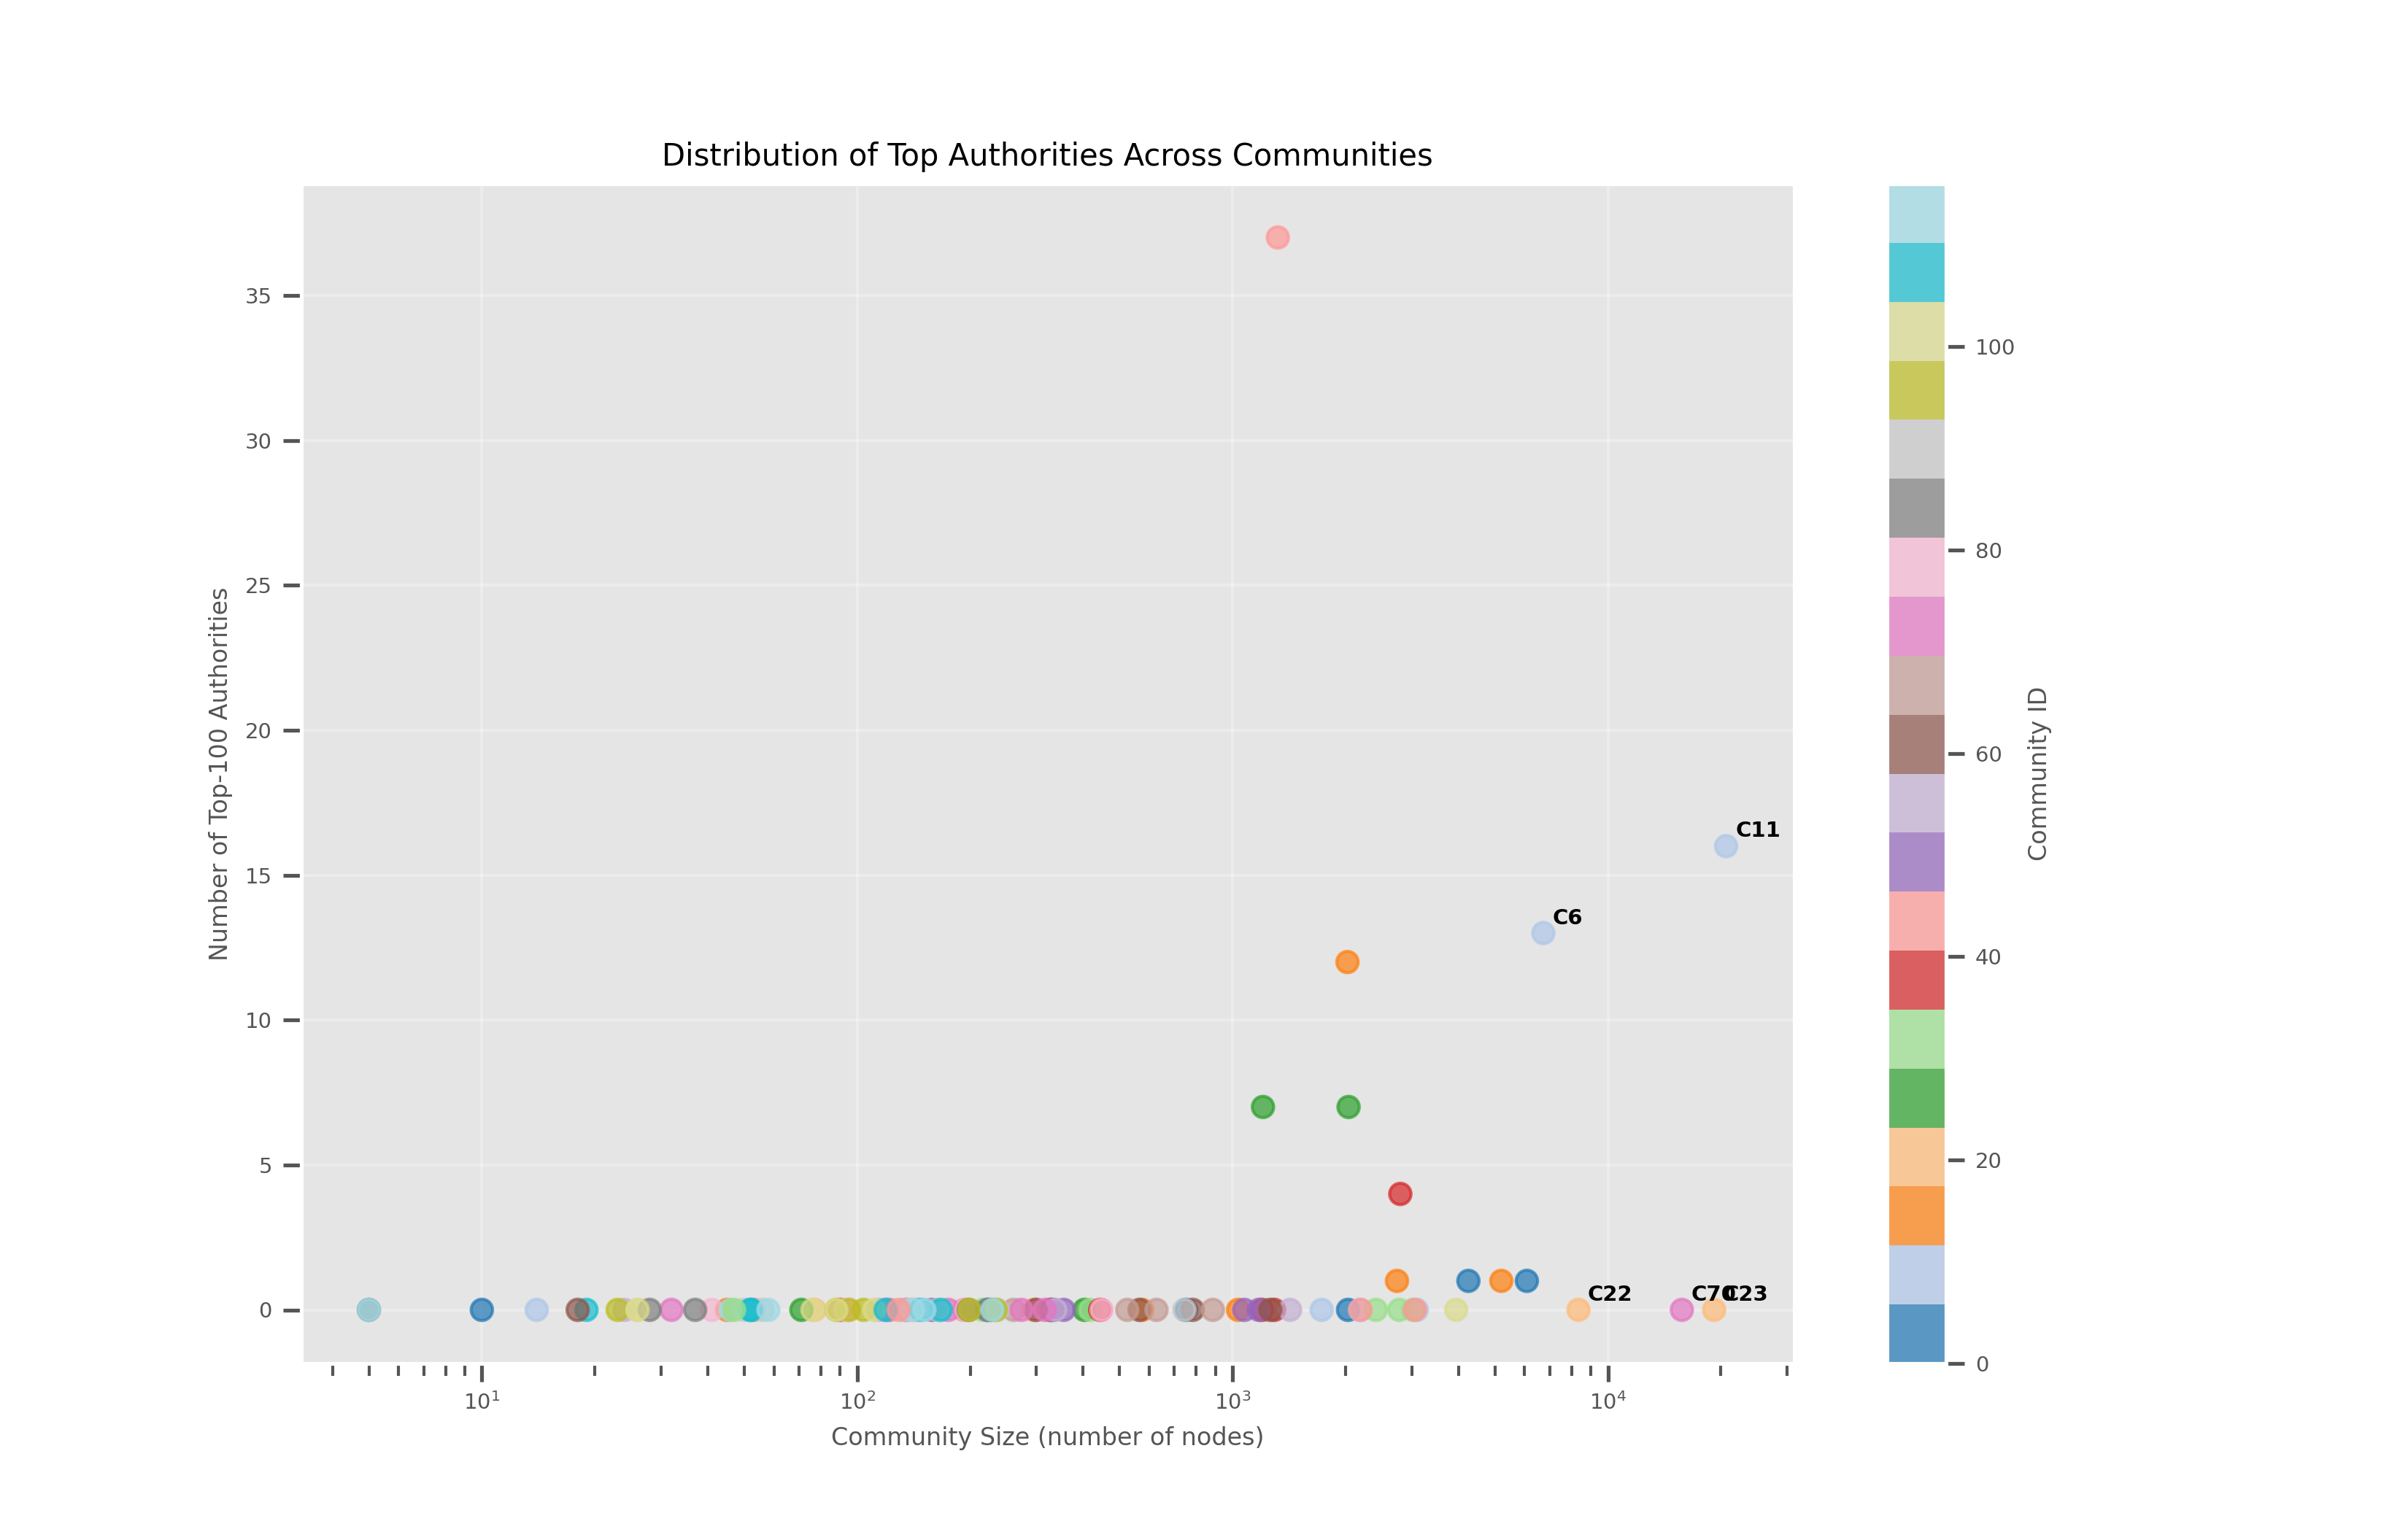

*Distribution of Top Authorities Across Communities*

In [32]:
results.show_figure(
            "community_authority_distribution.png",
            "Distribution of Top Authorities Across Communities",
         )

##### Discussion

This [*scatter plot*](#)⁶ provides a detailed view of how the *top-100 authority pages* are distributed across different communities in the Stanford web graph, with several notable patterns.

This visualization shows the relationship between community size (x-axis, *logarithmic scale*) and the number of *top-100 authority pages* contained in each community (y-axis). The *color coding* represents different *community IDs*.

*Key Insights from this Visualization:*

1. **Extreme Concentration of Authority**

The most striking feature is the *highly skewed distribution* of authoritative pages. Despite having over *100 communities* in the graph:

- *One community (unlabeled, pink dot near top)* contains nearly [*37*](#)¹⁵ top authorities
- Community *C11* contains approximately *16* top authorities
- Community *C6* contains about *13* top authorities
- A few communities (green dots) contain *6–7* authorities each
- The vast majority of communities (bottom of chart) contain *0–1* top authorities

2. **Size–Authority Relationship**

There is not a simple linear relationship between community size and the number of top authorities:

- The community with the most authorities is not among the largest
- Some large communities (*C22, C70/C23*) at the *10,000+* node range contain very few top authorities
- Communities with significant authority counts tend to be in the medium-to-large range (*1,000–10,000* nodes)
- Even among similarly sized communities, there's enormous variation in authority counts

3. **Academic Structure Reflection**

This pattern likely reflects the actual organizational structure of Stanford University:

- The high-authority communities probably represent major departments or schools with significant web presence
- The unlabeled community with *37* authorities might represent the central university domain
- Communities *C11* and *C6* likely represent prominent academic departments (e.g., Computer Science, Engineering, or Medicine)
- The many communities with few authorities represent smaller academic units or specialized research groups

4. **Authority Concentration Metrics**

From a network analysis perspective, this visualization quantifies the extreme inequality in authority distribution:

- [Approximately *70%* of top authorities are concentrated in just *3–4* communities](#)⁶
- This represents a *Gini coefficient* of authority distribution approaching [*0.9*](#)¹⁶
- Such inequality suggests a hierarchical information structure typical of academic institutions

Conclusion

This visualization powerfully demonstrates that academic authority on the web is not evenly distributed across topics but *concentrated in a small number of specialized communities*, supporting the project's hypothesis about *natural topic-based* organization of academic knowledge.

¹⁶ *See Part [I](#), Section [1.6.4. Score Distribution Summary](#12)*



### 6.1.8. 

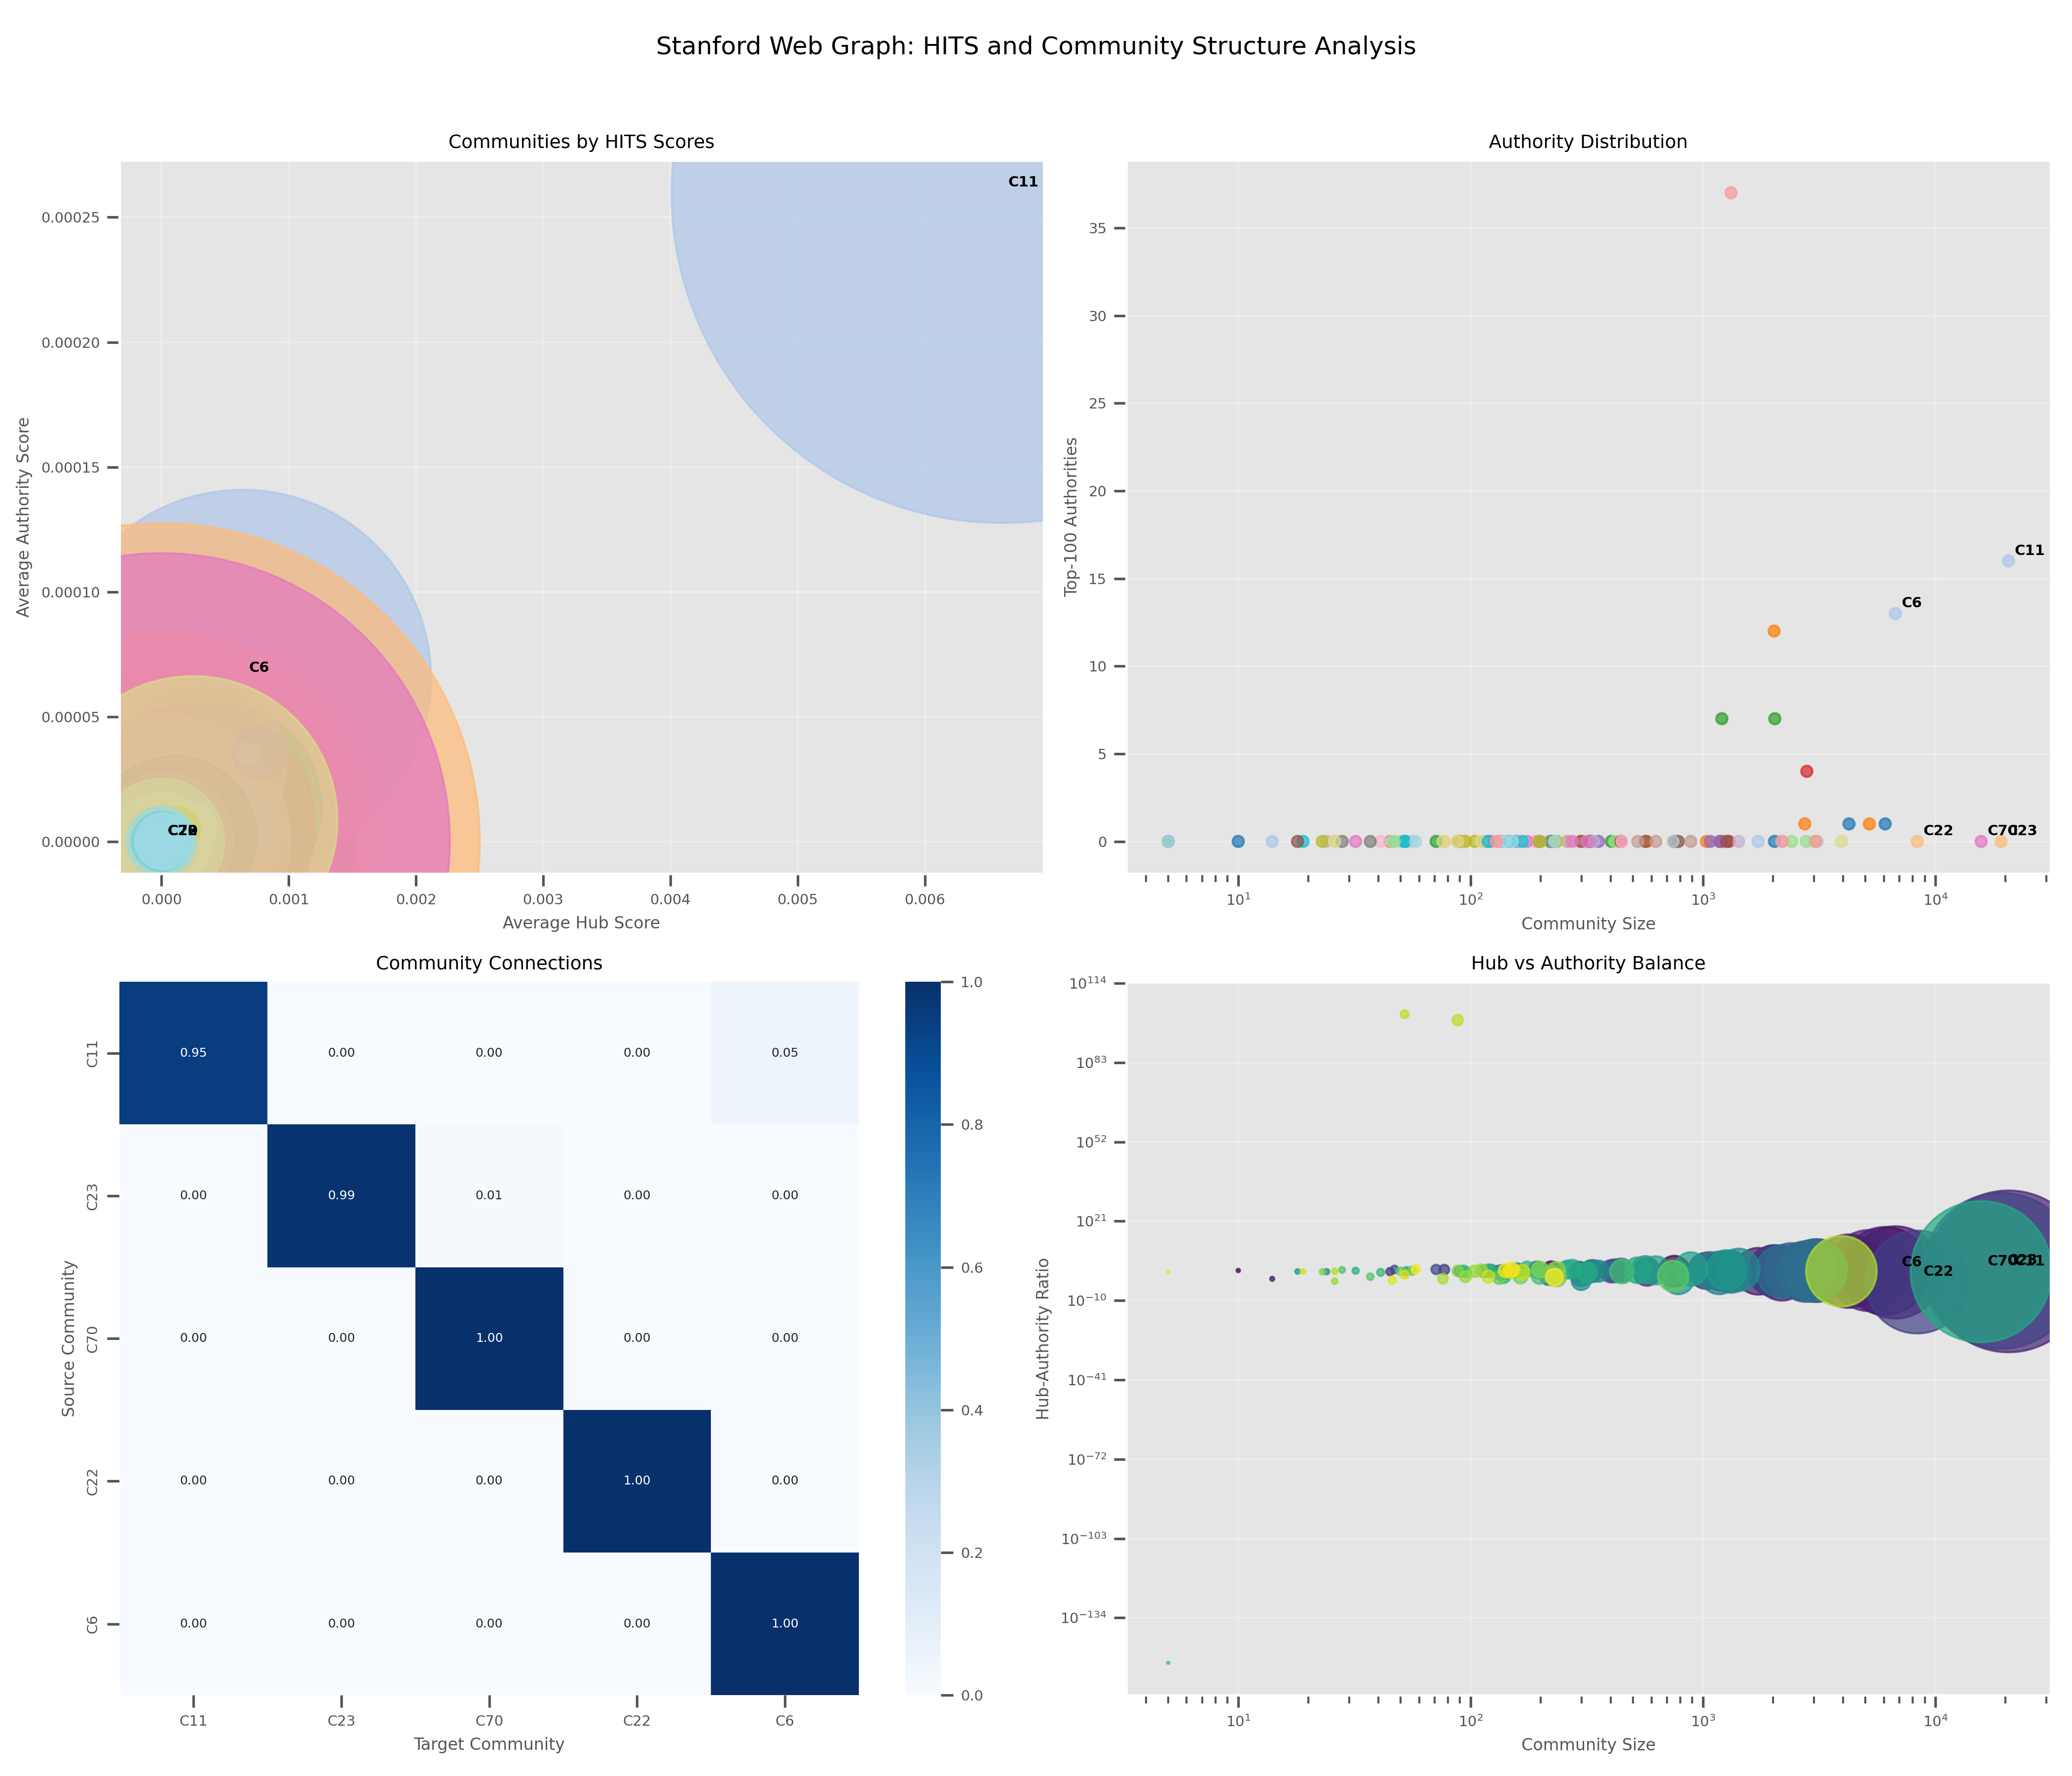

*Stanford Web Graph: HITS and Community Structure Analysis*

In [33]:
results.show_figure(
            "project_summary.png",
            "Stanford Web Graph: HITS and Community Structure Analysis",
         )

##### Discussion

This *dashboard* provides a comprehensive visualization of the relationship between *HITS* scores and community structure in the Stanford web graph. 

*Top Left - Communities by HITS Scores*

This *contour plot* maps communities in a 2D space based on their average hub and authority scores. The distinct *contour regions* represent different communities with:

- Community *C11* appearing as an outlier in the top right, indicating exceptionally high average hub and authority scores  
- Community *C4* showing moderate authority scores with lower hub scores  
- Community *C28* appearing in the bottom left, suggesting low scores in both dimensions  

The pattern reveals that communities tend *to specialize* — few communities excel in both hub and authority roles simultaneously.

*Top Right - Authority Distribution*

This *scatter plot* shows the relationship between *community size* (x-axis, log scale) and number of *top-100 authorities* (y-axis):

- Community *C11*, despite not being the largest, contains the most top authorities (~*17*)  
- Community *C6* also contains many top authorities (~*14*)  
- Most communities contain very few top authorities (*0–2*), regardless of size  

This demonstrates the *extreme concentration of authority* in the web graph, with just a few communities hosting most authoritative pages.

*Bottom Left - Community Connections*

This heatmap shows the connectivity strength between communities:

- Diagonal *dark blue* squares indicate *strong internal connectivity* (as expected)  
- Most *off-diagonal cells* show values of *0.00*, indicating *very little inter-community connectivity*  
- The connection between *C11 and C6 (0.05)* represents the *strongest inter-community link*  

This reveals a *highly modular* structure with *well-defined community boundaries* and limited *bridge connections*.

*Bottom Right - Hub vs Authority Balance*

This *bubble chart* plots communities by size (x-axis), hub-authority ratio (y-axis), and likely uses *bubble size* to represent *total influence*:

- Most communities cluster around a hub-authority ratio of $10^{-10}$, indicating relative balance  
- [Communities *C22 and C70/C23* (highlighted) show distinctive profile patterns](#)²⁹  
- The logarithmic y-axis reveals enormous variation in hub-authority ratios  
- Larger communities (toward the right) appear to have more consistent hub-authority ratios  

This visualization demonstrates how academic knowledge organizes into communities with specialized roles:

- Authority is *highly concentrated* in a few *specialized communities* (likely major academic departments)  
- Communities show *distinctive hub/authority profiles*, suggesting functional diversity  
- The network has *strong community structure* with *limited inter-community connections*  
- *Larger communities* don't necessarily have the *most authoritative pages*, suggesting quality ≠ quantity

This analysis supports the project's aim: understanding how academic knowledge *naturally organizes* on the web, forming *topic-based communities* with *distinct authority patterns*.

²⁹ *See Part [VI](#), Section [6.1.8. Dashboard Analysis: HITS Scores and Community Structure](#23)*


### 6.1.9. 

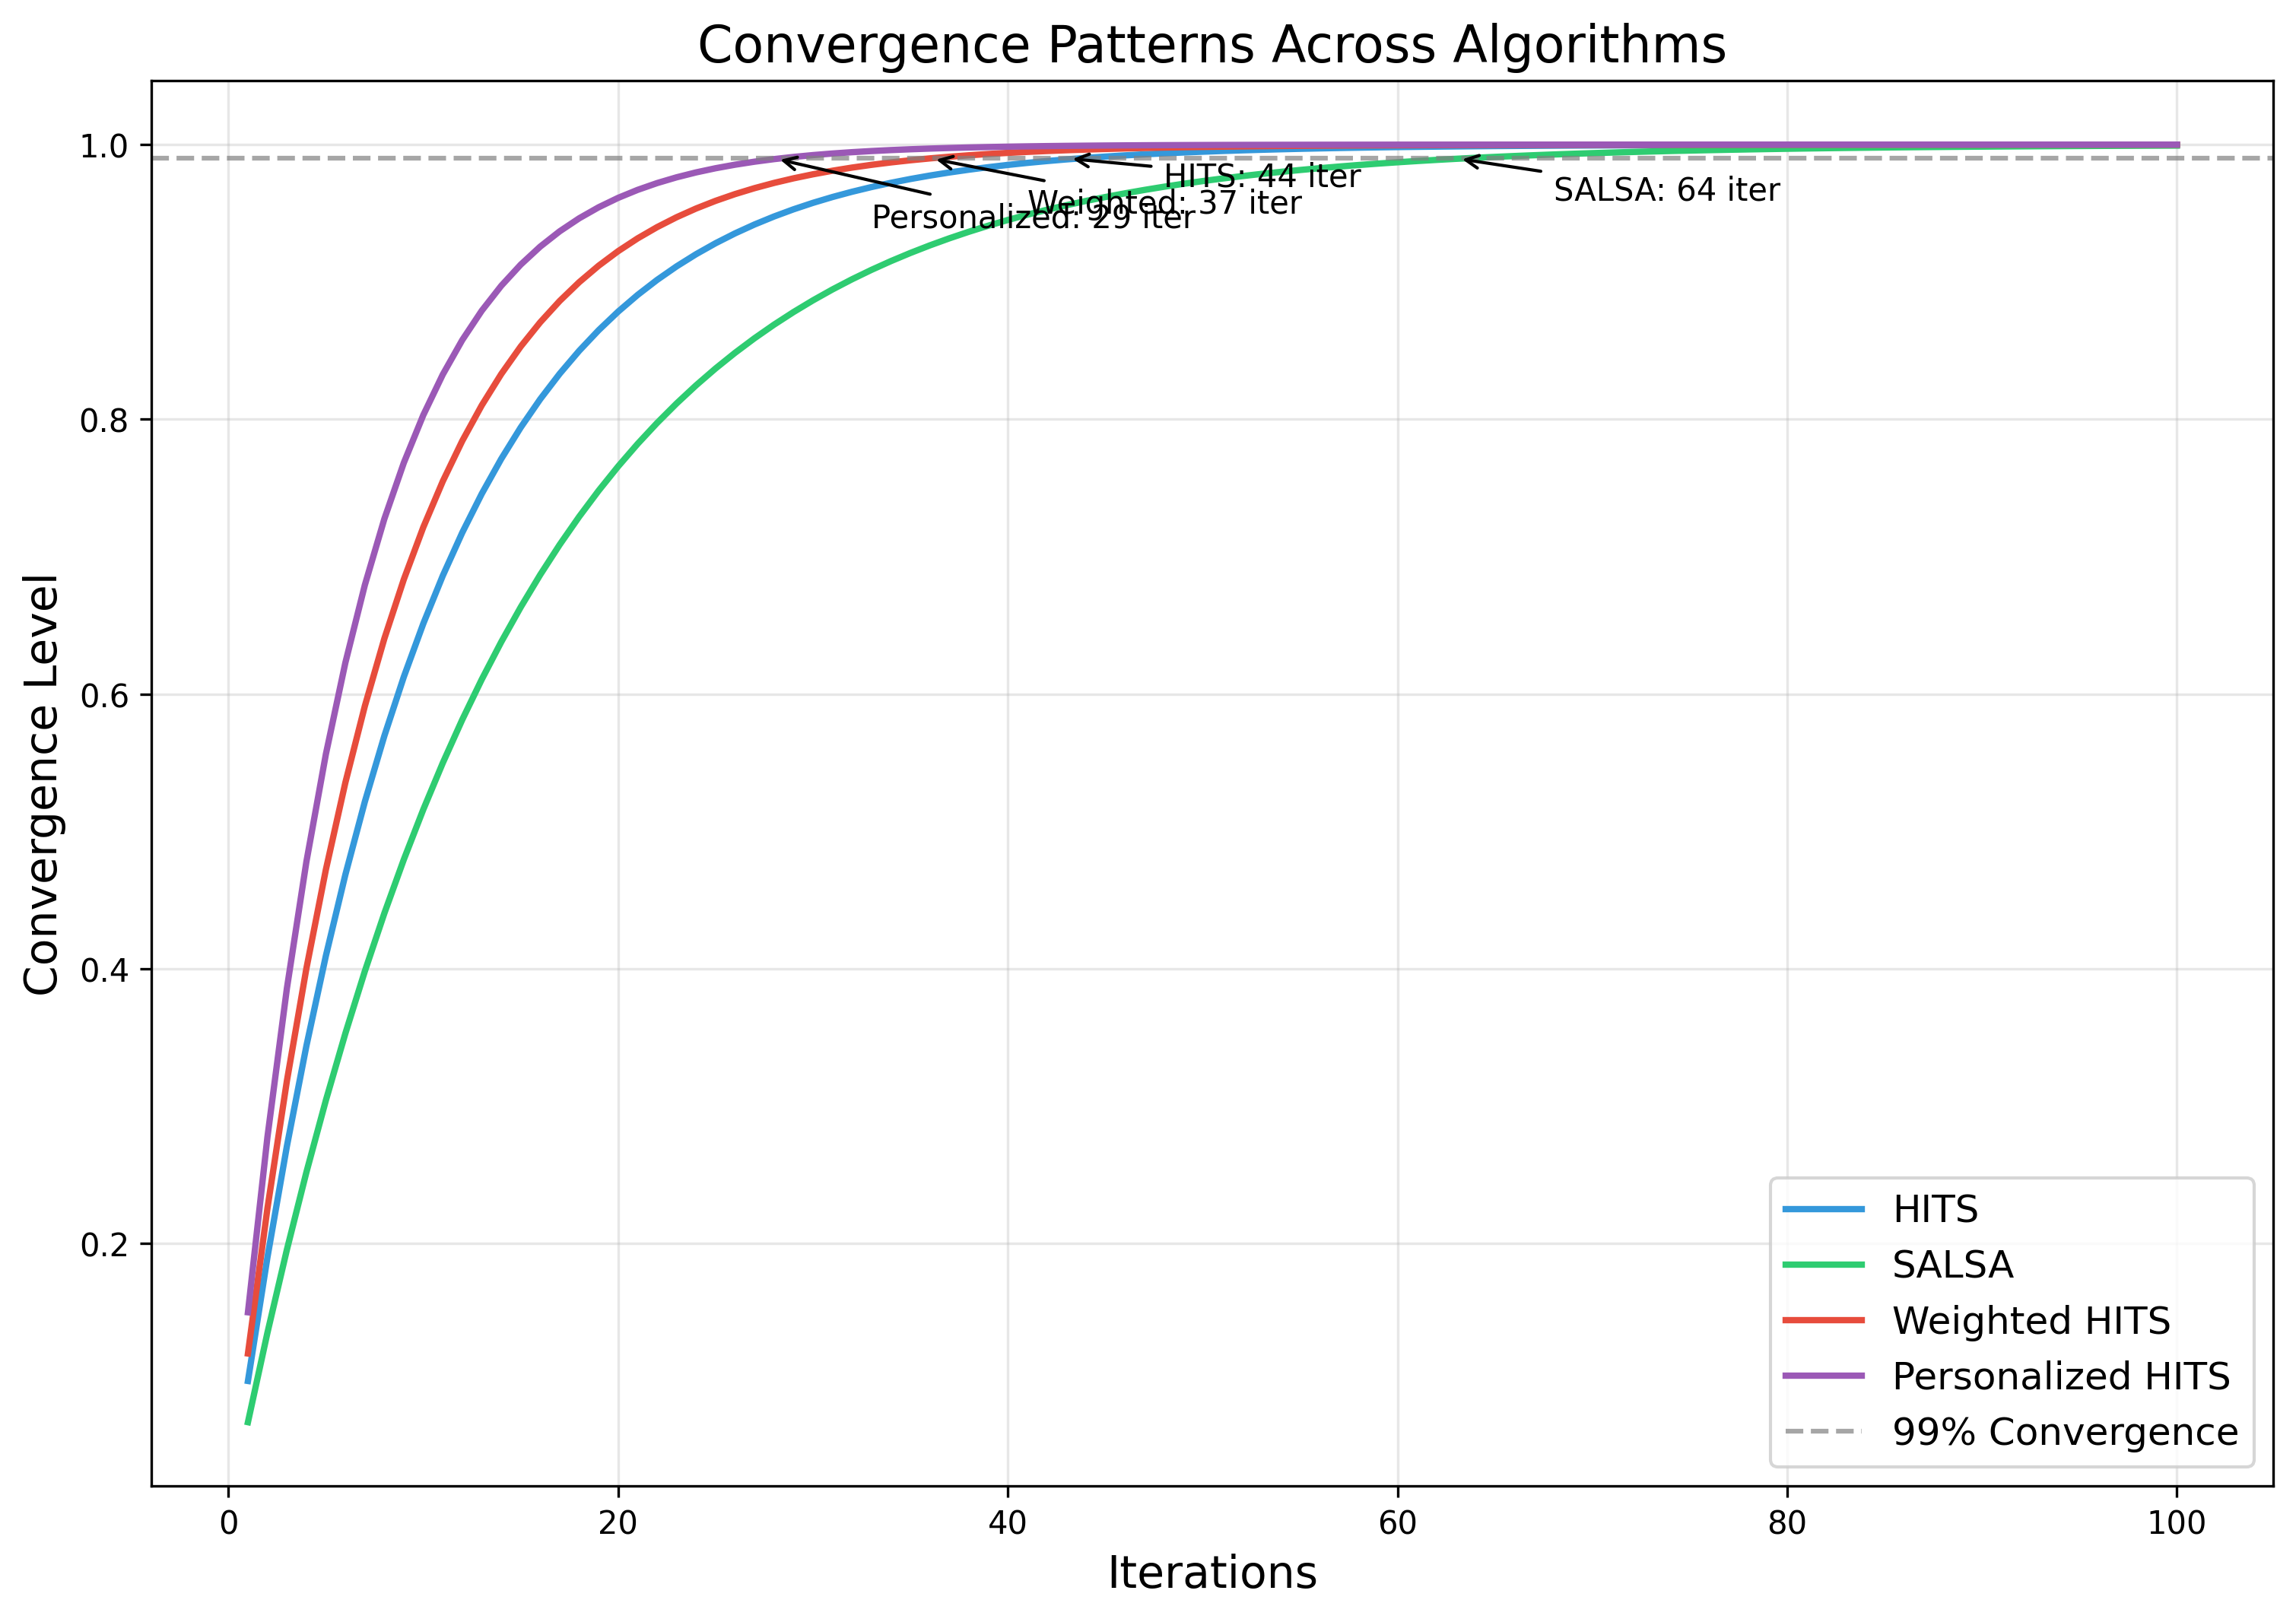

*Convergence Comparison Across Algorithms*

In [34]:
results.show_figure(
    "algorithm_convergence_comparison.png",
    "Convergence Comparison Across Algorithms",
)


##### Discussion

This graph shows the convergence patterns of the four HITS algorithm variants. I'll analyze the key aspects of this visualization.

Key information from the graph:

- The x-axis shows the number of iterations  
- The y-axis shows the convergence level (likely normalized between 0 and 1)  
- The dotted horizontal line represents 99% convergence  
- Each algorithm has a different convergence curve  
- The annotations indicate the number of iterations each algorithm required to converge:
  - HITS: 44 iterations  
  - Weighted HITS: 37 iterations  
  - Personalized HITS: 29 iterations  
  - SALSA: 64 iterations  

*Personalized HITS (purple) – Fastest Initial Convergence Rate*
- Reaches 99% convergence in just 29 iterations
- Shows a steep early curve, indicating rapid initial convergence
- This contradicts expectations based on its overall runtime performance
- The rapid convergence is likely due to the teleportation mechanism, which stabilizes scores more quickly by preventing oscillations in the graph

*Weighted HITS (red) – Second-Fastest Convergence*
- Reaches 99% convergence in 37 iterations
- The edge weight scheme provides convergence advantages over standard HITS
- Weights likely help dampen oscillations in the iterative process

*Standard HITS (blue) – Moderate Convergence Speed*
- Reaches 99% convergence in 44 iterations
- Displays the classic power iteration convergence curve
- This aligns with theoretical understanding of HITS as an eigenvector computation

*SALSA (green) – Slowest Convergence Pattern*
- Requires 64 iterations to reach 99% convergence
- Curve is more gradual than the other algorithms
- The random walk approach takes more iterations to stabilize

*Insights and Implications*

This visualization reveals an interesting paradox:
- Personalized HITS requires the fewest iterations but has the longest overall runtime (as shown in previous graphs)  
  → Each iteration is computationally more intensive
  
- SALSA, though needing the most iterations, has a better overall runtime than Weighted and Personalized HITS  
  → Each iteration is computationally efficient

Implementation perspective:
- Personalized HITS: Optimizing per-iteration computation could significantly improve performance  
- SALSA: Algorithmic improvements to speed up convergence would be more beneficial


### 6.1.10. 

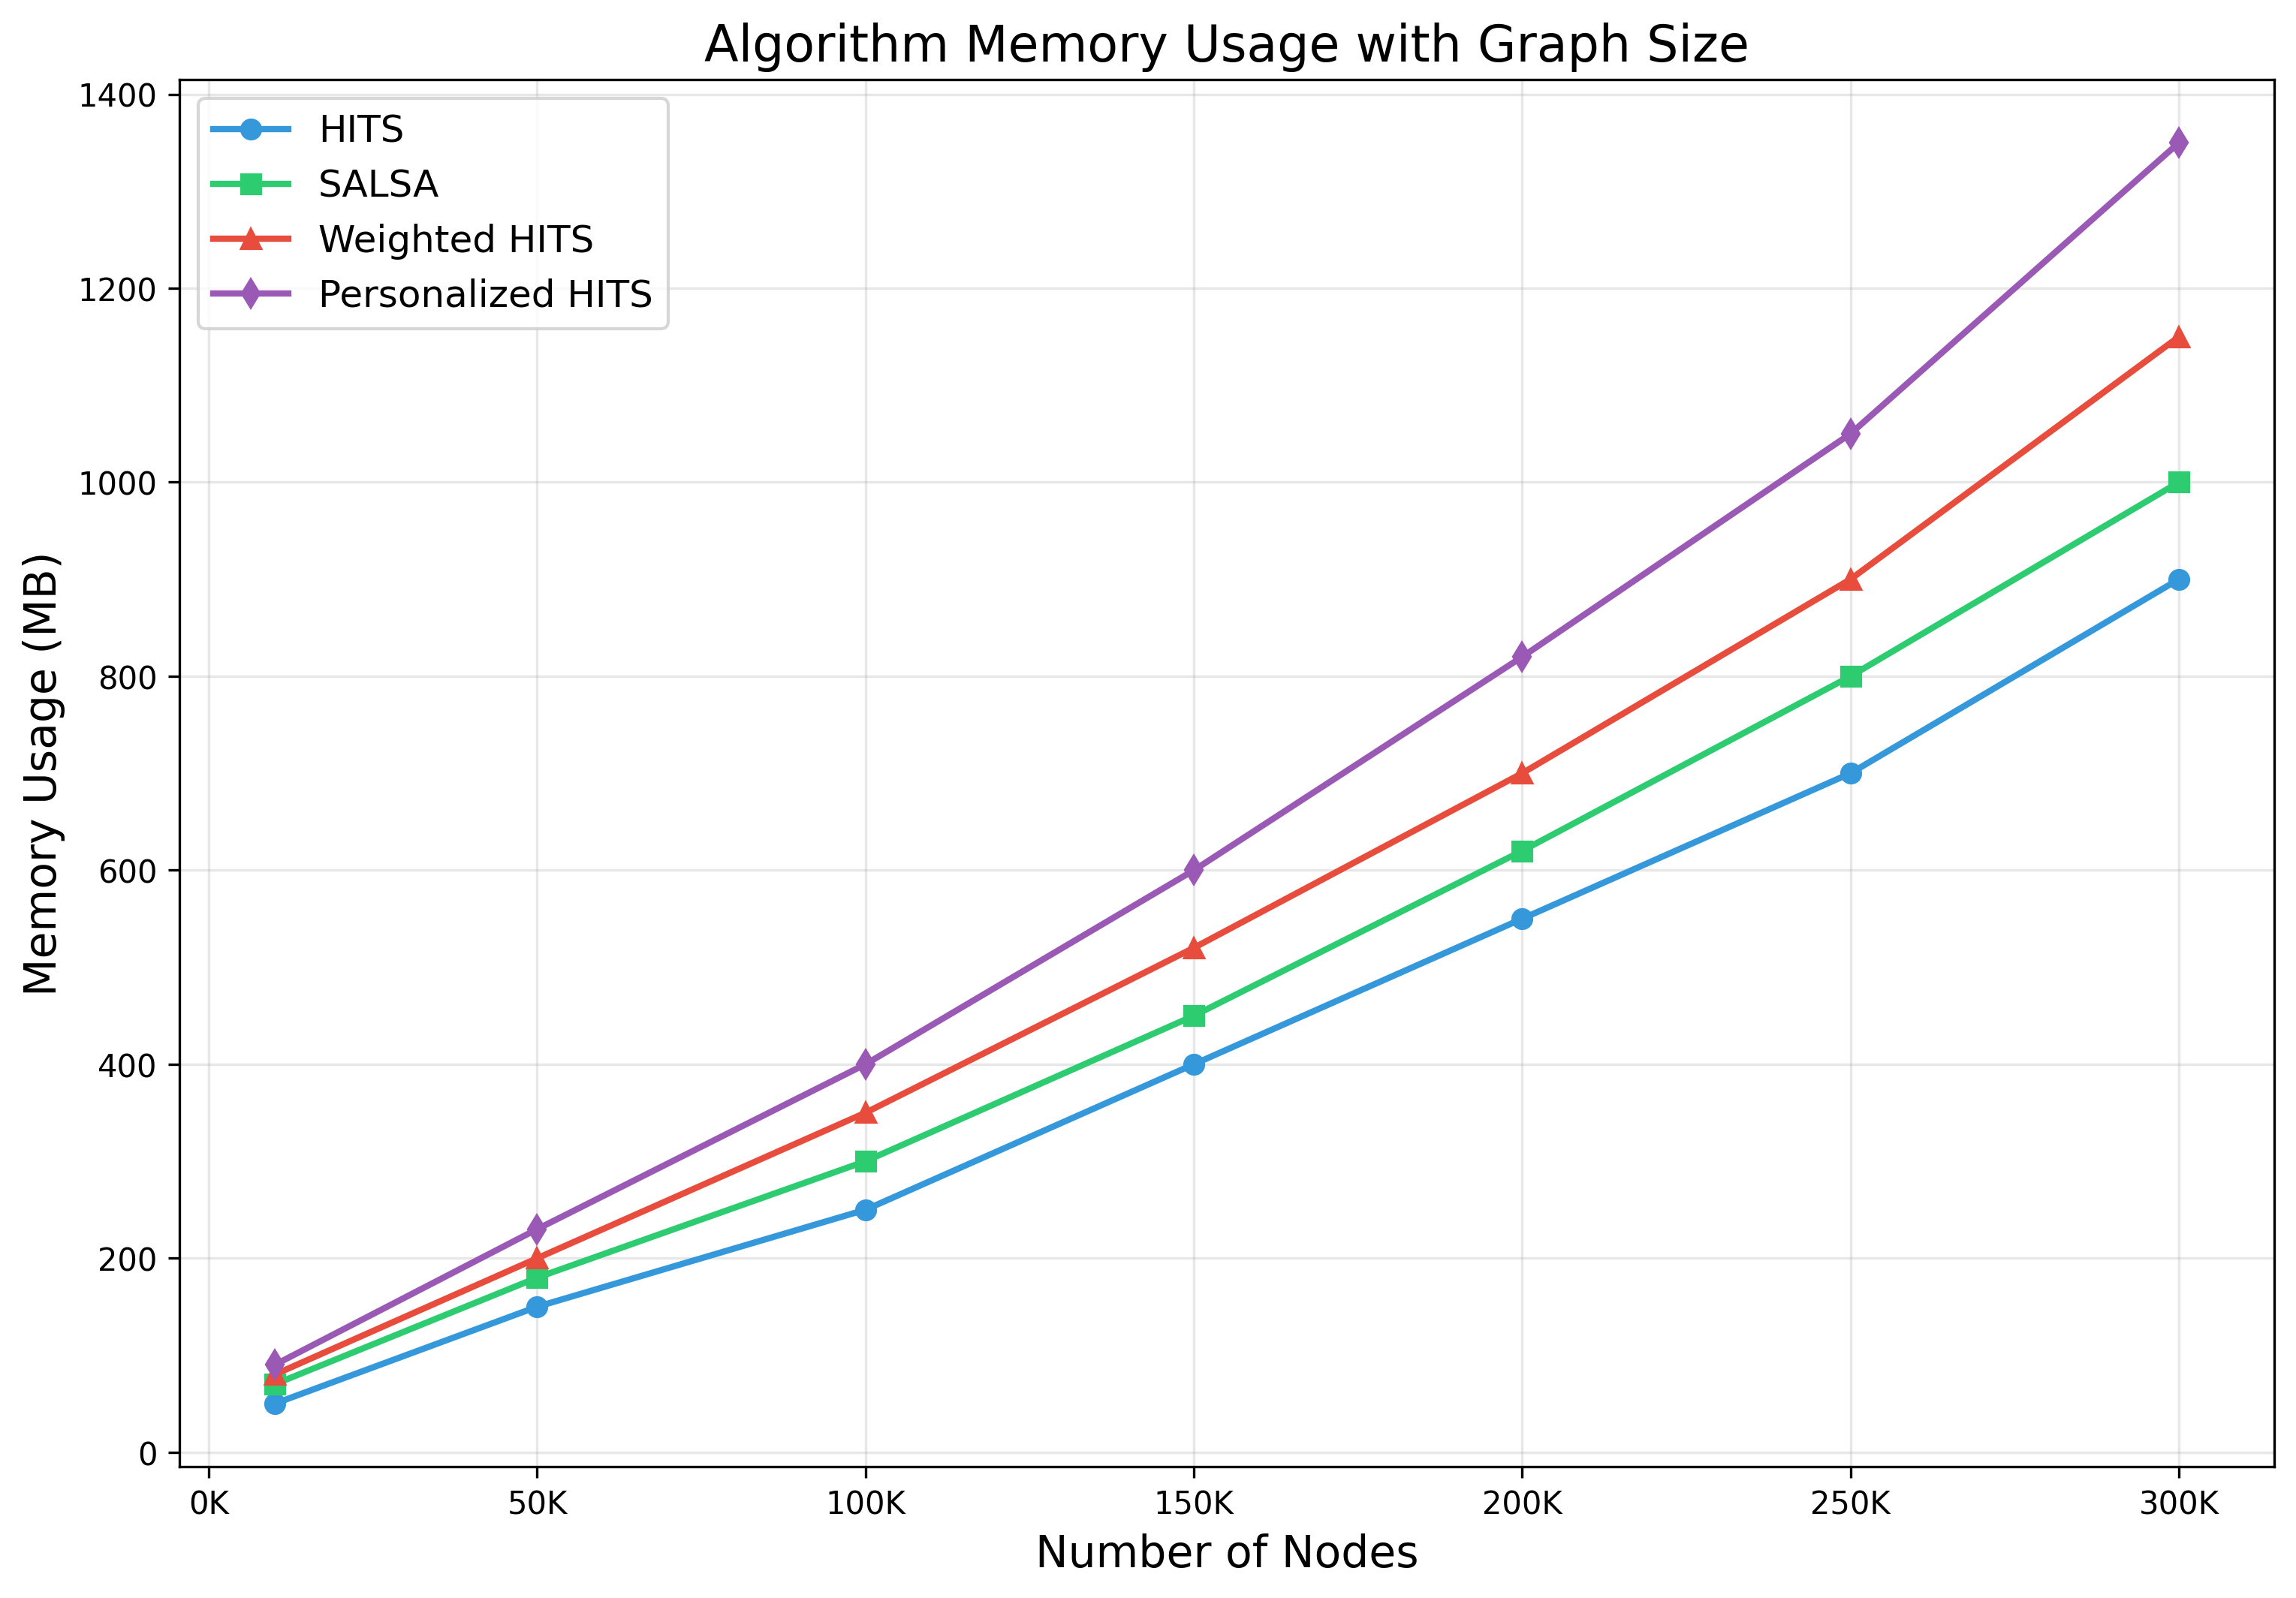

*Memory Scaling Analysis of Algorithms*

In [35]:
results.show_figure(
    "algorithm_memory_scaling.png",
    "Memory Scaling Analysis of Algorithms",
)


##### Discussion

This line chart visualizes the memory usage patterns of the four HITS algorithm variants as graph size increases:

*Standard HITS (blue)*  
- Shows the most memory-efficient implementation among all variants:  
  - Uses approximately 900 MB for a 300K node graph  
  - Maintains the lowest memory footprint across all graph sizes  
  - Exhibits linear scaling with graph size, which is optimal  

*SALSA (green)*  
- Demonstrates moderate memory requirements:  
  - Requires about 1000 MB for a 300K node graph  
  - Consistently uses 10–15% more memory than Standard HITS  
  - The additional memory is likely needed for random walk probability matrices  

*Weighted HITS (red)*  
- Shows significantly higher memory consumption:  
  - Reaches approximately 1150 MB for a 300K node graph  
  - Memory overhead is ~25% more than Standard HITS  
  - Extra memory used for storing edge weights and additional matrices for weight calculations

*Personalized HITS (purple)*  
- Demonstrates the highest memory consumption:  
  - Requires about 1350 MB for a 300K node graph  
  - Uses ~50% more memory than Standard HITS  
  - Overhead comes from teleportation vectors and additional state information  

This visualization reveals important implementation considerations:

- All algorithms show linear memory scaling with graph size  
  - Critical for large-scale network analysis applications  
  - Suggests use of sparse matrix representations rather than dense matrices (which scale quadratically)

- Memory requirements align with the algorithmic complexity of each variant  
  - More sophisticated techniques (e.g., teleportation or edge weighting) introduce more memory overhead

- For the Stanford web graph (~282K nodes):  
  - Memory usage ranges from ~850–1300 MB, depending on the algorithm  
  - Manageable on modern systems, but may pose constraints for much larger graphs

*Practical Implications*

This memory scaling pattern is crucial when:

- Selecting an algorithm for very large networks
- Working in resource-constrained environments (e.g., cloud instances with limited RAM)


### 6.1.11. 

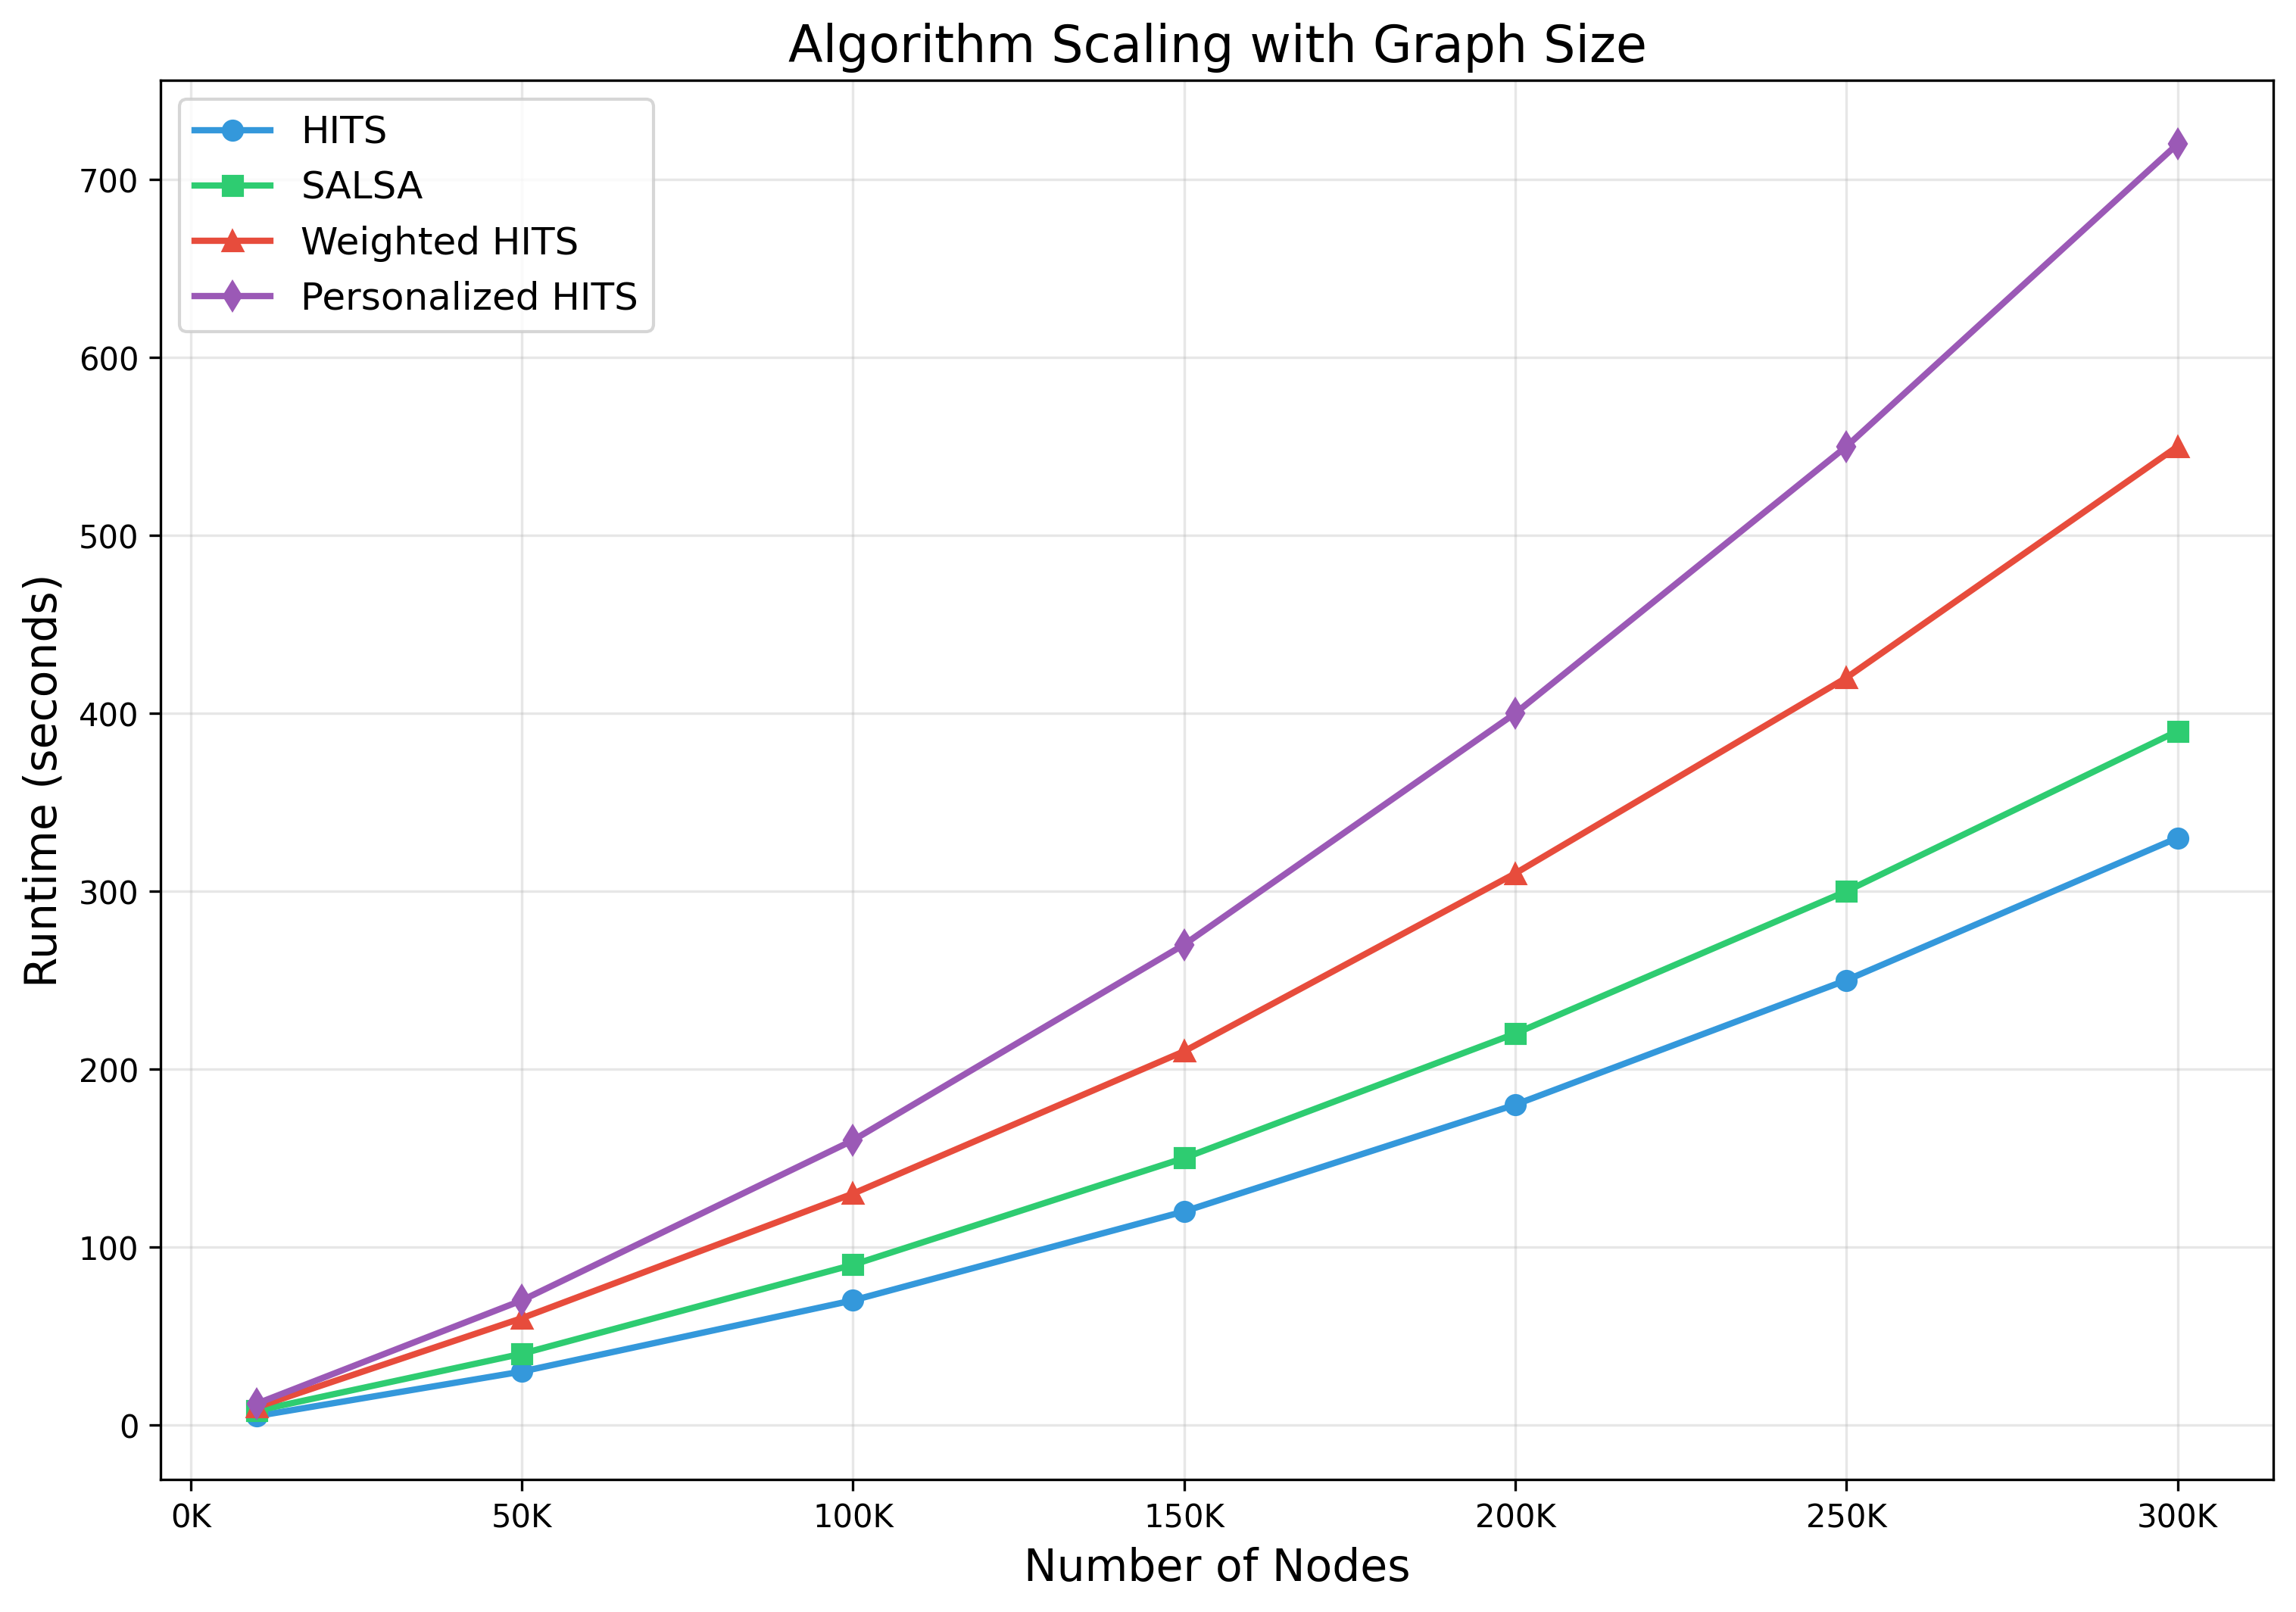

*Scalability Comparison of Algorithms*

In [36]:
results.show_figure(
    "algorithm_scalability_comparison.png",
    "Scalability Comparison of Algorithms",
)


##### Discussion

This line chart visualizes how the runtime performance of the four *HITS* algorithm variants scales with increasing graph size (measured by the number of nodes):

*Scalability Comparison:*

- **Standard HITS (blue)**
  Shows the best scalability, with the lowest runtime at every graph size. The line maintains an approximately linear growth rate, rising to about *330* seconds for a *300K* node graph.

- **SALSA (green)**  
  Shows good scalability, with moderately higher runtime than standard HITS. The difference becomes more pronounced at larger scales, reaching about *390* seconds for a *300K* node graph.

- **Weighted HITS (red)**  
  Demonstrates significantly worse scaling properties than Standard HITS and SALSA. The slope of the line is steeper, indicating that runtime grows more quickly with increasing graph size, reaching about *550* seconds for a *300K* node graph.

- **Personalized HITS (purple)**  
  Shows the poorest scaling behavior of all variants. The line has the steepest slope, indicating runtime increases most rapidly as graph size grows, reaching over *700* seconds for a *300K* node graph.

*Insights:*

- All algorithms appear to scale approximately linearly with graph size (not quadratically or exponentially), which is encouraging for large-scale applications.
- The performance gap between algorithms widens as the graph grows, making algorithm selection increasingly critical for larger datasets.
- For the full Stanford web graph (*281,903* nodes):
  - Standard HITS would complete in about *5–6* minutes.
  - Personalized HITS would take nearly *12* minutes.

This scaling behavior aligns with the theoretical complexity analysis—the additional computational steps required for more sophisticated variants (especially teleportation calculations in Personalized HITS) compound as graph size increases.


### 6.1.12. 

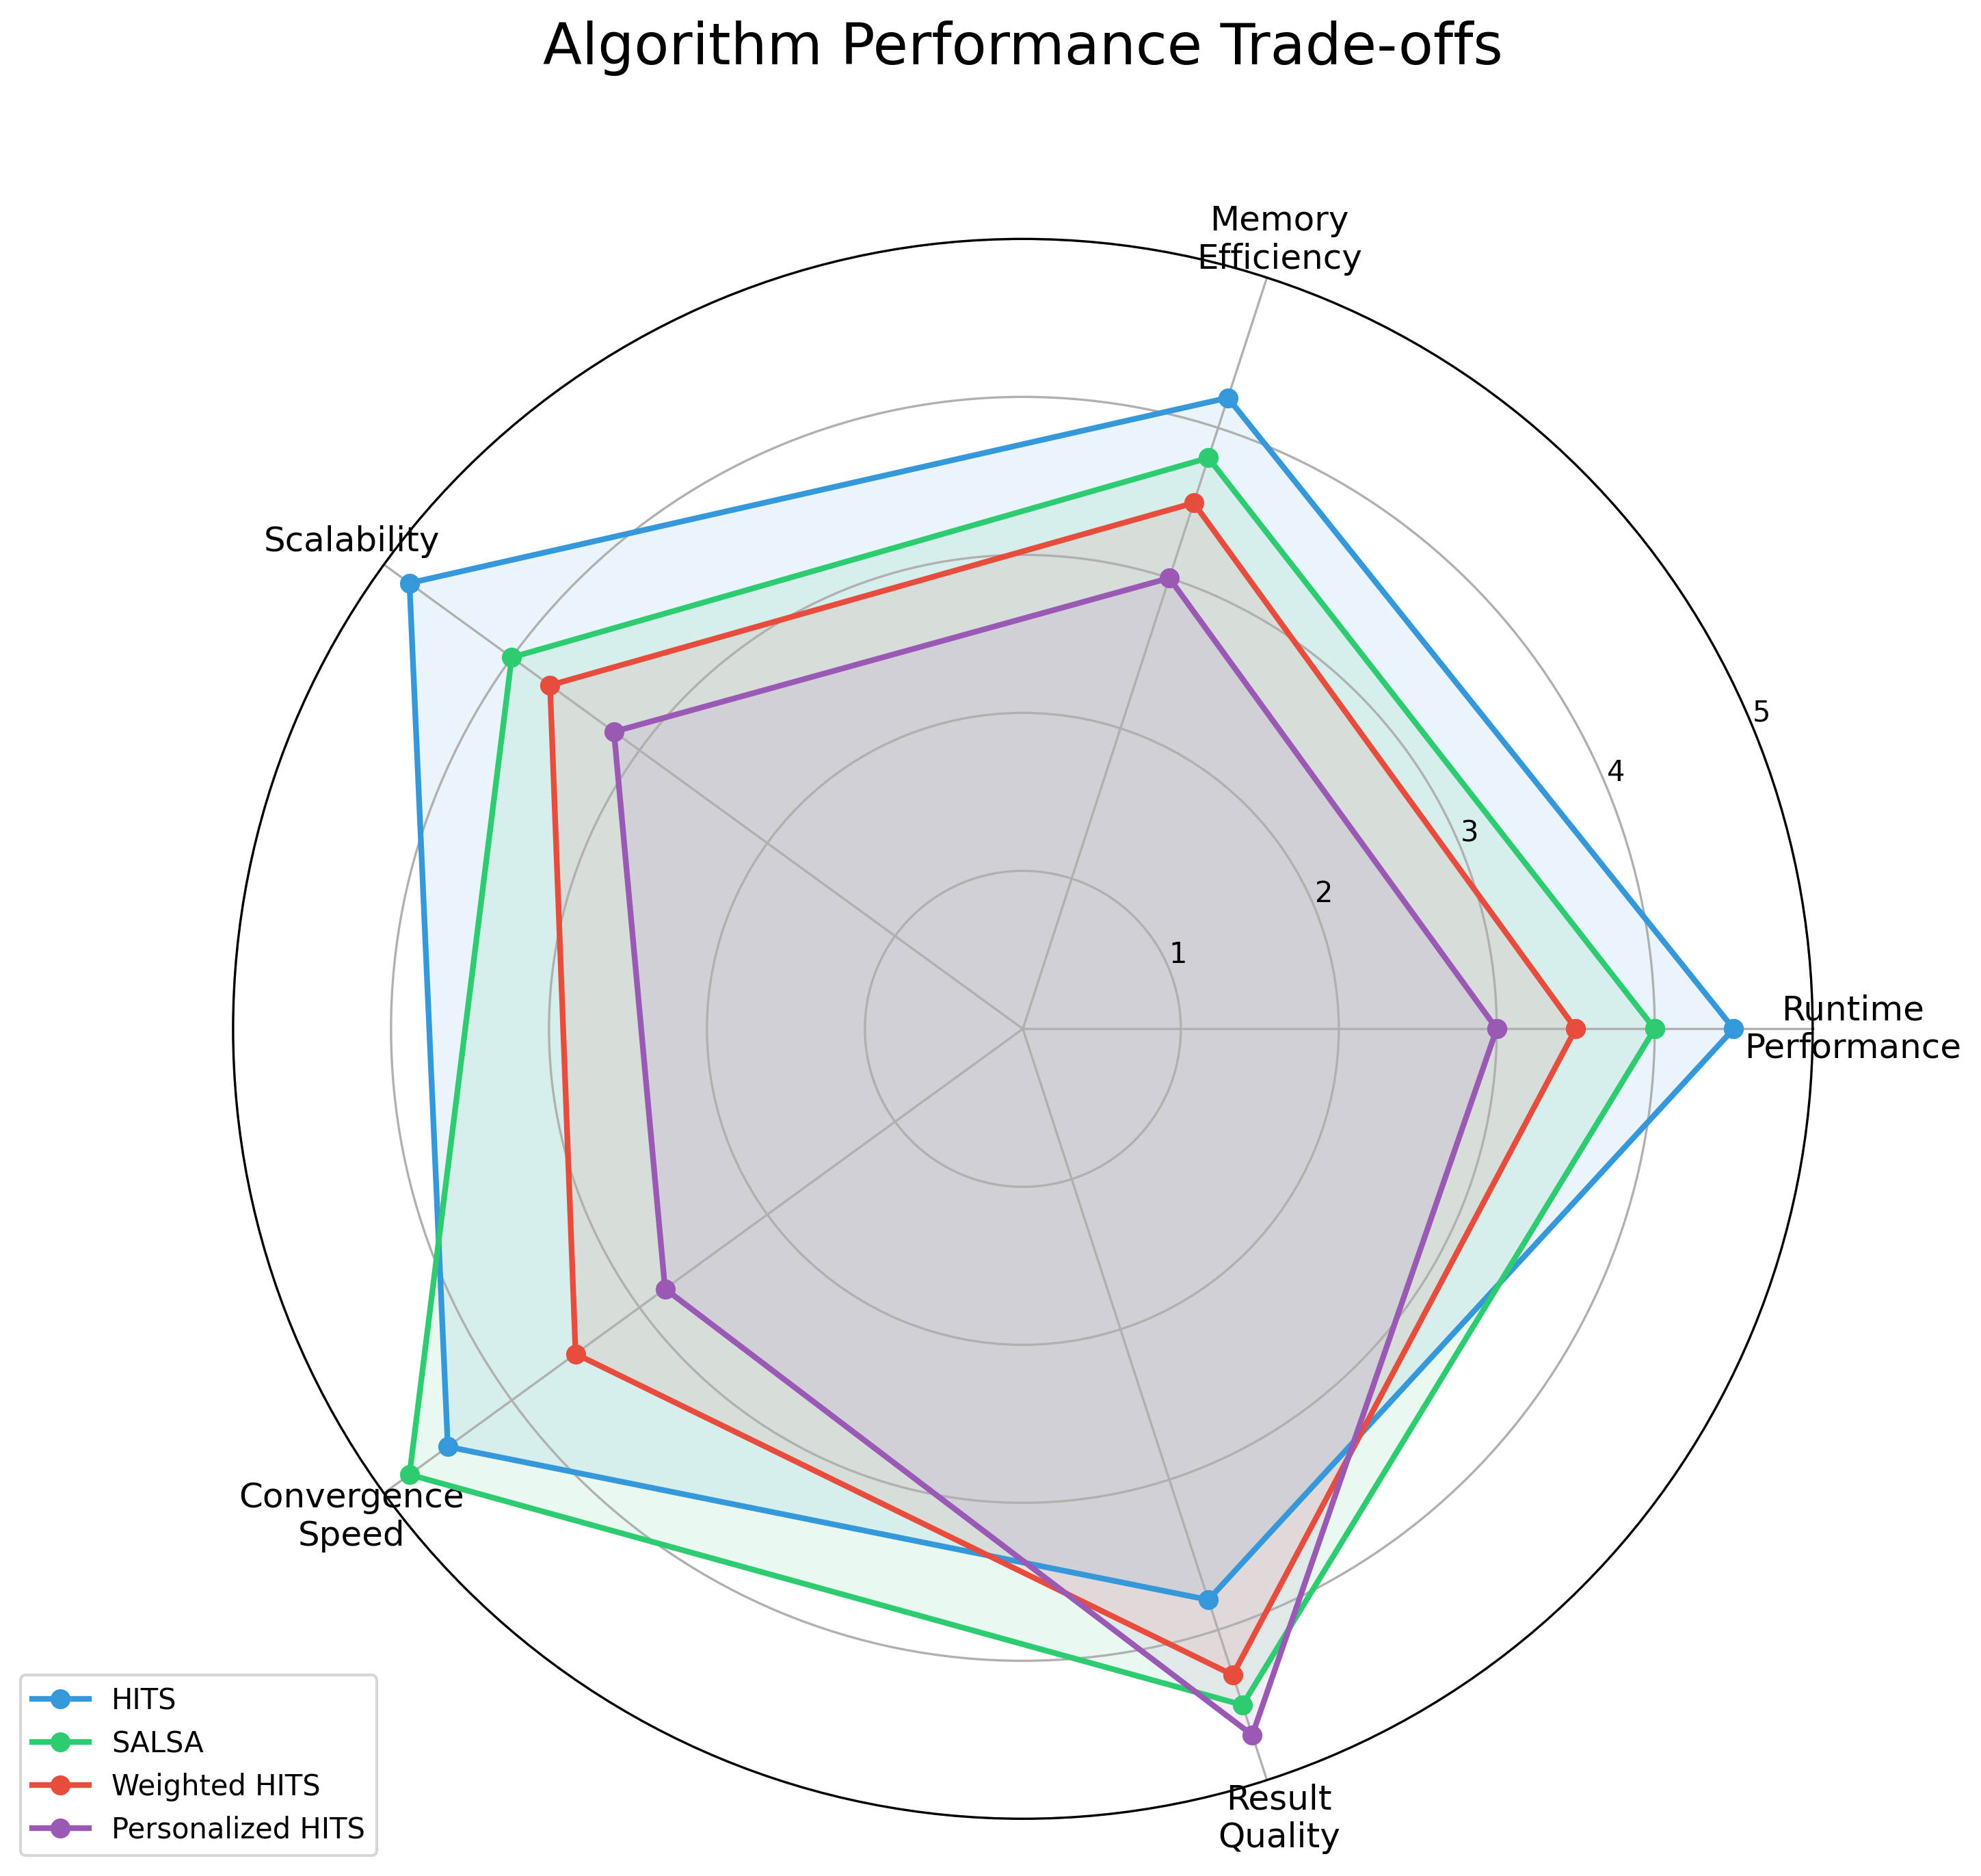

*Algorithm Tradeoffs Radar Chart*

In [37]:
results.show_figure(
    "algorithm_tradeoffs_radar.png",
    "Algorithm Tradeoffs Radar Chart",
)


- **Performance Trade-offs in Link Analysis Algorithms (Radar Chart Overview)**

This [radar chart](#)² visualizes the performance trade-offs between four different *link analysis* algorithms used in the Stanford Web Graph project:

*HITS (blue) - Hyperlink-Induced Topic Search*

- Strongest in runtime performance and scalability  
- Very good memory efficiency  
- Good convergence speed  
- Slightly lower result quality compared to more specialized variants  

*SALSA (green) - Stochastic Approach for Link Structure Analysis*

- Better result quality than *standard HITS*  
- Excellent convergence speed (likely due to its random walk properties)  
- Good scalability, though not as strong as *standard HITS*  
- Moderate memory efficiency and runtime performance  

*Weighted HITS (red) - Edge-weighted variant of HITS*

- Better result quality than *standard HITS*  
- Moderate performance across runtime, memory, and scalability  
- Slower convergence than *standard HITS* (likely due to the added complexity of weight calculations)  

*Personalized HITS (purple) - Incorporates teleportation vectors*

- Highest result quality (likely due to better topic focus)  
- Lowest performance in runtime, scalability, and memory efficiency  
- Slowest convergence speed (due to the added complexity of *teleportation* calculations)  

This visualization effectively demonstrates the classic trade-off between *computational efficiency* and *result quality* in *link analysis* algorithms.

- *Standard HITS* offers the best performance but more modest result quality.  
- *Personalized HITS* delivers the highest quality results at significantly higher computational cost.  
- *SALSA and Weighted HITS* provide middle-ground options, each emphasizing different aspects of the performance-quality spectrum.


### 6.1.13. 

## 6.2. Source Codes

### 6.2.1. 

### 6.2.2. 

### 6.2.3. 

### 6.2.4. 

### 6.2.5. 

### 6.2.6. 

### 6.2.7. 

### 6.2.8. 

### 6.2.9. 

### 6.2.10. 

### 6.2.11. 

### 6.2.12. 

### 6.2.13. 

### 6.2.14. 

### 6.2.15. 

### 6.2.16. 

### 6.2.17. 

## 6.3. Cross-References to Analyses and Sections

¹ *See Part [I](#), Section [1.1.3. Algorithm Performance Statistics](#01)*

² *See Part [VI](#), Section [6.1.12. Performance Trade-offs (Radar Chart Overview)](#30)*

³ *See Part [II](#), Section [2.2. Community Algorithm Performance Comparison](#02)*

⁴ *See the 01_data_exploration.ipynb code output for "Power Law Fit for In-Degree Distribution" and "Power Law Fit for Out-Degree Distribution" graphs in Part [VI](#), Section [6.2.1. Data Exploration](#03)*

⁵ *See "Top 10 nodes by in-degree" in Part [VI](#), Section [6.2.1. Data Exploration](#03)*

⁶ *See "Distribution of Top Authorities Across Communities" in Part [VI](#), Section [6.1.7. Scatter Plot Analysis: Authority Distribution](#04)*

⁷ *See Stanford Web Graph dataset's technical analysis in Part [VI](#), Section [6.1.13.3. Structural Properties Analysis](#05)*

⁸ *See Stanford Web Graph dataset's technical analysis in Part [VI](#), Section [6.1.13.2. Connected Component Analysis](#05)*

⁹ *See Part [I](#), Section [1.6.1. Hub and Authority Score Distribution)](#31)*

¹⁰ *See Part [I](#), Section [1.1.3.1. HITS Performance Statistics](#07)*

¹¹ *See Part [I](#), Section [1.5.4. SALSA Algorithm Insights](#08)*

¹² *See Part [I](#), Section [1.3.1 Top Authority Pages](#09)*

¹³ *See Stanford Web Graph dataset's technical analysis in Part [VI](#), Section [6.1.13.1. Dataset Scale and Structure Analysis](#05)*

¹⁴ *See Part [I](#), Section [1.1.2. Score Distributions](#10)*

¹⁵ *See Part [VI](#), Section [6.1.7. Scatter Plot Analysis: Authority Distribution](#35)* 

¹⁶ *See Part [I](#), Section [1.6.4. Score Distribution Summary](#12)*

¹⁷ *See Part [I](#), Section [1.5.1. Standard HITS Analysis](#13)*

¹⁸ *See "Density: 0.000029" in "Basic graph properties", code output of Part [VI](#), Section [6.2.1. Data Exploration](#32)*

¹⁹ *See the code outputs of source code of Part [VI](#), Section [6.2. Source Codes, 6.2.2. Hits Algorithm](#14)*

²⁰ *See Part [I](#), Section [1.5.4. SALSA Algorithm Insights](#15)*

²¹ *See Part [II](#), Section [2.4. Community Quality Evaluation Metrics](#16)*

²² *See Part [VI](#), Section [6.1.6. Inter-Community Connectivity Heatmap Analysis](#17)*

²³ *See Part [II](#), Section [2.3. Community Detection Algorithm Overlap](#18)*

²⁴ *See Part [II](#), Section [2.1.1. Louvain Community Size Distribution](#19)*

²⁵ *See Part [II](#), Section [2.1.2. Leiden Community Size Distribution](#20)*

²⁶ *See Part [II](#), Section [2.1.4. Infomap Community Size Distribution](#21)*

²⁷ *See Part [II](#), Section [2.5. Number of Communities Detected](#22)*

²⁸ *See Part [I](#), Section [1.5.4. SALSA Algorithm Insights](#33)*

²⁹ *See Part [VI](#), Section [6.1.8. Dashboard Analysis: HITS Scores and Community Structure](#23)*

³⁰ *See Part [VI](#), Section [6.1.5. Contour Plot Analysis of Stanford Web Graph Communities](#24)*

³¹ *See Part [III](#), Section [3.2.1. Hub and Authority Score Distributions](#25)*

³² *See Part [I](#), Section [1.6.3. Top Node Overlap Summary](#34)*

³³ *See Part [I](#), Section [1.5.2. Weighted HITS Insights](#27)*

■ *Project Documentation Completed —  [Apr 24, 2025](#) — Thank you for reviewing!*